# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

# Run Adversarial Training

In [8]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from attacks.pgd import ProjectedGradientDescent

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             }]

# uncomment this if you want to create a new experiment instead!
## experiment = RobustnessExperiment(exp_config, title="EVAL_DATASET2")
experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

Loaded model 0024_EVAL_DATASET2


In [9]:
from utils.TrainHelper import TrainHelper, get_all_models_data
th = TrainHelper()

In [19]:
# define hyperparameters
hparams = torch.load("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/optuna_spec8kd2_0.90.p")['hparams']

In [20]:
hparams["epochs"] = 15

In [21]:
##############################################################################################################
##############################################################################################################
##############################################################################################################

from attacks.pgd import ProjectedGradientDescent

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.CRNN import CRNNPLModule
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule
from classification.models.SpectrogramCNN_8K_Dataset2 import SpectrogramCNN_8K_Dataset2_PLModule

# define attack configs
attack_configs = []
for i in range(50):
    epsilon = 0.1 + (i)/100
    attack_configs.append(
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[epsilon], "num_iter": [1]
                                     },
                       "META": {"TITLE": f"L_inf_eps={epsilon}_iters=1"}
                       },
    )

In [22]:
models = th.run(SpectrogramCNN_8K_Dataset2_PLModule, hparams, attack_configs, save_epochs = [10,20,30,40], dataset_id=config.DATASET_CONTROL)
##############################################################################################################
##############################################################################################################
##############################################################################################################

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.014819205690574985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7806757557794902
Train-Acc=0.5191699604743083


Val-Acc=0.8114997036158862
Train-Acc=0.5017786561264822


Val-Acc=0.7854179016004742
Train-Acc=0.4966403162055336


Val-Acc=0.7919383521043272
Train-Acc=0.5023715415019763


Val-Acc=0.8014226437462952
Train-Acc=0.5124505928853755


Val-Acc=0.8417308832246592
Train-Acc=0.5280632411067193


Val-Acc=0.8043864848844102
Train-Acc=0.5440711462450593


Val-Acc=0.8097213989330172
Train-Acc=0.5397233201581028


Val-Acc=0.8322465915826912
Train-Acc=0.5555335968379447


Val-Acc=0.8180201541197392
Train-Acc=0.5673913043478261
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0_epoch_10.p"


Val-Acc=0.8180201541197392
Train-Acc=0.5725296442687747


Val-Acc=0.7972732661529343
Train-Acc=0.5938735177865613


Val-Acc=0.8180201541197392
Train-Acc=0.6142292490118577


Val-Acc=0.8547717842323651
Train-Acc=0.641897233201581


Val-Acc=0.8180201541197392
Train-Acc=0.6683794466403162


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0.p"
Training Models with Attack ProjectedGradientDescent (2 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8233550681683461
Train-Acc=0.5017786561264822


Val-Acc=0.7617071724955542
Train-Acc=0.4527667984189723


Val-Acc=0.7522228808535862
Train-Acc=0.4790513833992095


Val-Acc=0.7949021932424422
Train-Acc=0.4808300395256917


Val-Acc=0.7978660343805573
Train-Acc=0.5104743083003953


Val-Acc=0.8257261410788381
Train-Acc=0.5114624505928854


Val-Acc=0.8197984588026082
Train-Acc=0.532806324110672


Val-Acc=0.8399525785417902
Train-Acc=0.5349802371541502


Val-Acc=0.8280972139893301
Train-Acc=0.5367588932806324


Val-Acc=0.8476585655008891
Train-Acc=0.5721343873517787
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1_epoch_10.p"


Val-Acc=0.8464730290456431
Train-Acc=0.5683794466403163


Val-Acc=0.8298755186721992
Train-Acc=0.5988142292490118


Val-Acc=0.8565500889152341
Train-Acc=0.6219367588932806


Val-Acc=0.7824540604623592
Train-Acc=0.6624505928853754


Val-Acc=0.8606994665085952
Train-Acc=0.7009881422924901


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1.p"
Training Models with Attack ProjectedGradientDescent (3 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.02133965619442798


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7368109069353883
Train-Acc=0.4806324110671937


Val-Acc=0.7895672791938352
Train-Acc=0.4590909090909091


Val-Acc=0.7901600474214582
Train-Acc=0.47707509881422927


Val-Acc=0.8097213989330172
Train-Acc=0.49703557312252966


Val-Acc=0.8275044457617071
Train-Acc=0.49604743083003955


Val-Acc=0.8073503260225252
Train-Acc=0.5173913043478261


Val-Acc=0.7877889745109662
Train-Acc=0.5519762845849803


Val-Acc=0.7658565500889153
Train-Acc=0.6223320158102766


Val-Acc=0.8091286307053942
Train-Acc=0.6956521739130435


Val-Acc=0.8174273858921162
Train-Acc=0.7343873517786561
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2_epoch_10.p"


Val-Acc=0.8535862477771191
Train-Acc=0.7318181818181818


Val-Acc=0.8375815056312982
Train-Acc=0.7644268774703558


Val-Acc=0.8672199170124482
Train-Acc=0.8061264822134387


Val-Acc=0.8660343805572022
Train-Acc=0.8235177865612648


Val-Acc=0.8707765263781861
Train-Acc=0.8290513833992095


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2.p"
Training Models with Attack ProjectedGradientDescent (4 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.017190278601066984


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7723770005927683
Train-Acc=0.48675889328063243


Val-Acc=0.7854179016004742
Train-Acc=0.46284584980237153


Val-Acc=0.8245406046235921
Train-Acc=0.43715415019762843


Val-Acc=0.8120924718435092
Train-Acc=0.4701581027667984


Val-Acc=0.8008298755186722
Train-Acc=0.49683794466403164


Val-Acc=0.8037937166567872
Train-Acc=0.5347826086956522


Val-Acc=0.8055720213396562
Train-Acc=0.6326086956521739


Val-Acc=0.7960877296976882
Train-Acc=0.6835968379446641


Val-Acc=0.7018375815056312
Train-Acc=0.6956521739130435


Val-Acc=0.8713692946058091
Train-Acc=0.7306324110671937
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3_epoch_10.p"


Val-Acc=0.8518079430942501
Train-Acc=0.7288537549407115


Val-Acc=0.8132780082987552
Train-Acc=0.749802371541502


Val-Acc=0.8488441019561351
Train-Acc=0.7616600790513834


Val-Acc=0.8743331357439241
Train-Acc=0.7683794466403162


Val-Acc=0.8642560758743332
Train-Acc=0.7818181818181819


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p"
Training Models with Attack ProjectedGradientDescent (5 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01778304682868998


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7148784825133373
Train-Acc=0.4810276679841897


Val-Acc=0.8168346176644932
Train-Acc=0.4551383399209486


Val-Acc=0.7083580320094843
Train-Acc=0.4958498023715415


Val-Acc=0.8263189093064611
Train-Acc=0.583399209486166


Val-Acc=0.7213989330171903
Train-Acc=0.6460474308300396


Val-Acc=0.8269116775340841
Train-Acc=0.6889328063241107


Val-Acc=0.7119146413752223
Train-Acc=0.7347826086956522


Val-Acc=0.8322465915826912
Train-Acc=0.7705533596837945


Val-Acc=0.8239478363959691
Train-Acc=0.7484189723320158


Val-Acc=0.8518079430942501
Train-Acc=0.7911067193675889
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4_epoch_10.p"


Val-Acc=0.7954949614700652
Train-Acc=0.8177865612648222


Val-Acc=0.8660343805572022
Train-Acc=0.841699604743083


Val-Acc=0.8103141671606402
Train-Acc=0.8711462450592885


Val-Acc=0.8239478363959691
Train-Acc=0.8954545454545455


Val-Acc=0.8684054534676942
Train-Acc=0.8875494071146245


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4.p"
Training Models with Attack ProjectedGradientDescent (6 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7338470657972732
Train-Acc=0.4956521739130435


Val-Acc=0.7374036751630113
Train-Acc=0.4954545454545455


Val-Acc=0.5655008891523414
Train-Acc=0.6970355731225296


Val-Acc=0.6828689982216953
Train-Acc=0.7422924901185771


Val-Acc=0.8280972139893301
Train-Acc=0.7555335968379446


Val-Acc=0.7788974510966212
Train-Acc=0.791501976284585


Val-Acc=0.8565500889152341
Train-Acc=0.8017786561264822


Val-Acc=0.8512151748666271
Train-Acc=0.8098814229249012


Val-Acc=0.7842323651452282
Train-Acc=0.8308300395256917


Val-Acc=0.8304682868998222
Train-Acc=0.8409090909090909
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v5_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v5_epoch_10.p"


Val-Acc=0.8192056905749852
Train-Acc=0.8264822134387352


Val-Acc=0.8701837581505631
Train-Acc=0.8978260869565218


Val-Acc=0.8358032009484292
Train-Acc=0.9104743083003952


Val-Acc=0.8280972139893301
Train-Acc=0.9185770750988143


Val-Acc=0.8749259039715471
Train-Acc=0.9154150197628459


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v5.p"
Training Models with Attack ProjectedGradientDescent (7 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7480735032602253
Train-Acc=0.46383399209486165


Val-Acc=0.5797273266152935
Train-Acc=0.4810276679841897


Val-Acc=0.7374036751630113
Train-Acc=0.6247035573122529


Val-Acc=0.6573799644339063
Train-Acc=0.7092885375494071


Val-Acc=0.8280972139893301
Train-Acc=0.7351778656126482


Val-Acc=0.8120924718435092
Train-Acc=0.7057312252964427


Val-Acc=0.8375815056312982
Train-Acc=0.7377470355731225


Val-Acc=0.7439241256668643
Train-Acc=0.7571146245059288


Val-Acc=0.7860106698280972
Train-Acc=0.7845849802371542


Val-Acc=0.7273266152934202
Train-Acc=0.8075098814229249
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6_epoch_10.p"


Val-Acc=0.8624777711914642
Train-Acc=0.841106719367589


Val-Acc=0.8476585655008891
Train-Acc=0.8549407114624505


Val-Acc=0.8500296384113811
Train-Acc=0.8539525691699604


Val-Acc=0.8411381149970362
Train-Acc=0.8930830039525691


Val-Acc=0.8245406046235921
Train-Acc=0.8960474308300396


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6.p"
Training Models with Attack ProjectedGradientDescent (8 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01778304682868998


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7830468286899822
Train-Acc=0.4671936758893281


Val-Acc=0.7694131594546533
Train-Acc=0.4681818181818182


Val-Acc=0.5376407824540604
Train-Acc=0.5430830039525691


Val-Acc=0.8245406046235921
Train-Acc=0.6365612648221344


Val-Acc=0.7877889745109662
Train-Acc=0.7009881422924901


Val-Acc=0.7949021932424422
Train-Acc=0.7181818181818181


Val-Acc=0.8156490812092472
Train-Acc=0.7306324110671937


Val-Acc=0.8049792531120332
Train-Acc=0.7792490118577076


Val-Acc=0.8405453467694132
Train-Acc=0.8011857707509882


Val-Acc=0.8375815056312982
Train-Acc=0.816798418972332
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7_epoch_10.p"


Val-Acc=0.8612922347362182
Train-Acc=0.8409090909090909


Val-Acc=0.8037937166567872
Train-Acc=0.8717391304347826


Val-Acc=0.8832246591582691
Train-Acc=0.8766798418972332


Val-Acc=0.8784825133372851
Train-Acc=0.8774703557312253


Val-Acc=0.8772969768820391
Train-Acc=0.8774703557312253


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7.p"
Training Models with Attack ProjectedGradientDescent (9 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01778304682868998


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7676348547717843
Train-Acc=0.45118577075098815


Val-Acc=0.6544161232957914
Train-Acc=0.5373517786561265


Val-Acc=0.7854179016004742
Train-Acc=0.6201581027667984


Val-Acc=0.7842323651452282
Train-Acc=0.6401185770750988


Val-Acc=0.8346176644931832
Train-Acc=0.7073122529644269


Val-Acc=0.8168346176644932
Train-Acc=0.6940711462450593


Val-Acc=0.6034380557202134
Train-Acc=0.716600790513834


Val-Acc=0.7960877296976882
Train-Acc=0.7418972332015811


Val-Acc=0.8002371072910492
Train-Acc=0.7859683794466403


Val-Acc=0.8630705394190872
Train-Acc=0.9211462450592885
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8_epoch_10.p"


Val-Acc=0.8784825133372851
Train-Acc=0.9397233201581028


Val-Acc=0.8595139300533492
Train-Acc=0.9515810276679841


Val-Acc=0.8743331357439241
Train-Acc=0.9519762845849803


Val-Acc=0.8624777711914642
Train-Acc=0.9569169960474309


Val-Acc=0.8138707765263782
Train-Acc=0.957707509881423


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8.p"
Training Models with Attack ProjectedGradientDescent (10 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015411973918197985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7705986959098993
Train-Acc=0.4517786561264822


Val-Acc=0.7053941908713693
Train-Acc=0.5438735177865612


Val-Acc=0.6864256075874333
Train-Acc=0.6521739130434783


Val-Acc=0.7652637818612922
Train-Acc=0.6559288537549407


Val-Acc=0.7682276229994073
Train-Acc=0.6687747035573123


Val-Acc=0.6816834617664493
Train-Acc=0.6565217391304348


Val-Acc=0.6775340841730884
Train-Acc=0.7258893280632411


Val-Acc=0.8186129223473622
Train-Acc=0.8005928853754941


Val-Acc=0.8506224066390041
Train-Acc=0.8256916996047431


Val-Acc=0.8417308832246592
Train-Acc=0.8478260869565217
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9_epoch_10.p"


Val-Acc=0.8500296384113811
Train-Acc=0.8656126482213439


Val-Acc=0.8867812685240071
Train-Acc=0.8768774703557313


Val-Acc=0.8328393598103142
Train-Acc=0.9021739130434783


Val-Acc=0.8541790160047421
Train-Acc=0.9116600790513834


Val-Acc=0.8719620628334321
Train-Acc=0.9128458498023715


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9.p"
Training Models with Attack ProjectedGradientDescent (11 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01778304682868998


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7065797273266153
Train-Acc=0.5219367588932806


Val-Acc=0.7551867219917012
Train-Acc=0.6391304347826087


Val-Acc=0.8097213989330172
Train-Acc=0.691501976284585


Val-Acc=0.7545939537640782
Train-Acc=0.7357707509881423


Val-Acc=0.7587433313574392
Train-Acc=0.7201581027667984


Val-Acc=0.8109069353882632
Train-Acc=0.7541501976284585


Val-Acc=0.7694131594546533
Train-Acc=0.7565217391304347


Val-Acc=0.8316538233550682
Train-Acc=0.8262845849802372


Val-Acc=0.8606994665085952
Train-Acc=0.8375494071146246


Val-Acc=0.8595139300533492
Train-Acc=0.8134387351778656
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10_epoch_10.p"


Val-Acc=0.8482513337285121
Train-Acc=0.8600790513833992


Val-Acc=0.8452874925903971
Train-Acc=0.8745059288537549


Val-Acc=0.8642560758743332
Train-Acc=0.9


Val-Acc=0.8547717842323651
Train-Acc=0.8974308300395257


Val-Acc=0.8695909899229401
Train-Acc=0.9023715415019763


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10.p"
Training Models with Attack ProjectedGradientDescent (12 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7949021932424422
Train-Acc=0.5604743083003952


Val-Acc=0.8132780082987552
Train-Acc=0.666798418972332


Val-Acc=0.5471250740960285
Train-Acc=0.6713438735177866


Val-Acc=0.6864256075874333
Train-Acc=0.691699604743083


Val-Acc=0.8221695317131001
Train-Acc=0.7523715415019763


Val-Acc=0.8334321280379372
Train-Acc=0.8351778656126482


Val-Acc=0.7919383521043272
Train-Acc=0.8861660079051383


Val-Acc=0.7646710136336692
Train-Acc=0.866600790513834


Val-Acc=0.8257261410788381
Train-Acc=0.8703557312252964


Val-Acc=0.8458802608180201
Train-Acc=0.8662055335968379
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11_epoch_10.p"


Val-Acc=0.8589211618257261
Train-Acc=0.8790513833992095


Val-Acc=0.8589211618257261
Train-Acc=0.8756916996047431


Val-Acc=0.8446947243627742
Train-Acc=0.8826086956521739


Val-Acc=0.8731475992886781
Train-Acc=0.8895256916996047


Val-Acc=0.8630705394190872
Train-Acc=0.900197628458498


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11.p"
Training Models with Attack ProjectedGradientDescent (13 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6484884410195614
Train-Acc=0.5227272727272727


Val-Acc=0.6858328393598103
Train-Acc=0.6606719367588932


Val-Acc=0.7421458209839953
Train-Acc=0.691501976284585


Val-Acc=0.7717842323651453
Train-Acc=0.700790513833992


Val-Acc=0.8132780082987552
Train-Acc=0.741501976284585


Val-Acc=0.8251333728512151
Train-Acc=0.724901185770751


Val-Acc=0.7871962062833432
Train-Acc=0.7519762845849802


Val-Acc=0.8079430942501482
Train-Acc=0.799802371541502


Val-Acc=0.8393598103141672
Train-Acc=0.8274703557312253


Val-Acc=0.8132780082987552
Train-Acc=0.8685770750988142
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12_epoch_10.p"


Val-Acc=0.8577356253704801
Train-Acc=0.9075098814229249


Val-Acc=0.8666271487848252
Train-Acc=0.9227272727272727


Val-Acc=0.8672199170124482
Train-Acc=0.925494071146245


Val-Acc=0.8375815056312982
Train-Acc=0.9312252964426877


Val-Acc=0.8435091879075282
Train-Acc=0.9322134387351778


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12.p"
Training Models with Attack ProjectedGradientDescent (14 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.023710729104919975


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6437462951985774
Train-Acc=0.5079051383399209


Val-Acc=0.7243627741553053
Train-Acc=0.6531620553359684


Val-Acc=0.8275044457617071
Train-Acc=0.6982213438735178


Val-Acc=0.7854179016004742
Train-Acc=0.6928853754940711


Val-Acc=0.8251333728512151
Train-Acc=0.6814229249011857


Val-Acc=0.7492590397154713
Train-Acc=0.7175889328063241


Val-Acc=0.6870183758150563
Train-Acc=0.7545454545454545


Val-Acc=0.8304682868998222
Train-Acc=0.7954545454545454


Val-Acc=0.8316538233550682
Train-Acc=0.7936758893280632


Val-Acc=0.8601066982809722
Train-Acc=0.8472332015810277
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13_epoch_10.p"


Val-Acc=0.7036158861885004
Train-Acc=0.8436758893280633


Val-Acc=0.8689982216953172
Train-Acc=0.8547430830039525


Val-Acc=0.8666271487848252
Train-Acc=0.8608695652173913


Val-Acc=0.8553645524599881
Train-Acc=0.8594861660079052


Val-Acc=0.8577356253704801
Train-Acc=0.882806324110672


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13.p"
Training Models with Attack ProjectedGradientDescent (15 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5382335506816834
Train-Acc=0.4798418972332016


Val-Acc=0.7160640189685833
Train-Acc=0.5723320158102767


Val-Acc=0.7735625370480143
Train-Acc=0.6636363636363637


Val-Acc=0.7593360995850622
Train-Acc=0.6760869565217391


Val-Acc=0.7540011855364552
Train-Acc=0.6812252964426877


Val-Acc=0.8352104327208062
Train-Acc=0.7154150197628458


Val-Acc=0.8352104327208062
Train-Acc=0.7859683794466403


Val-Acc=0.8393598103141672
Train-Acc=0.8110671936758893


Val-Acc=0.8612922347362182
Train-Acc=0.8292490118577075


Val-Acc=0.7486662714878483
Train-Acc=0.8622529644268775
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14_epoch_10.p"


Val-Acc=0.6467101363366924
Train-Acc=0.866798418972332


Val-Acc=0.8162418494368702
Train-Acc=0.8859683794466403


Val-Acc=0.7338470657972732
Train-Acc=0.8741106719367588


Val-Acc=0.8595139300533492
Train-Acc=0.883399209486166


Val-Acc=0.7966804979253111
Train-Acc=0.8911067193675889


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14.p"
Training Models with Attack ProjectedGradientDescent (16 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.017190278601066984


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7919383521043272
Train-Acc=0.49525691699604746


Val-Acc=0.7996443390634262
Train-Acc=0.6391304347826087


Val-Acc=0.6935388263189093
Train-Acc=0.6994071146245059


Val-Acc=0.7018375815056312
Train-Acc=0.6855731225296443


Val-Acc=0.7646710136336692
Train-Acc=0.7310276679841897


Val-Acc=0.7937166567871962
Train-Acc=0.8944664031620554


Val-Acc=0.8245406046235921
Train-Acc=0.8806324110671937


Val-Acc=0.8446947243627742
Train-Acc=0.8711462450592885


Val-Acc=0.8316538233550682
Train-Acc=0.8691699604743083


Val-Acc=0.8630705394190872
Train-Acc=0.8102766798418972


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v15.p"
Training Models with Attack ProjectedGradientDescent (17 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.02074688796680498


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7688203912270303
Train-Acc=0.7938735177865612


Val-Acc=0.7907528156490812
Train-Acc=0.8721343873517786


Val-Acc=0.8233550681683461
Train-Acc=0.8786561264822135


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8375815056312982
Train-Acc=0.8885375494071146


Val-Acc=0.8470657972732661
Train-Acc=0.900197628458498


Val-Acc=0.8571428571428571
Train-Acc=0.8869565217391304


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8073503260225252
Train-Acc=0.9025691699604743


Val-Acc=0.8209839952578541
Train-Acc=0.8871541501976284


Val-Acc=0.8352104327208062
Train-Acc=0.8737154150197628
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17_epoch_10.p"


Val-Acc=0.8595139300533492
Train-Acc=0.9094861660079051


Val-Acc=0.8524007113218731
Train-Acc=0.8754940711462451


Val-Acc=0.8571428571428571
Train-Acc=0.8717391304347826


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8375815056312982
Train-Acc=0.7511857707509881


Val-Acc=0.8577356253704801
Train-Acc=0.8013833992094862


Val-Acc=0.7569650266745702
Train-Acc=0.8472332015810277


Val-Acc=0.7243627741553053
Train-Acc=0.8654150197628458
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18_epoch_10.p"


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.5886188500296384
Train-Acc=0.6922924901185771


Val-Acc=0.8441019561351512
Train-Acc=0.6705533596837945


Val-Acc=0.7291049199762892
Train-Acc=0.7132411067193676


Val-Acc=0.7996443390634262
Train-Acc=0.7393280632411067


Val-Acc=0.8227622999407231
Train-Acc=0.7569169960474308


Val-Acc=0.7190278601066983
Train-Acc=0.791699604743083


Val-Acc=0.8494368701837581
Train-Acc=0.8235177865612648
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v19_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v19_epoch_10.p"


Val-Acc=0.8316538233550682
Train-Acc=0.8361660079051383


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8192056905749852
Train-Acc=0.6735177865612648


Val-Acc=0.7557794902193242
Train-Acc=0.6837944664031621


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8292827504445762
Train-Acc=0.8270750988142292


Val-Acc=0.8642560758743332
Train-Acc=0.824703557312253
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20_epoch_10.p"


Val-Acc=0.8654416123295792
Train-Acc=0.8571146245059289


Val-Acc=0.8654416123295792
Train-Acc=0.8426877470355731


Val-Acc=0.8316538233550682
Train-Acc=0.8658102766798419


Val-Acc=0.8713692946058091
Train-Acc=0.8897233201581027


Val-Acc=0.8784825133372851
Train-Acc=0.8788537549407115


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20.p"
Training Models with Attack ProjectedGradientDescent (22 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.017190278601066984


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6022525192649674
Train-Acc=0.5737154150197629


Val-Acc=0.6490812092471844
Train-Acc=0.6683794466403162


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8346176644931832
Train-Acc=0.7612648221343874


Val-Acc=0.8446947243627742
Train-Acc=0.8316205533596838


Val-Acc=0.8168346176644932
Train-Acc=0.8472332015810277


Val-Acc=0.5749851807943094
Train-Acc=0.8942687747035574


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8601066982809722
Train-Acc=0.9379446640316206


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v21.p"
Training Models with Attack ProjectedGradientDescent (23 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8524007113218731
Train-Acc=0.9098814229249012
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22_epoch_10.p"


Val-Acc=0.8565500889152341
Train-Acc=0.9077075098814229


Val-Acc=0.8346176644931832
Train-Acc=0.9256916996047431


Val-Acc=0.8630705394190872
Train-Acc=0.925494071146245


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6307053941908713
Train-Acc=0.5741106719367589


Val-Acc=0.5198577356253705
Train-Acc=0.6456521739130435


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8488441019561351
Train-Acc=0.8614624505928854


Val-Acc=0.6757557794902194
Train-Acc=0.8837944664031621


Val-Acc=0.8405453467694132
Train-Acc=0.8588932806324111
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23_epoch_10.p"


Val-Acc=0.8571428571428571
Train-Acc=0.8608695652173913


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7634854771784232
Train-Acc=0.700790513833992


Val-Acc=0.8500296384113811
Train-Acc=0.7802371541501977


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8719620628334321
Train-Acc=0.9071146245059288


Val-Acc=0.8180201541197392
Train-Acc=0.9098814229249012
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33999999999999997_iters=1_v24_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33999999999999997_iters=1_v24_epoch_10.p"


Val-Acc=0.8227622999407231
Train-Acc=0.8966403162055336


Val-Acc=0.8097213989330172
Train-Acc=0.9100790513833992


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6976882039122703
Train-Acc=0.7033596837944665


Val-Acc=0.7753408417308832
Train-Acc=0.7444664031620554


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7747480735032602
Train-Acc=0.8183794466403163
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25_epoch_10.p"


Val-Acc=0.8399525785417902
Train-Acc=0.8231225296442688


Val-Acc=0.7705986959098993
Train-Acc=0.8298418972332016


Val-Acc=0.7854179016004742
Train-Acc=0.8571146245059289


Val-Acc=0.8547717842323651
Train-Acc=0.8650197628458498


Val-Acc=0.8227622999407231
Train-Acc=0.8529644268774703


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25.p"
Training Models with Attack ProjectedGradientDescent (27 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.024303497332542976


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7848251333728512
Train-Acc=0.8911067193675889


Val-Acc=0.8251333728512151
Train-Acc=0.9055335968379447
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26_epoch_10.p"


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8707765263781861
Train-Acc=0.9385375494071146


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26.p"
Training Models with Attack ProjectedGradientDescent (28 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.016597510373443983


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5631298162418494
Train-Acc=0.6252964426877471


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7664493183165383
Train-Acc=0.8476284584980237


Val-Acc=0.7735625370480143
Train-Acc=0.8454545454545455


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8298755186721992
Train-Acc=0.916798418972332


Val-Acc=0.8334321280379372
Train-Acc=0.9351778656126483


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.5797273266152935
Train-Acc=0.7288537549407115


Val-Acc=0.8275044457617071
Train-Acc=0.7936758893280632


Val-Acc=0.7368109069353883
Train-Acc=0.8523715415019762


Val-Acc=0.6532305868405454
Train-Acc=0.7964426877470355


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6508595139300534
Train-Acc=0.5792490118577075


Val-Acc=0.7794902193242442
Train-Acc=0.6669960474308301


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6022525192649674
Train-Acc=0.8019762845849803


Val-Acc=0.5026674570243035
Train-Acc=0.8268774703557312


Val-Acc=0.5856550088915234
Train-Acc=0.8569169960474309


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8541790160047421
Train-Acc=0.8802371541501977


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8512151748666271
Train-Acc=0.8822134387351779


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.39_iters=1_v29.p"
Training Models with Attack ProjectedGradientDescent (31 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015411973918197985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7913455838767042
Train-Acc=0.5739130434782609


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8203912270302312
Train-Acc=0.8120553359683794


Val-Acc=0.8476585655008891
Train-Acc=0.8539525691699604


Val-Acc=0.5844694724362774
Train-Acc=0.8492094861660079


Val-Acc=0.6680497925311203
Train-Acc=0.8776679841897234


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6241849436870184
Train-Acc=0.9243083003952569


Val-Acc=0.8067575577949022
Train-Acc=0.9173913043478261


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.4_iters=1_v30.p"
Training Models with Attack ProjectedGradientDescent (32 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.011262596324836989


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7498518079430943
Train-Acc=0.7152173913043478


Val-Acc=0.7101363366923533
Train-Acc=0.7952569169960474


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.6473029045643154
Train-Acc=0.8430830039525692


Val-Acc=0.8642560758743332
Train-Acc=0.8383399209486166
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31_epoch_10.p"


Val-Acc=0.6229994072317724
Train-Acc=0.8484189723320158


Val-Acc=0.8488441019561351
Train-Acc=0.8673913043478261


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8488441019561351
Train-Acc=0.6859683794466404


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8529934795494961
Train-Acc=0.8950592885375495


Val-Acc=0.8298755186721992
Train-Acc=0.9035573122529644


Val-Acc=0.8701837581505631
Train-Acc=0.9090909090909091


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.42000000000000004_iters=1_v32.p"
Training Models with Attack ProjectedGradientDescent (34 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.017190278601066984


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5097806757557795
Train-Acc=0.5883399209486166


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8049792531120332
Train-Acc=0.8264822134387352


Val-Acc=0.7836395969176052
Train-Acc=0.8130434782608695


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8061647895672792
Train-Acc=0.9033596837944664


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.43000000000000005_iters=1_v33.p"
Training Models with Attack ProjectedGradientDescent (35 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.021932424422050976


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7866034380557202
Train-Acc=0.5363636363636364


Val-Acc=0.7877889745109662
Train-Acc=0.6379446640316205


Val-Acc=0.8055720213396562
Train-Acc=0.6893280632411067


Val-Acc=0.7943094250148192
Train-Acc=0.6656126482213439


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7871962062833432
Train-Acc=0.6632411067193675


Val-Acc=0.8067575577949022
Train-Acc=0.6814229249011857


Val-Acc=0.4949614700652045
Train-Acc=0.6909090909090909


Val-Acc=0.7788974510966212
Train-Acc=0.7812252964426878


Val-Acc=0.5494961470065205
Train-Acc=0.8274703557312253


Val-Acc=0.7385892116182573
Train-Acc=0.8567193675889329


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7919383521043272
Train-Acc=0.8274703557312253


Val-Acc=0.8002371072910492
Train-Acc=0.8442687747035573


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7919383521043272
Train-Acc=0.8707509881422925


Val-Acc=0.8417308832246592
Train-Acc=0.8784584980237155
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36_epoch_10.p"


Val-Acc=0.7954949614700652
Train-Acc=0.8839920948616601


Val-Acc=0.8186129223473622
Train-Acc=0.8784584980237155


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7302904564315352
Train-Acc=0.6638339920948617


Val-Acc=0.8192056905749852
Train-Acc=0.7088932806324111


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7783046828689982
Train-Acc=0.8883399209486166
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37_epoch_10.p"


Val-Acc=0.7634854771784232
Train-Acc=0.9025691699604743


Val-Acc=0.8168346176644932
Train-Acc=0.8865612648221344


Val-Acc=0.7842323651452282
Train-Acc=0.891897233201581


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7024303497332542
Train-Acc=0.6513833992094862


Val-Acc=0.7486662714878483
Train-Acc=0.6470355731225297


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7842323651452282
Train-Acc=0.8638339920948617


Val-Acc=0.7705986959098993
Train-Acc=0.8561264822134388


Val-Acc=0.8435091879075282
Train-Acc=0.8822134387351779


Val-Acc=0.8227622999407231
Train-Acc=0.8681818181818182


Val-Acc=0.8263189093064611
Train-Acc=0.8749011857707509


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.48_iters=1_v38.p"
Training Models with Attack ProjectedGradientDescent (40 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7658565500889153
Train-Acc=0.600197628458498


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8417308832246592
Train-Acc=0.8565217391304348


Val-Acc=0.5820983995257855
Train-Acc=0.8529644268774703


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7563722584469472
Train-Acc=0.8804347826086957


Val-Acc=0.8541790160047421
Train-Acc=0.882806324110672


Val-Acc=0.8203912270302312
Train-Acc=0.8826086956521739


Val-Acc=0.8476585655008891
Train-Acc=0.8731225296442687


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.7741553052756373
Train-Acc=0.7021739130434783


Val-Acc=0.5062240663900415
Train-Acc=0.7701581027667984


Val-Acc=0.8298755186721992
Train-Acc=0.8272727272727273


Val-Acc=0.8150563129816242
Train-Acc=0.8310276679841897


Val-Acc=0.8192056905749852
Train-Acc=0.858102766798419


Val-Acc=0.5245998814463545
Train-Acc=0.8932806324110671
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40_epoch_10.p"


Val-Acc=0.8073503260225252
Train-Acc=0.8685770750988142


Val-Acc=0.8156490812092472
Train-Acc=0.8913043478260869


Val-Acc=0.8494368701837581
Train-Acc=0.8909090909090909


Val-Acc=0.8340248962655602
Train-Acc=0.8976284584980238


Val-Acc=0.8381742738589212
Train-Acc=0.908695652173913


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40.p"
Training Models with Attack ProjectedGradientDescent (42 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.017190278601066984


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7806757557794902
Train-Acc=0.5964426877470356


Val-Acc=0.7385892116182573
Train-Acc=0.6833992094861661


Val-Acc=0.7943094250148192
Train-Acc=0.6996047430830039


Val-Acc=0.7243627741553053
Train-Acc=0.7486166007905138


Val-Acc=0.7788974510966212
Train-Acc=0.7976284584980237


Val-Acc=0.7462951985773563
Train-Acc=0.8280632411067194


Val-Acc=0.7842323651452282
Train-Acc=0.8802371541501977


Val-Acc=0.7575577949021932
Train-Acc=0.8879446640316205


Val-Acc=0.6775340841730884
Train-Acc=0.8895256916996047


Val-Acc=0.7925311203319502
Train-Acc=0.899407114624506
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41_epoch_10.p"


Val-Acc=0.7966804979253111
Train-Acc=0.8966403162055336


Val-Acc=0.8405453467694132
Train-Acc=0.9158102766798419


Val-Acc=0.8476585655008891
Train-Acc=0.9215415019762846


Val-Acc=0.7705986959098993
Train-Acc=0.916798418972332


Val-Acc=0.8381742738589212
Train-Acc=0.9260869565217391


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41.p"
Training Models with Attack ProjectedGradientDescent (43 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.022525192649673977


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7154712507409603
Train-Acc=0.6037549407114624


Val-Acc=0.49259039715471253
Train-Acc=0.6946640316205533


Val-Acc=0.5174866627148785
Train-Acc=0.6972332015810276


Val-Acc=0.7451096621221103
Train-Acc=0.7284584980237154


Val-Acc=0.7071724955542383
Train-Acc=0.7948616600790513


Val-Acc=0.5192649673977475
Train-Acc=0.792292490118577


Val-Acc=0.8470657972732661
Train-Acc=0.8195652173913044


Val-Acc=0.8304682868998222
Train-Acc=0.8612648221343874


Val-Acc=0.8352104327208062
Train-Acc=0.8586956521739131


Val-Acc=0.8541790160047421
Train-Acc=0.8612648221343874
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42_epoch_10.p"


Val-Acc=0.7522228808535862
Train-Acc=0.8754940711462451


Val-Acc=0.7860106698280972
Train-Acc=0.8806324110671937


Val-Acc=0.6437462951985774
Train-Acc=0.8812252964426878


Val-Acc=0.6757557794902194
Train-Acc=0.883596837944664


Val-Acc=0.8322465915826912
Train-Acc=0.8871541501976284


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42.p"
Training Models with Attack ProjectedGradientDescent (44 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.02074688796680498


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6953171310017783
Train-Acc=0.6043478260869565


Val-Acc=0.7018375815056312
Train-Acc=0.6853754940711463


Val-Acc=0.7747480735032602
Train-Acc=0.7021739130434783


Val-Acc=0.8109069353882632
Train-Acc=0.7059288537549407


Val-Acc=0.5400118553645524
Train-Acc=0.7280632411067194


Val-Acc=0.6698280972139893
Train-Acc=0.8051383399209486


Val-Acc=0.8488441019561351
Train-Acc=0.8545454545454545


Val-Acc=0.8257261410788381
Train-Acc=0.8426877470355731


Val-Acc=0.8494368701837581
Train-Acc=0.8754940711462451


Val-Acc=0.8435091879075282
Train-Acc=0.8743083003952569
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43_epoch_10.p"


Val-Acc=0.8120924718435092
Train-Acc=0.8861660079051383


Val-Acc=0.8713692946058091
Train-Acc=0.8764822134387352


Val-Acc=0.7854179016004742
Train-Acc=0.8948616600790514


Val-Acc=0.6976882039122703
Train-Acc=0.8934782608695652


Val-Acc=0.8583283935981031
Train-Acc=0.8984189723320158


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43.p"
Training Models with Attack ProjectedGradientDescent (45 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015411973918197985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6721991701244814
Train-Acc=0.6029644268774703


Val-Acc=0.7202133965619443
Train-Acc=0.6814229249011857


Val-Acc=0.7652637818612922
Train-Acc=0.7209486166007905


Val-Acc=0.7634854771784232
Train-Acc=0.8021739130434783


Val-Acc=0.7628927089508002
Train-Acc=0.8324110671936759


Val-Acc=0.7113218731475993
Train-Acc=0.8519762845849802


Val-Acc=0.8227622999407231
Train-Acc=0.9015810276679842


Val-Acc=0.6532305868405454
Train-Acc=0.8822134387351779


Val-Acc=0.7901600474214582
Train-Acc=0.9173913043478261


Val-Acc=0.8067575577949022
Train-Acc=0.9069169960474308
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44_epoch_10.p"


Val-Acc=0.7350326022525193
Train-Acc=0.9102766798418972


Val-Acc=0.7457024303497333
Train-Acc=0.9298418972332015


Val-Acc=0.8553645524599881
Train-Acc=0.9199604743083004


Val-Acc=0.8209839952578541
Train-Acc=0.9225296442687747


Val-Acc=0.8067575577949022
Train-Acc=0.9177865612648222


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44.p"
Training Models with Attack ProjectedGradientDescent (46 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.02015411973918198


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6793123888559573
Train-Acc=0.6071146245059289


Val-Acc=0.7433313574392413
Train-Acc=0.6695652173913044


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val-Acc=0.8091286307053942
Train-Acc=0.7363636363636363


Val-Acc=0.8387670420865442
Train-Acc=0.7940711462450593


Val-Acc=0.8435091879075282
Train-Acc=0.7966403162055335


Val-Acc=0.7285121517486662
Train-Acc=0.8482213438735178


Val-Acc=0.8239478363959691
Train-Acc=0.8557312252964426


Val-Acc=0.7705986959098993
Train-Acc=0.866798418972332
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45_epoch_10.p"


Val-Acc=0.8316538233550682
Train-Acc=0.8624505928853755


Val-Acc=0.8506224066390041
Train-Acc=0.8818181818181818


Val-Acc=0.8429164196799052
Train-Acc=0.8859683794466403


Val-Acc=0.8601066982809722
Train-Acc=0.8839920948616601


Val-Acc=0.8162418494368702
Train-Acc=0.8946640316205534


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45.p"
Training Models with Attack ProjectedGradientDescent (47 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.018375815056312982


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7575577949021932
Train-Acc=0.6116600790513834


Val-Acc=0.5228215767634855
Train-Acc=0.6405138339920948


Val-Acc=0.7717842323651453
Train-Acc=0.6786561264822134


Val-Acc=0.7871962062833432
Train-Acc=0.6970355731225296


Val-Acc=0.7682276229994073
Train-Acc=0.7446640316205534


Val-Acc=0.7688203912270303
Train-Acc=0.8011857707509882


Val-Acc=0.6935388263189093
Train-Acc=0.8343873517786561


Val-Acc=0.7646710136336692
Train-Acc=0.8529644268774703


Val-Acc=0.6040308239478364
Train-Acc=0.8928853754940711


Val-Acc=0.8458802608180201
Train-Acc=0.8794466403162056
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46_epoch_10.p"


Val-Acc=0.8464730290456431
Train-Acc=0.8926877470355731


Val-Acc=0.8506224066390041
Train-Acc=0.8964426877470356


Val-Acc=0.8328393598103142
Train-Acc=0.9092885375494071


Val-Acc=0.8541790160047421
Train-Acc=0.9116600790513834


Val-Acc=0.8358032009484292
Train-Acc=0.908300395256917


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46.p"
Training Models with Attack ProjectedGradientDescent (48 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.016004742145820983


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5554238292827505
Train-Acc=0.608300395256917


Val-Acc=0.7759336099585062
Train-Acc=0.6671936758893281


Val-Acc=0.6982809721398933
Train-Acc=0.6745059288537549


Val-Acc=0.6929460580912863
Train-Acc=0.7397233201581027


Val-Acc=0.7717842323651453
Train-Acc=0.7438735177865613


Val-Acc=0.7083580320094843
Train-Acc=0.7911067193675889


Val-Acc=0.7605216360403082
Train-Acc=0.8391304347826087


Val-Acc=0.7943094250148192
Train-Acc=0.8687747035573122


Val-Acc=0.6751630112625964
Train-Acc=0.8681818181818182


Val-Acc=0.7640782454060462
Train-Acc=0.8907114624505929
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47_epoch_10.p"


Val-Acc=0.8393598103141672
Train-Acc=0.899802371541502


Val-Acc=0.8488441019561351
Train-Acc=0.9059288537549407


Val-Acc=0.8209839952578541
Train-Acc=0.9017786561264822


Val-Acc=0.8186129223473622
Train-Acc=0.9118577075098814


Val-Acc=0.8061647895672792
Train-Acc=0.9120553359683794


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47.p"
Training Models with Attack ProjectedGradientDescent (49 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.016004742145820983


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.6253704801422644
Train-Acc=0.5950592885375494


Val-Acc=0.7646710136336692
Train-Acc=0.6632411067193675


Val-Acc=0.8061647895672792
Train-Acc=0.6774703557312253


Val-Acc=0.5358624777711914
Train-Acc=0.7227272727272728


Val-Acc=0.6449318316538234
Train-Acc=0.7535573122529644


Val-Acc=0.6253704801422644
Train-Acc=0.7808300395256917


Val-Acc=0.4896265560165975
Train-Acc=0.8015810276679842


Val-Acc=0.8085358624777712
Train-Acc=0.8104743083003952


Val-Acc=0.6253704801422644
Train-Acc=0.8166007905138339


Val-Acc=0.5749851807943094
Train-Acc=0.8561264822134388
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48_epoch_10.p"


Val-Acc=0.7000592768227623
Train-Acc=0.8470355731225296


Val-Acc=0.7889745109662122
Train-Acc=0.8480237154150198


Val-Acc=0.7368109069353883
Train-Acc=0.8584980237154151


Val-Acc=0.8601066982809722
Train-Acc=0.8760869565217392


Val-Acc=0.8002371072910492
Train-Acc=0.8843873517786561


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type                       | Params
----------------------------------------------------------
0  | model          | SpectrogramCNN_8K_Dataset2 | 766 K 
1  | model.convs    | Sequential                 | 421 K 
2  | model.convs.0  | BatchNorm2d                | 2     
3  | model.convs.1  | Conv2d                     | 1 K   
4  | model.convs.2  | BatchNorm2d                | 20    
5  | model.convs.3  | PReLU                      | 1     
6  | model.convs.4  | MaxPool2d              


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48.p"
Training Models with Attack ProjectedGradientDescent (50 of 50)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.01778304682868998


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7575577949021932
Train-Acc=0.6073122529644269


Val-Acc=0.7818612922347362
Train-Acc=0.6509881422924901


Val-Acc=0.5133372851215174
Train-Acc=0.6992094861660079


Val-Acc=0.5417901600474214
Train-Acc=0.708102766798419


Val-Acc=0.8358032009484292
Train-Acc=0.7962450592885375


Val-Acc=0.7285121517486662
Train-Acc=0.8191699604743083


Val-Acc=0.8346176644931832
Train-Acc=0.8705533596837944


Val-Acc=0.5014819205690575
Train-Acc=0.866403162055336


Val-Acc=0.7871962062833432
Train-Acc=0.8798418972332016


Val-Acc=0.8375815056312982
Train-Acc=0.8729249011857707
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49_epoch_10.p"


Val-Acc=0.7605216360403082
Train-Acc=0.8739130434782608


Val-Acc=0.5803200948429165
Train-Acc=0.8824110671936759


Val-Acc=0.8114997036158862
Train-Acc=0.8760869565217392


Val-Acc=0.7142857142857143
Train-Acc=0.8841897233201581


Val-Acc=0.8707765263781861
Train-Acc=0.8948616600790514

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49.p"
Trained Models:
['/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4.p', '/nfs/students/summer

# Create Plots

Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.76s/it]


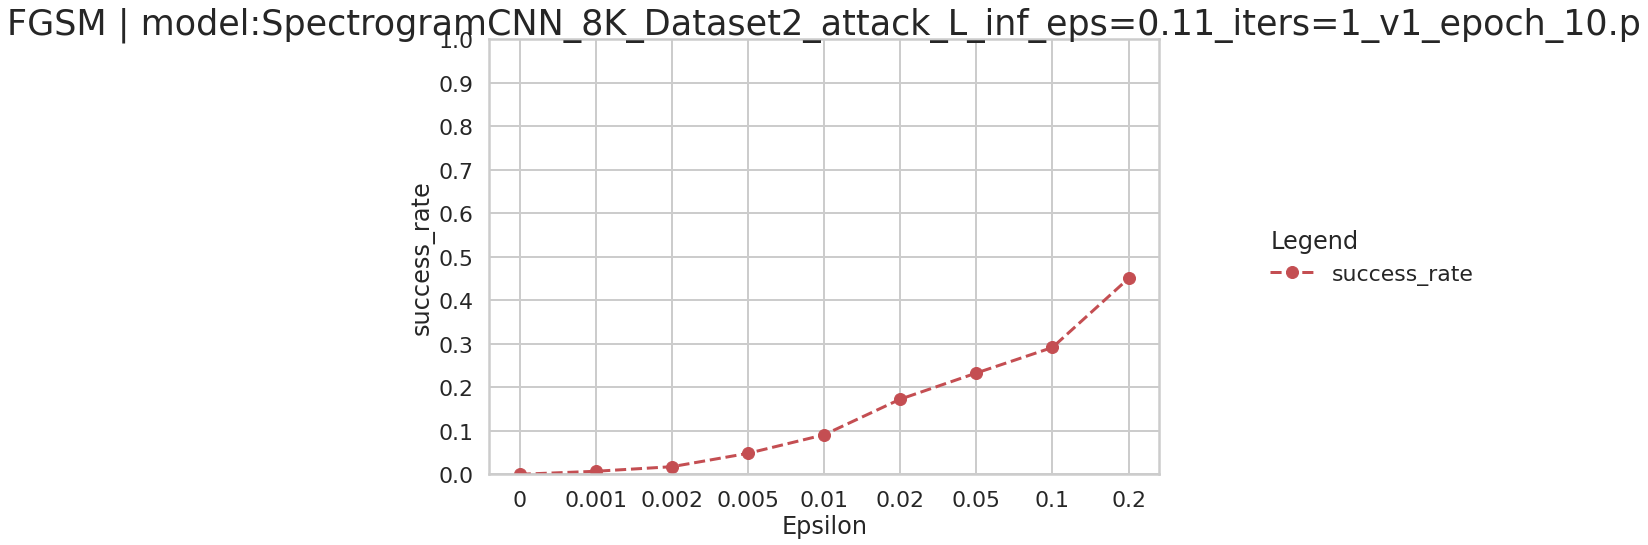

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.37_iters=1_v27_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.37_iters=1_v27_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.72s/it]


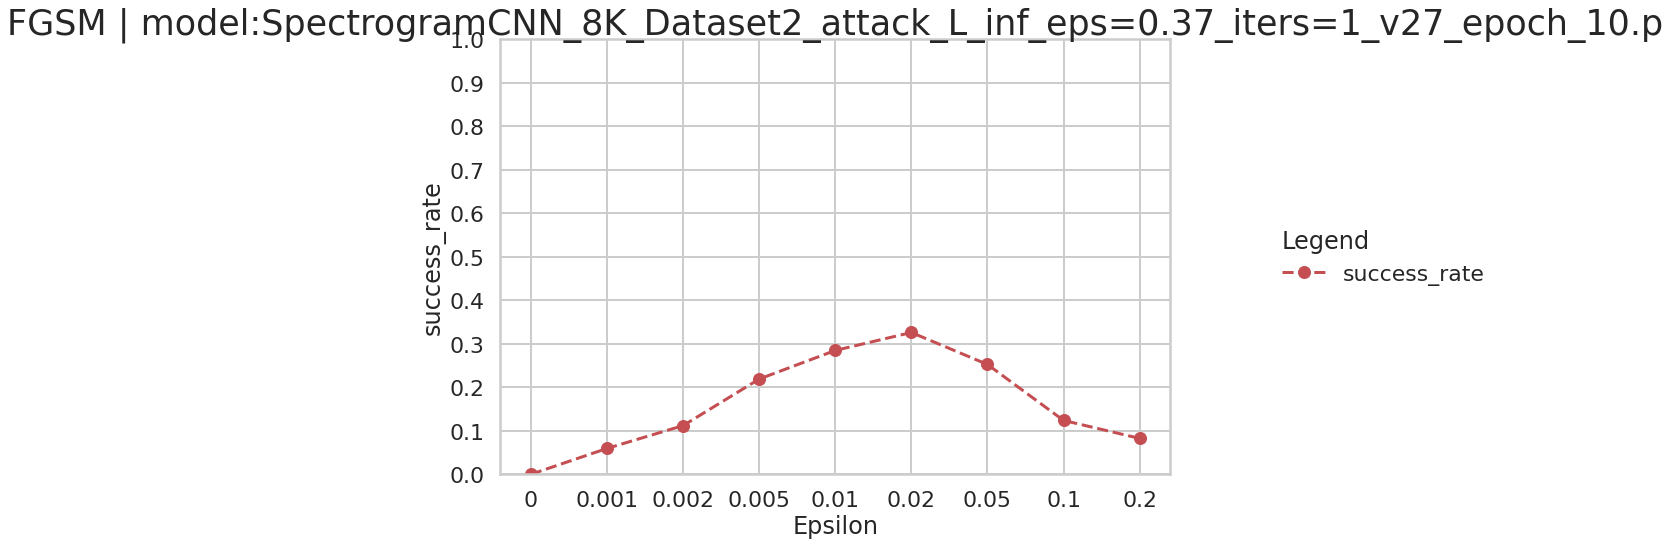

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.38_iters=1_v28_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.38_iters=1_v28_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.63s/it]


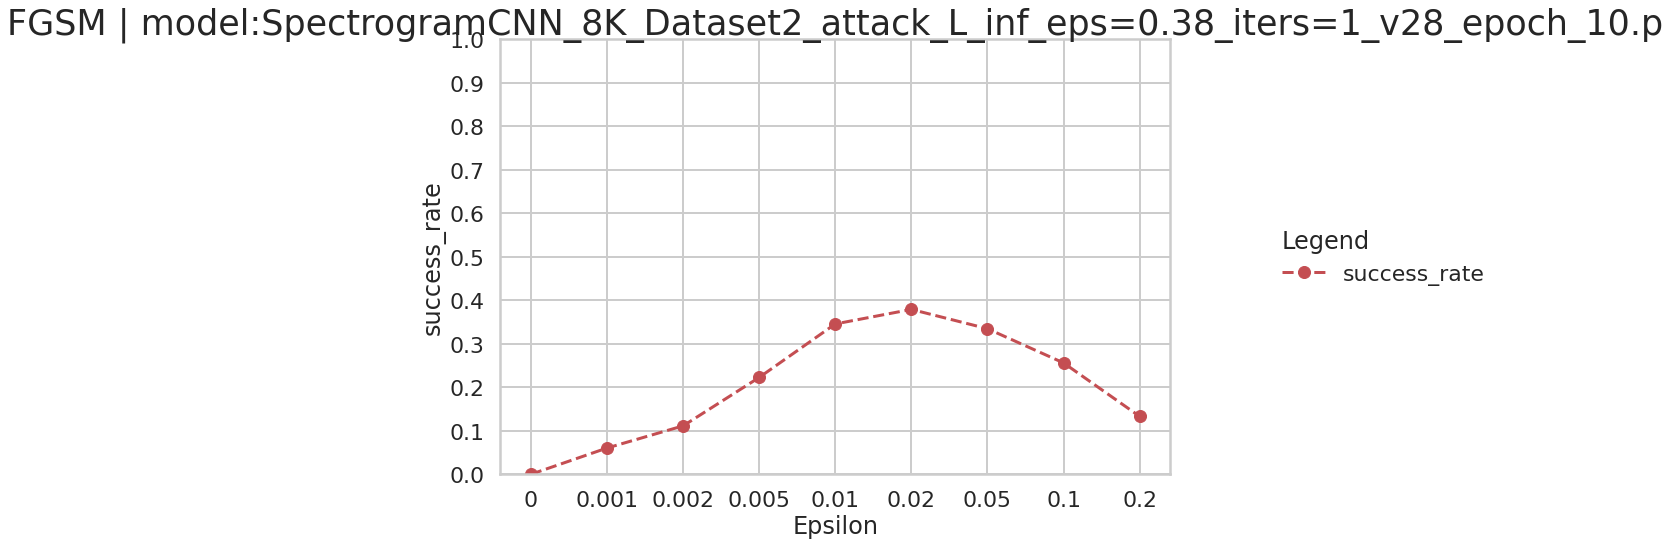

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.73s/it]


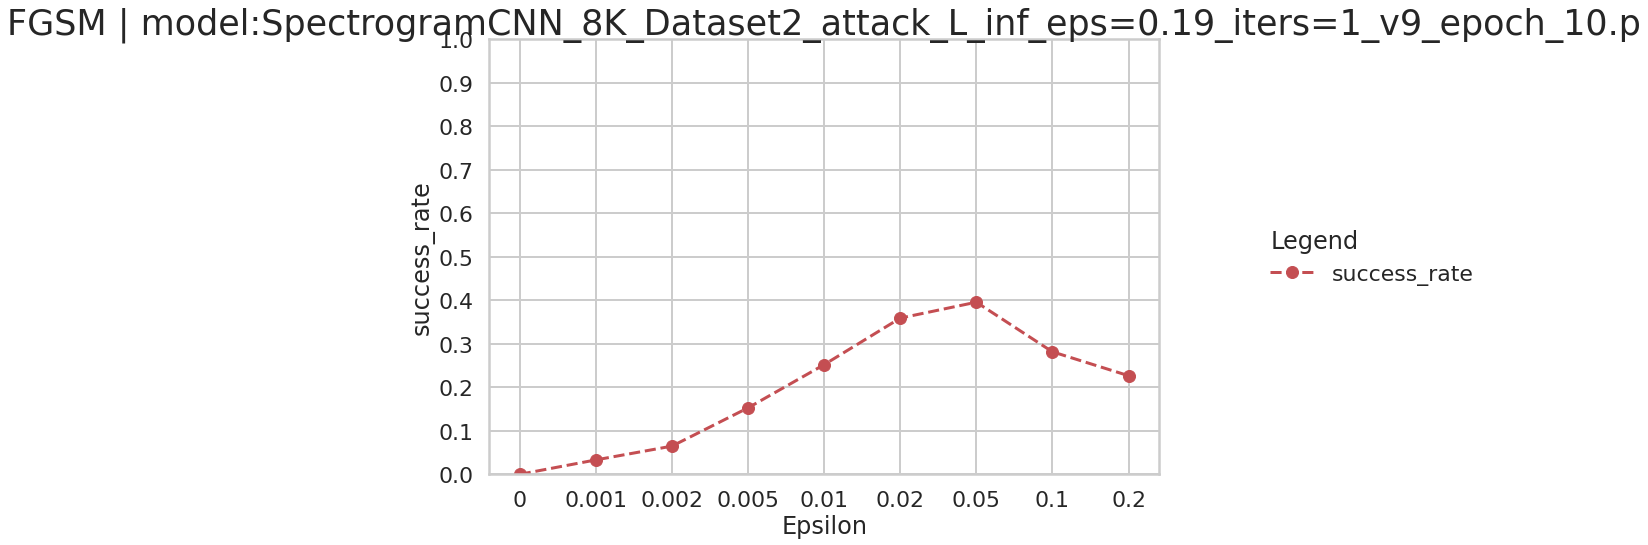

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.42000000000000004_iters=1_v32.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spectrog

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.62s/it]


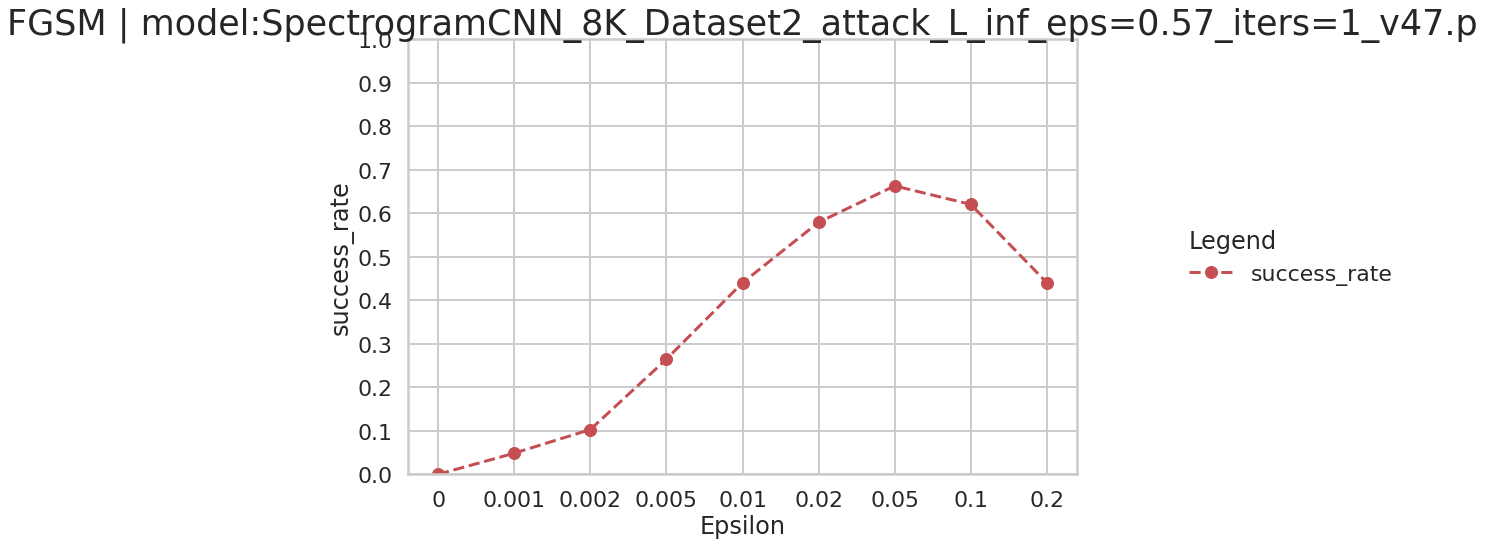

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.57_iters=1_v47_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.48s/it]


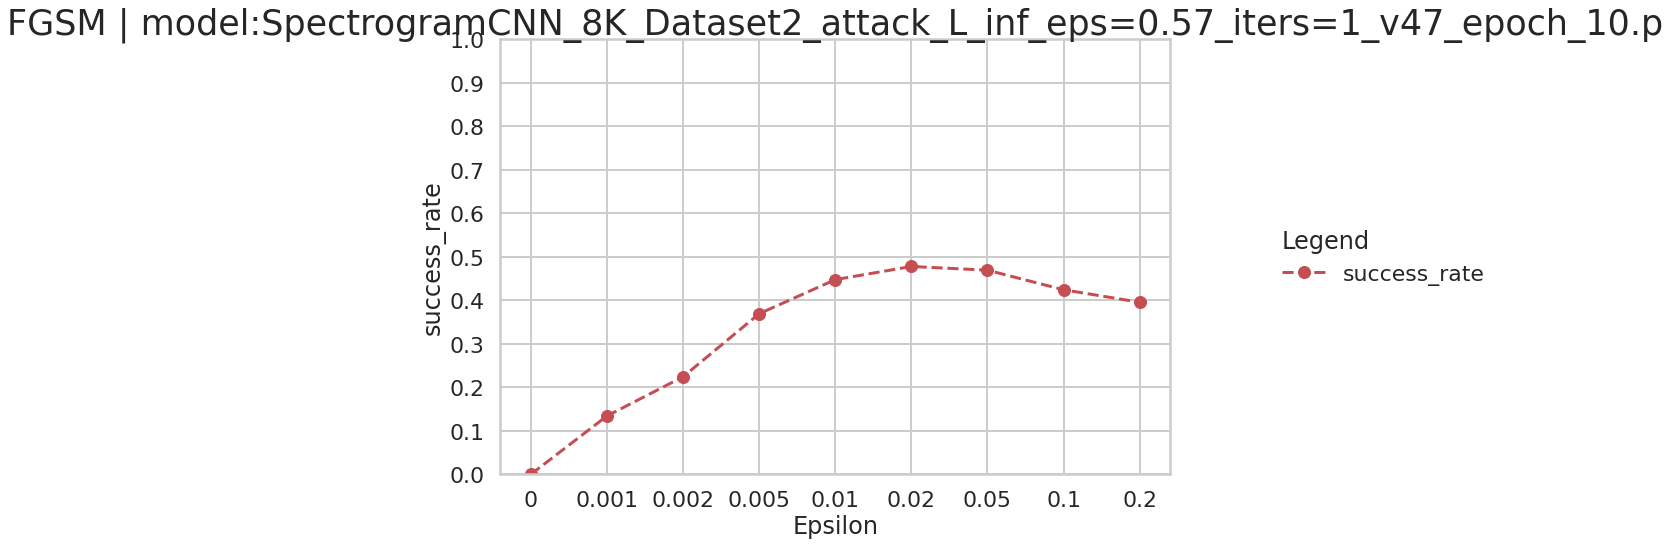

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v21_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v21_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.65s/it]


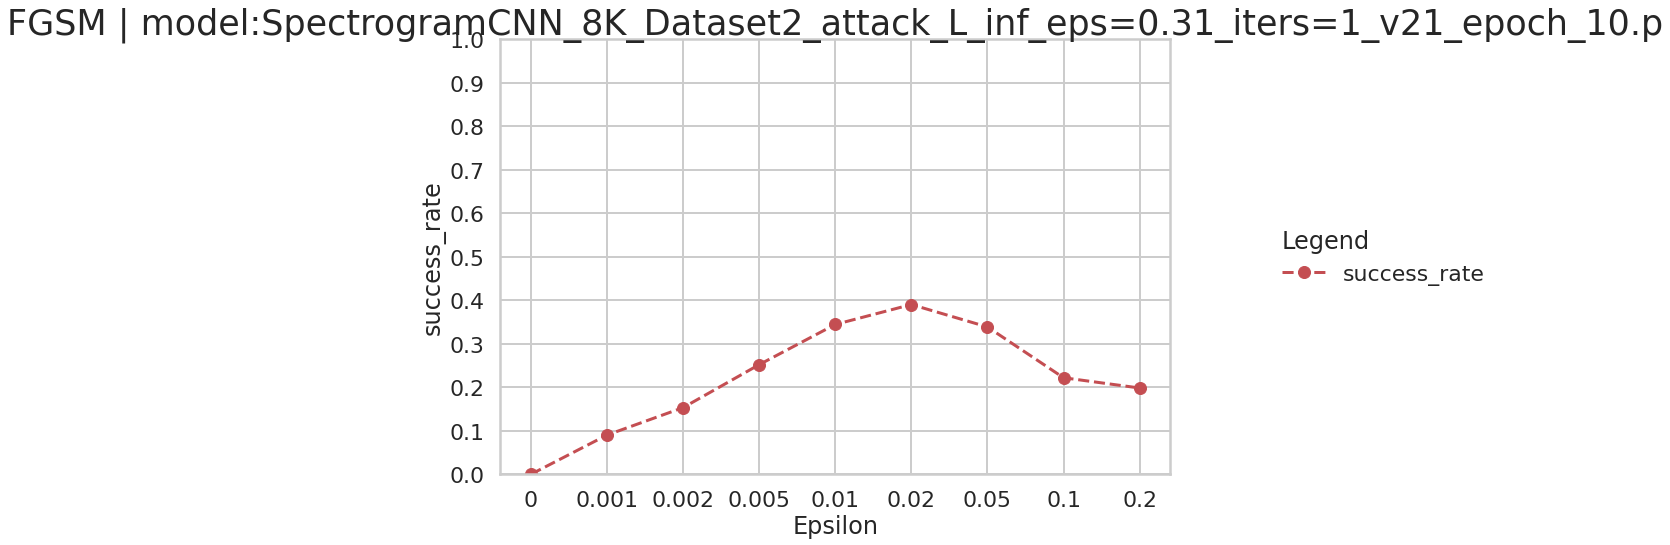

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.48_iters=1_v38.p

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


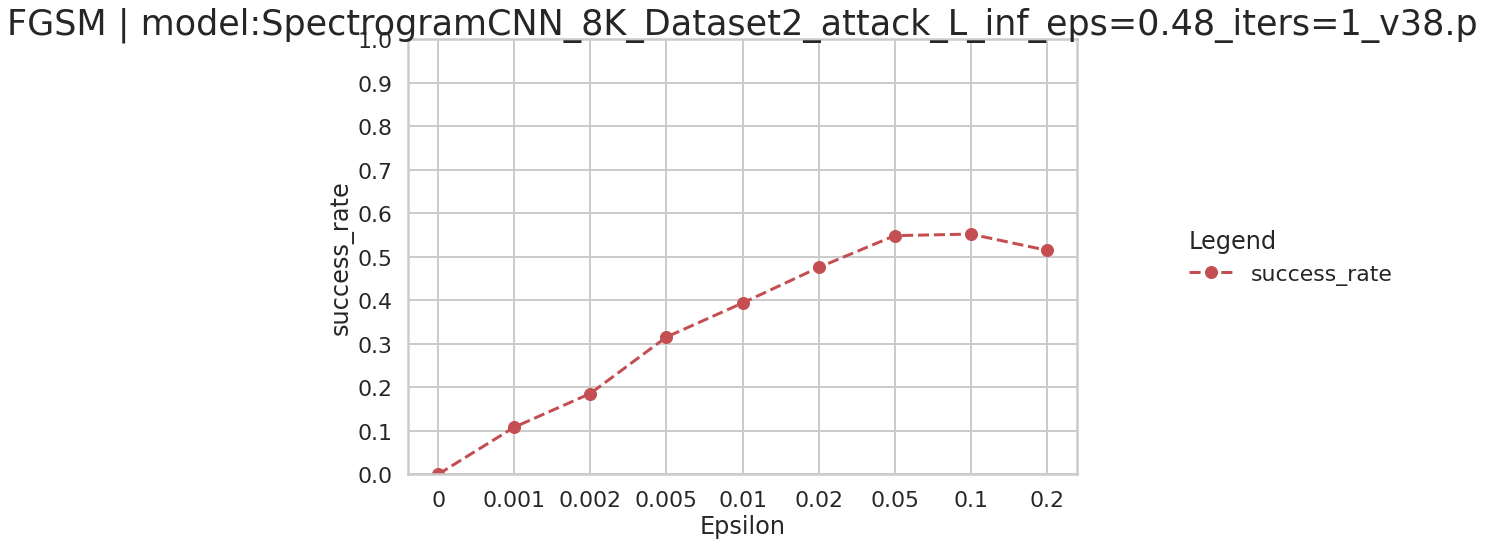

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Data

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.49_iters=1_v39.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.49_iters=1_v39.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.58s/it]


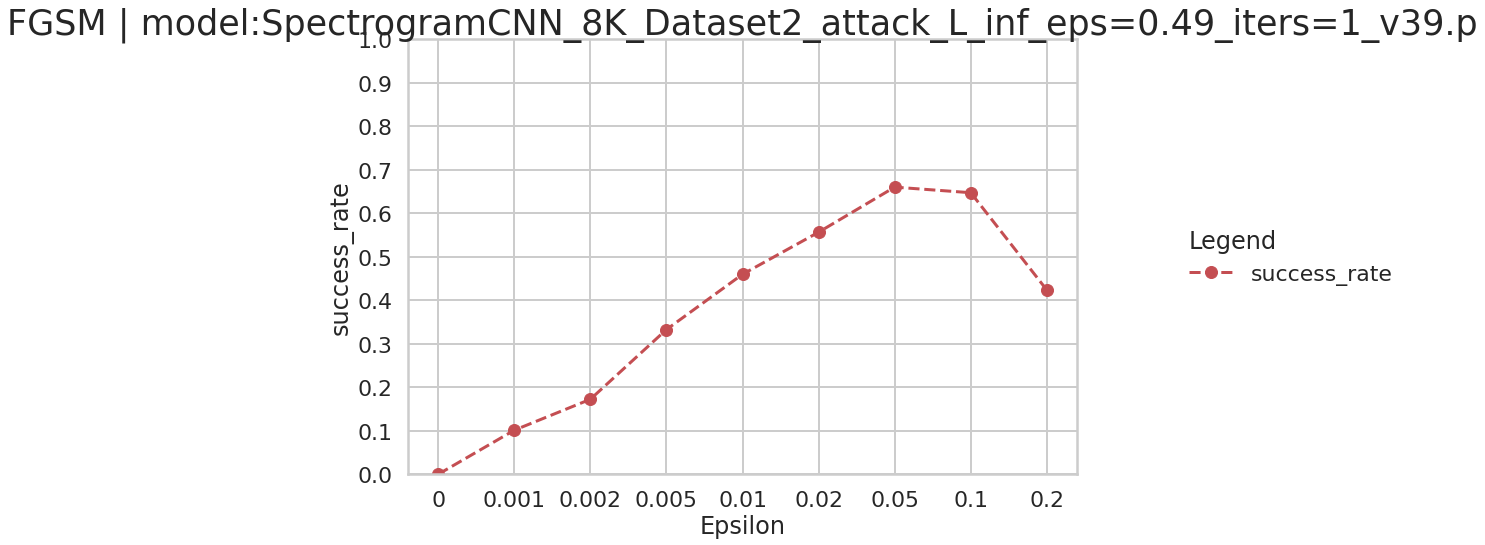

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


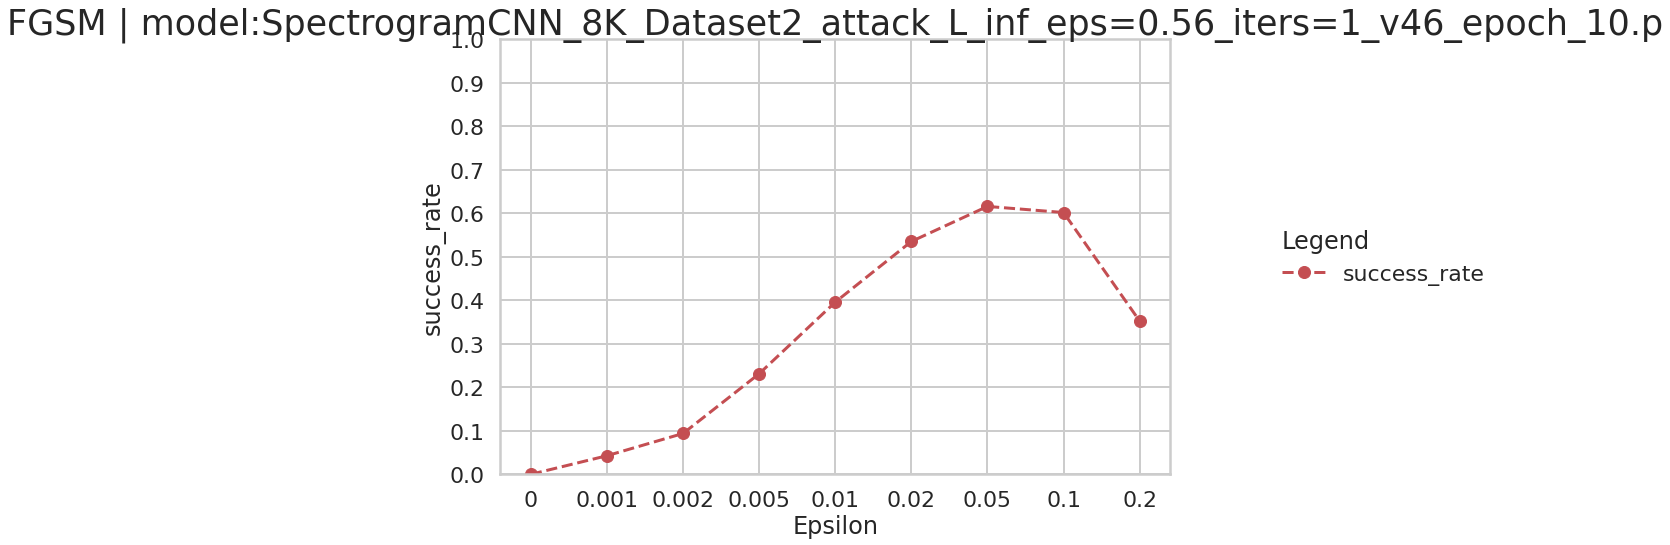

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.73s/it]


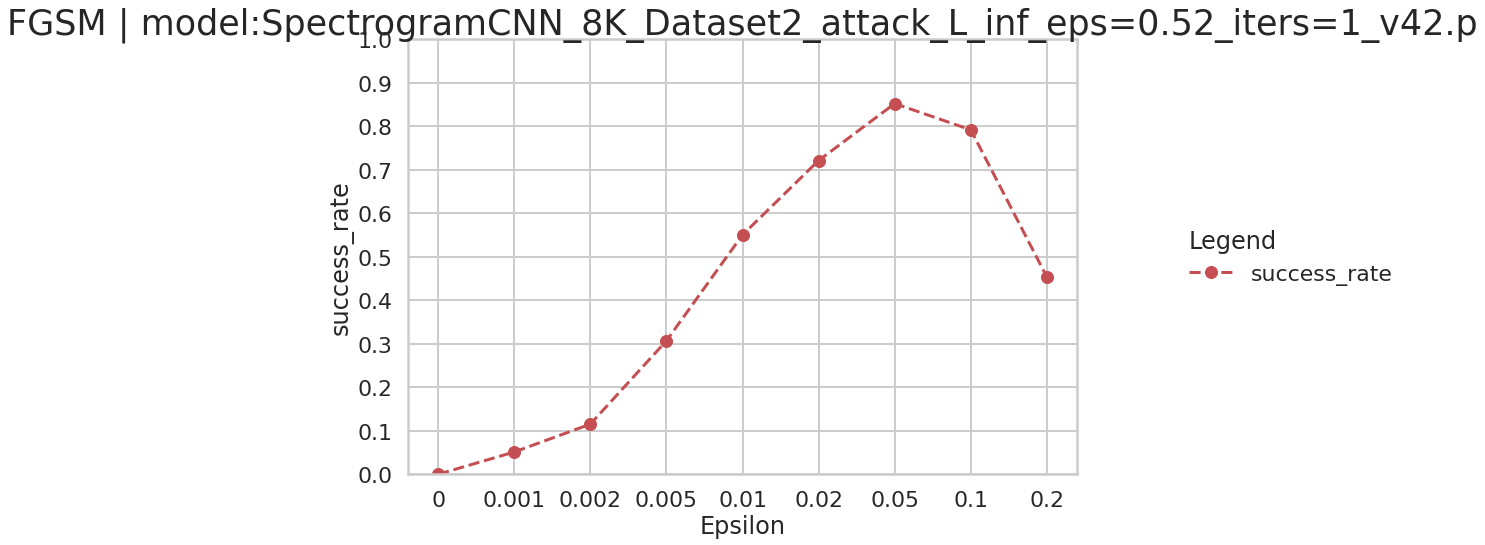

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.64s/it]


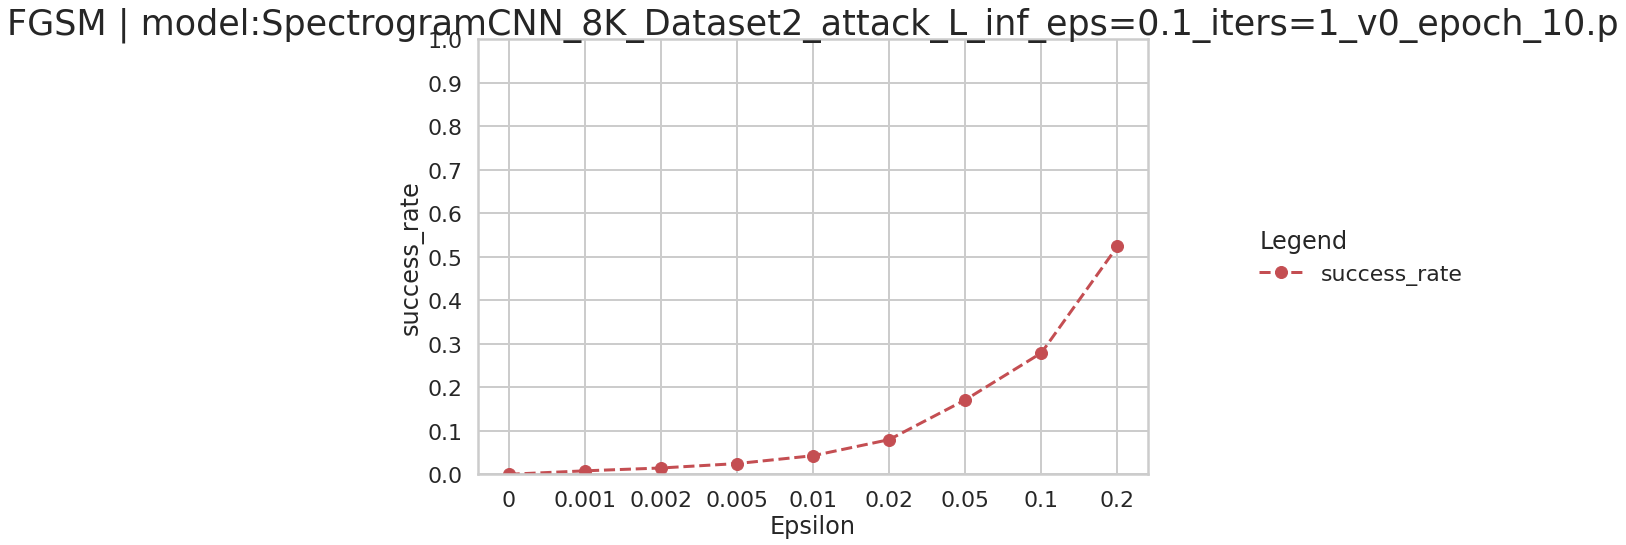

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


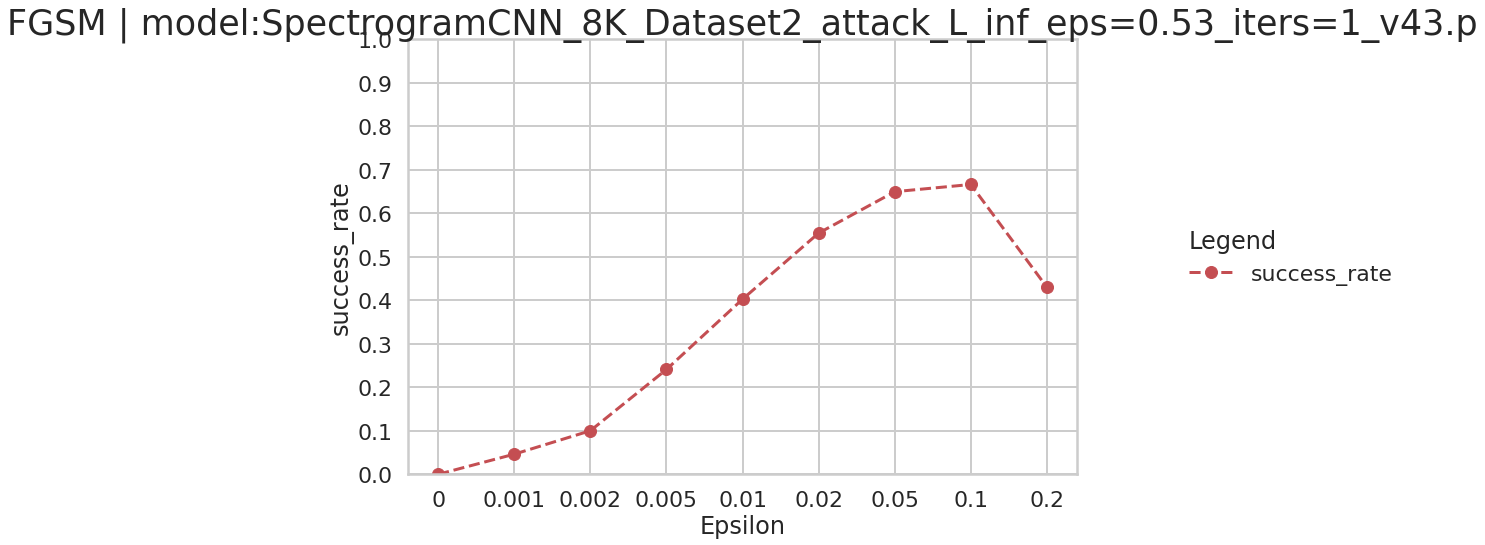

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.38_iters=1_v28.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.38_iters=1_v28.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.4_iters=1_v30_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.4_iters=1_v30_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


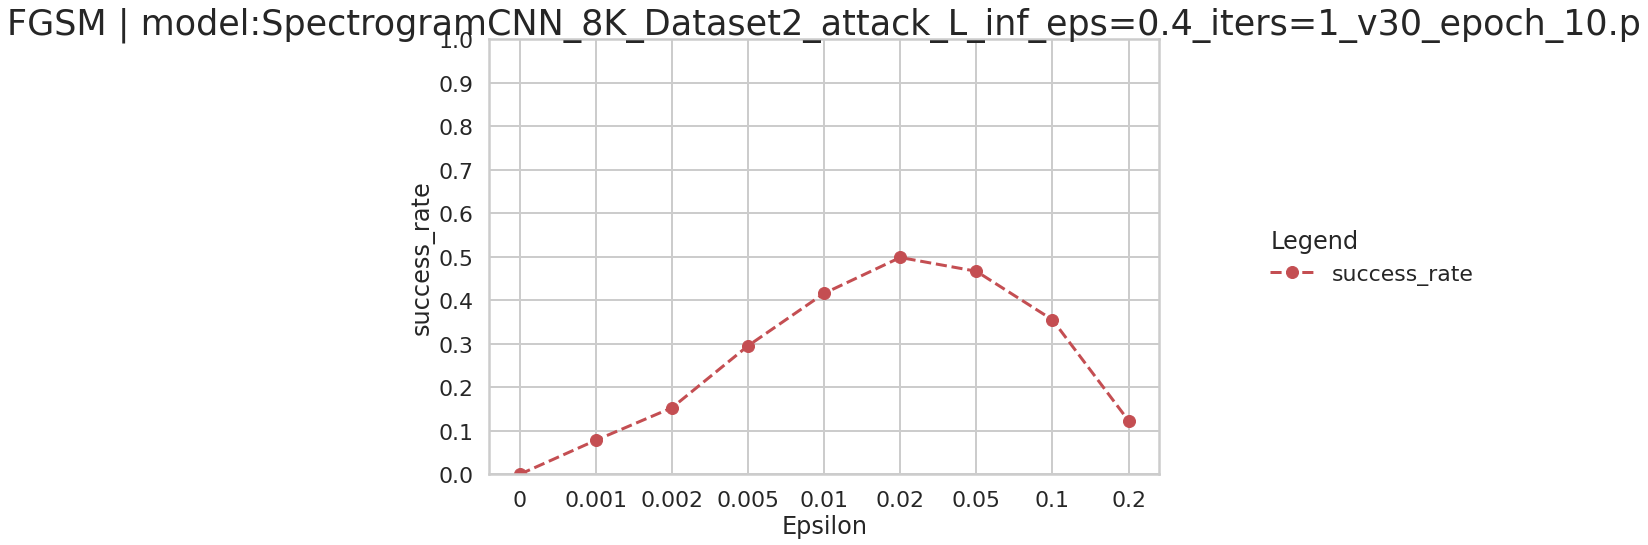

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.75s/it]


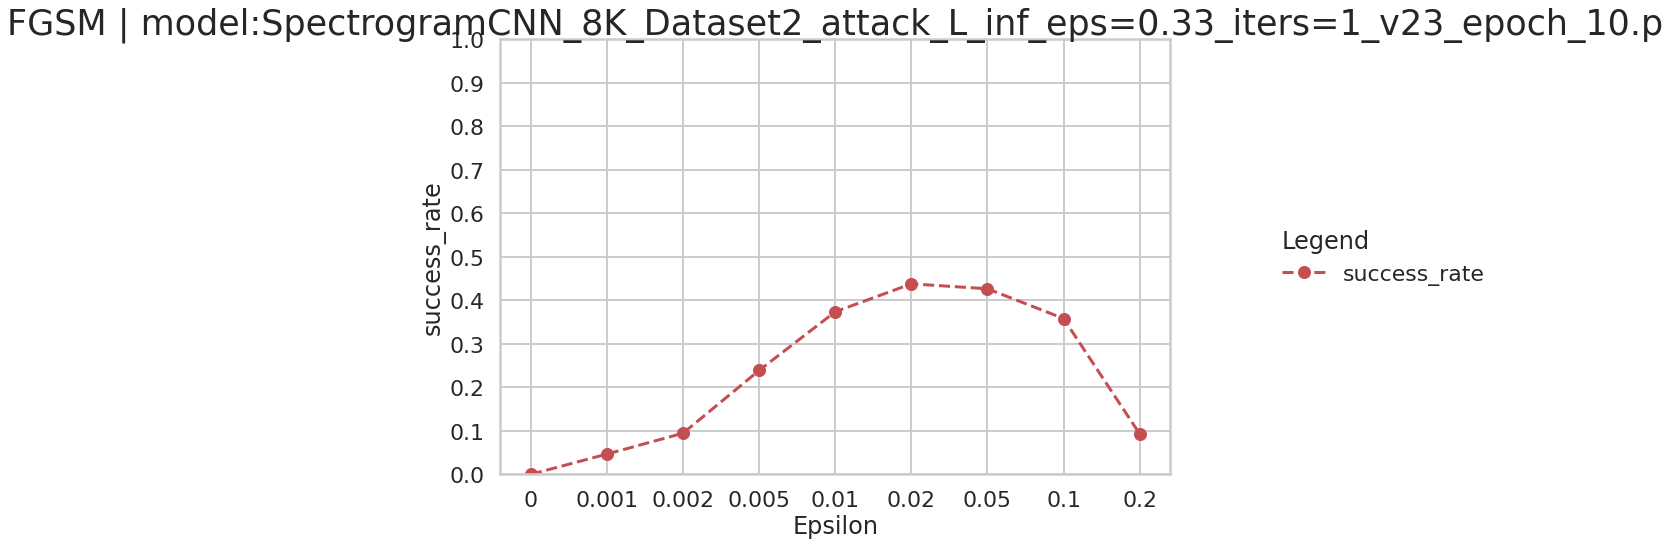

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.43000000000000005_iters=1_v33_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.43000000000000005_iters=1_v33_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.62s/it]


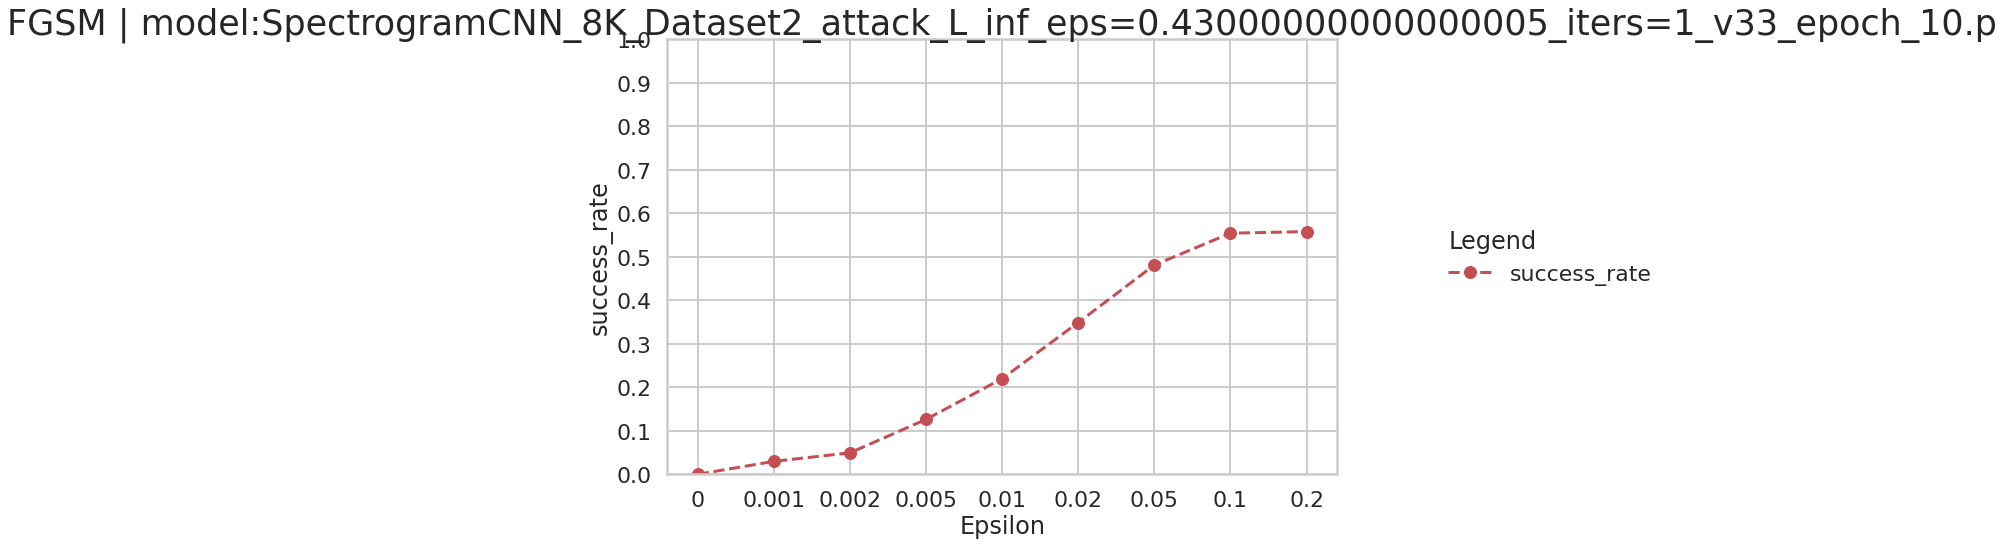

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.61s/it]


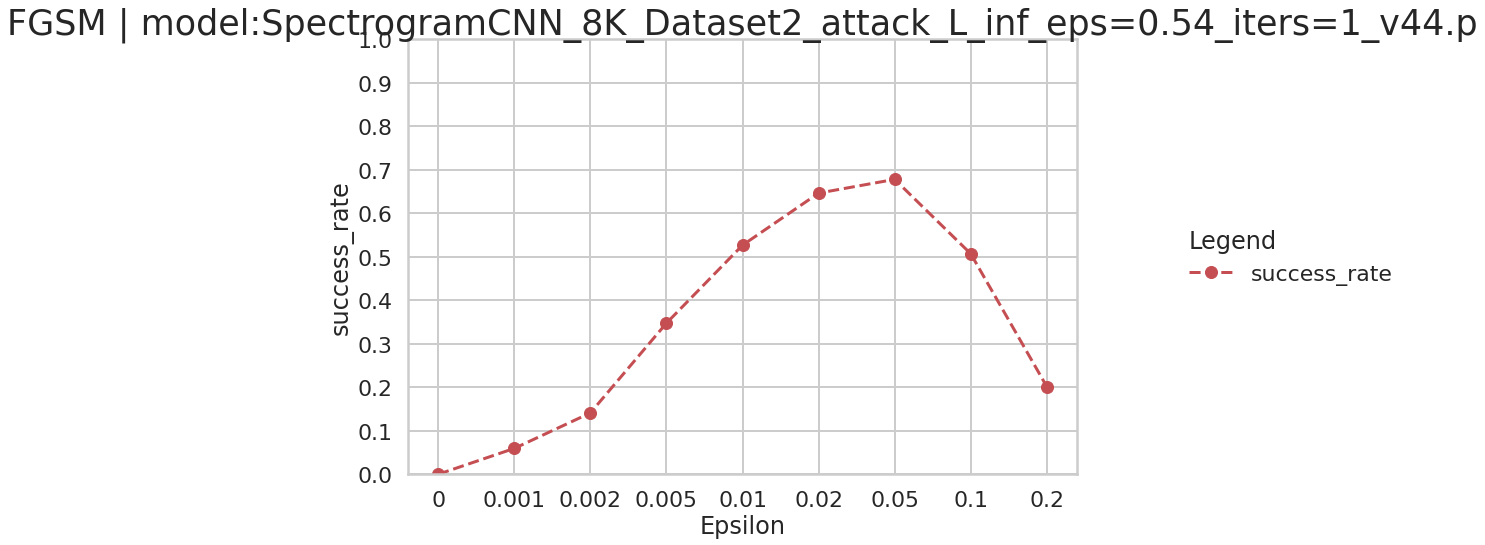

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.76s/it]


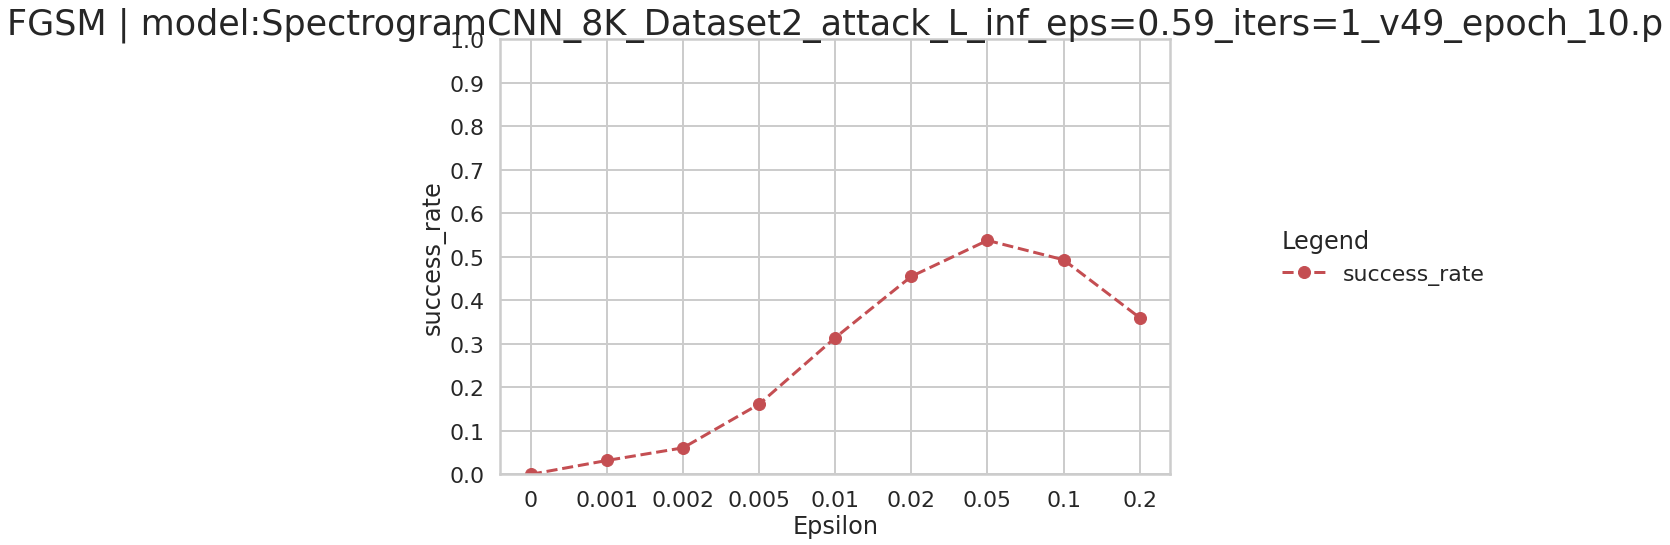

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.39_iters=1_v29_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.39_iters=1_v29_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:26<00:00,  2.99s/it]


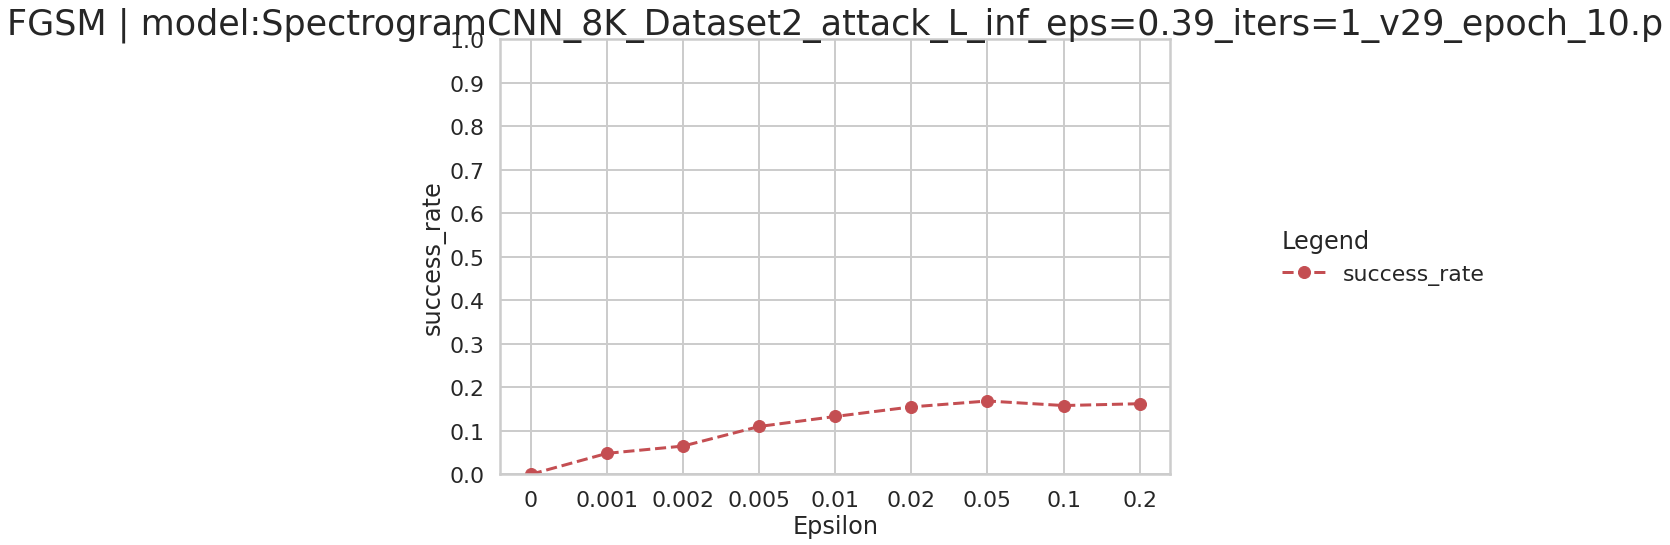

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.30000000000000004_iters=1_v20_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


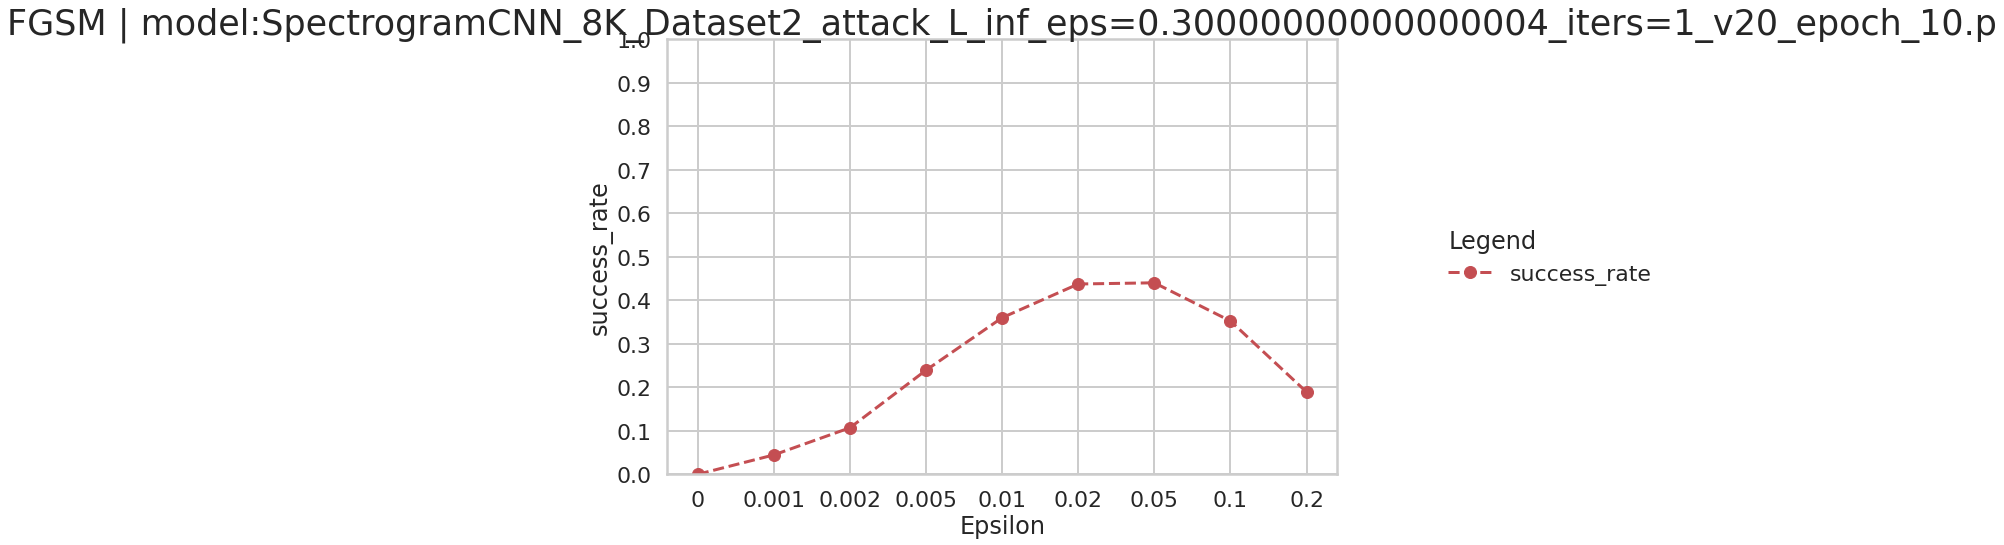

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.19_iters=1_v9.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Datase

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.63s/it]


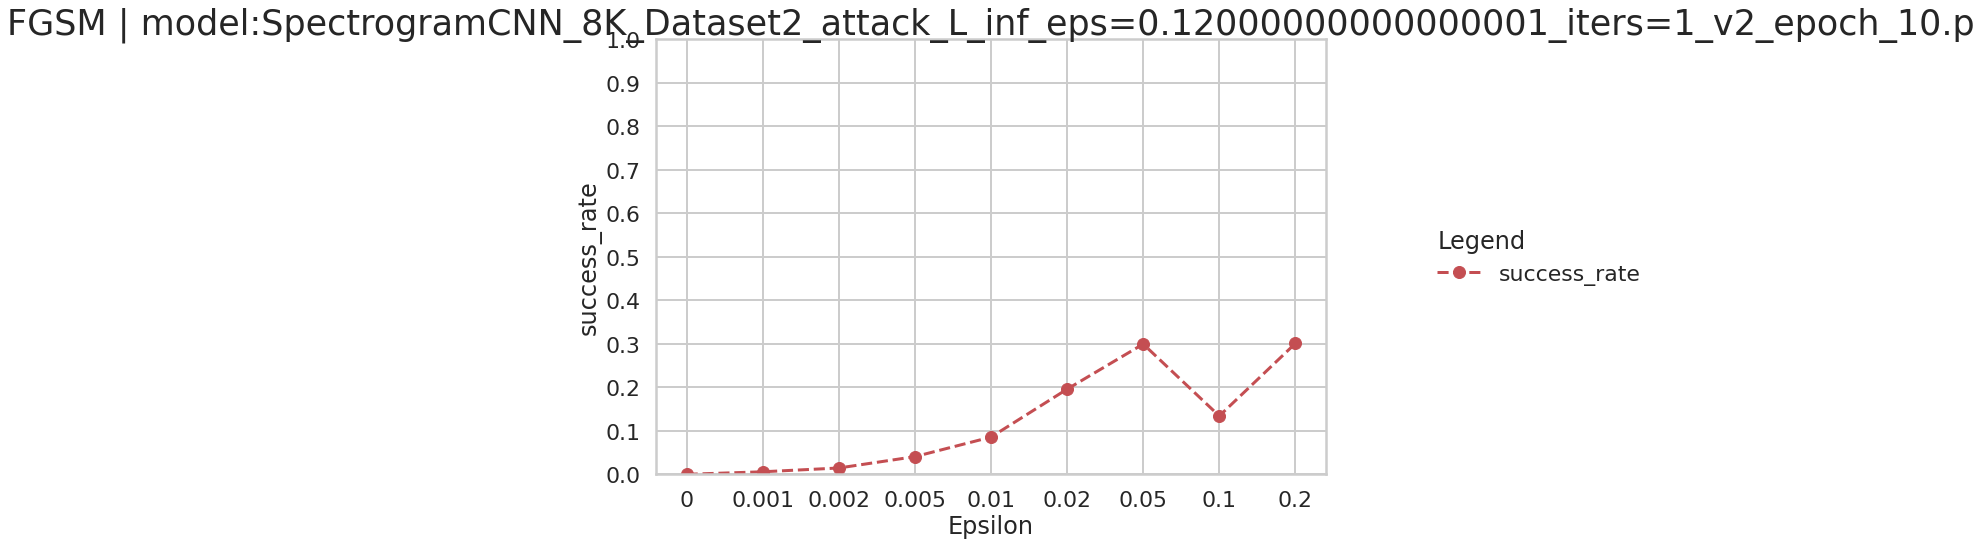

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.4_iters=1_v30.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Data

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.73s/it]


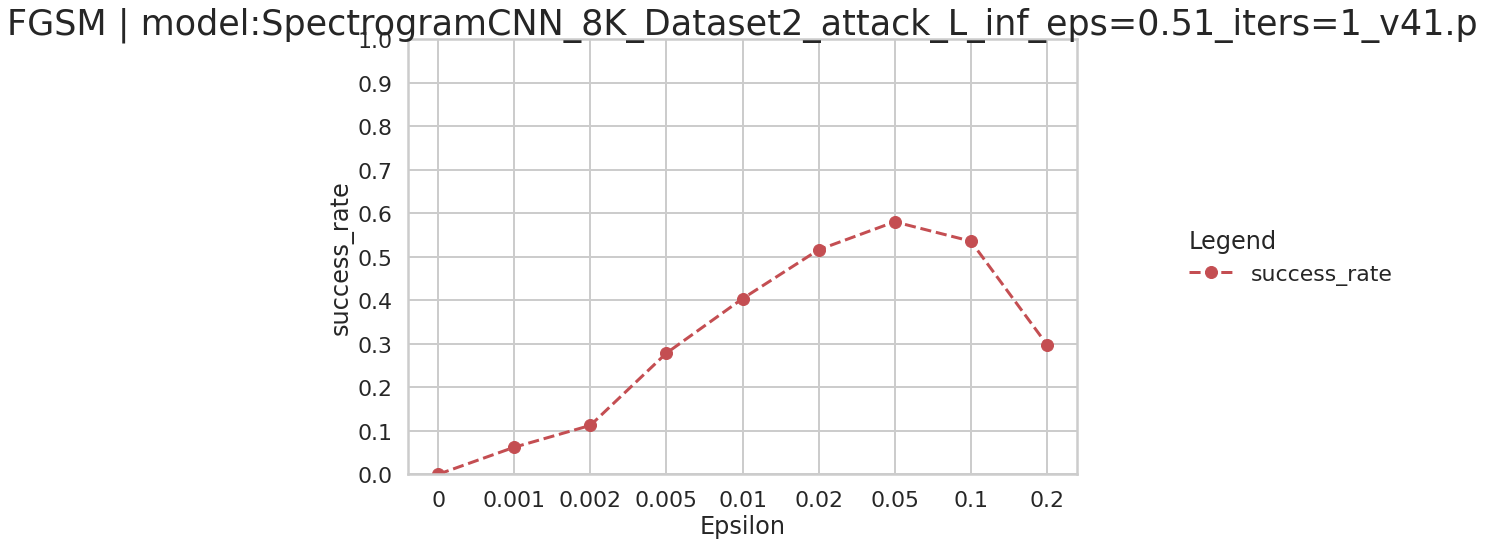

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.51_iters=1_v41_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.57s/it]


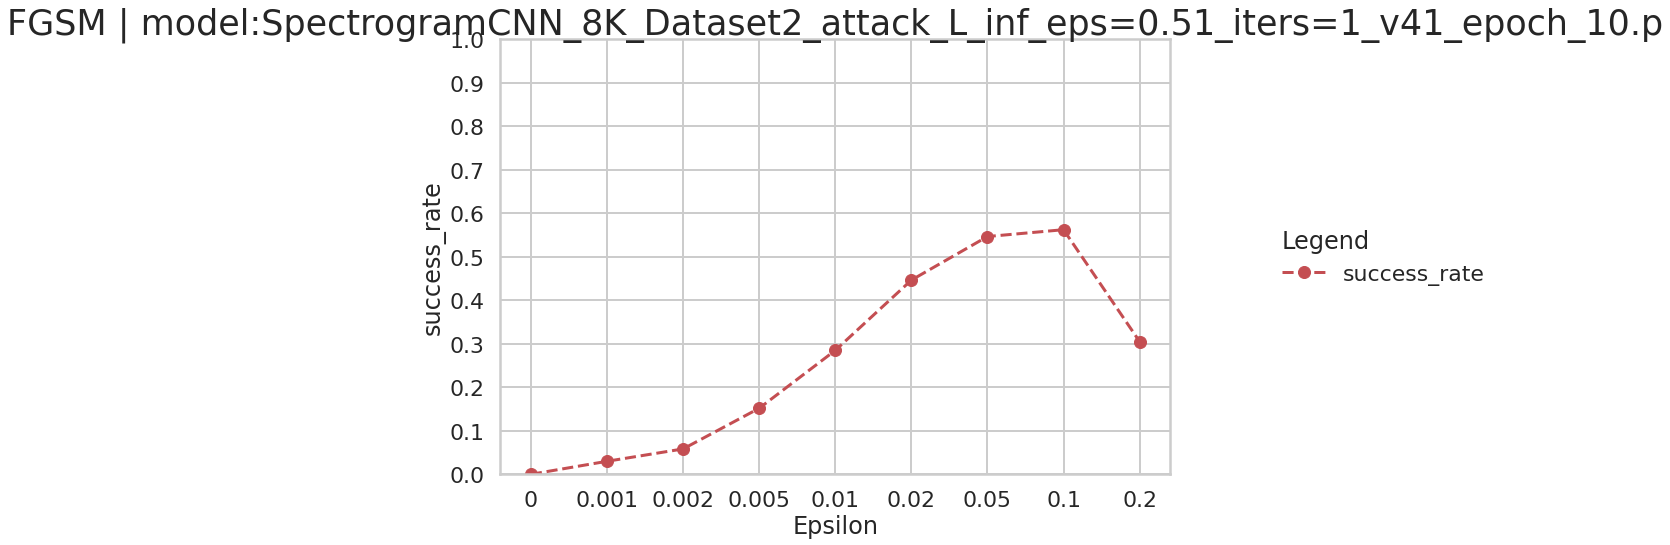

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.59_iters=1_v49.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.76s/it]


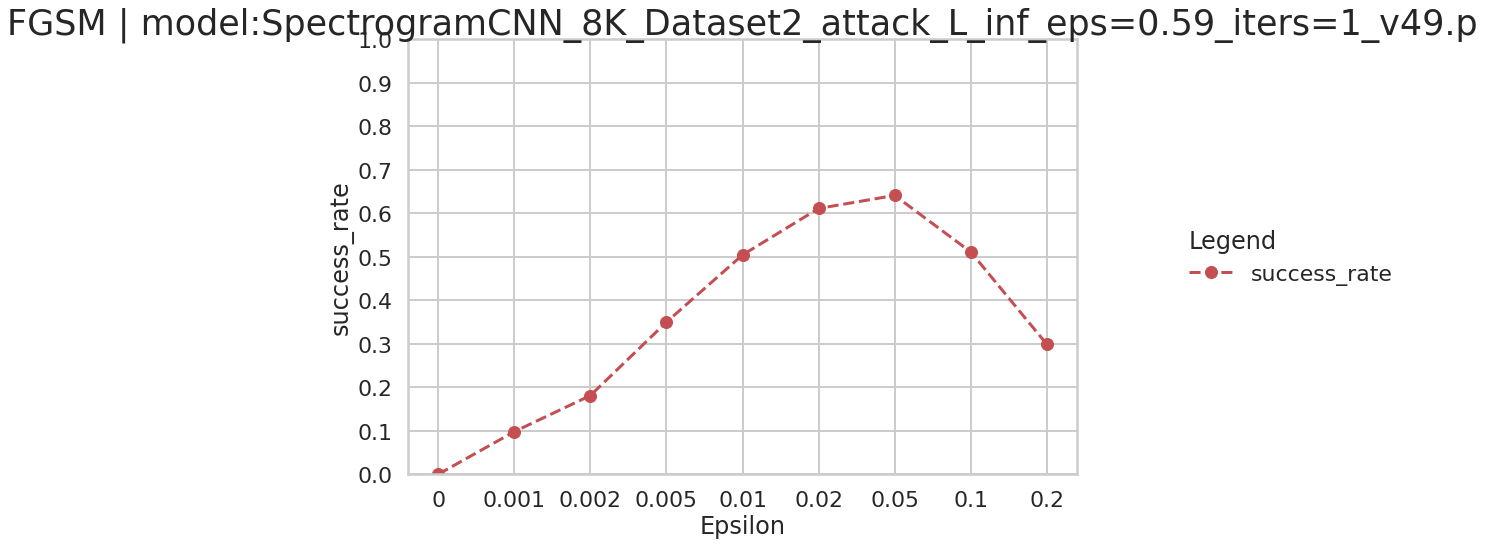

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.24000000000000002_iters=1_v14_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.51s/it]


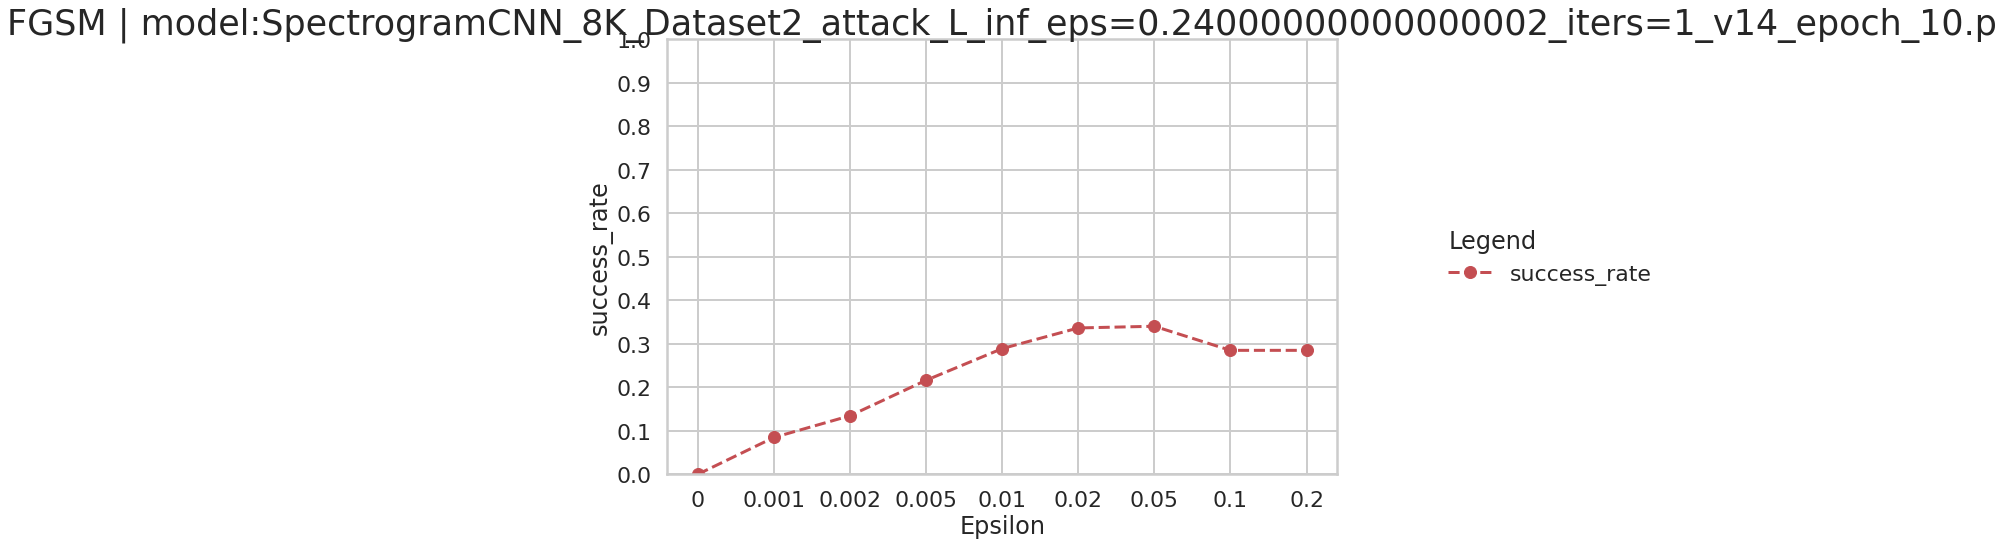

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:27<00:00,  3.00s/it]


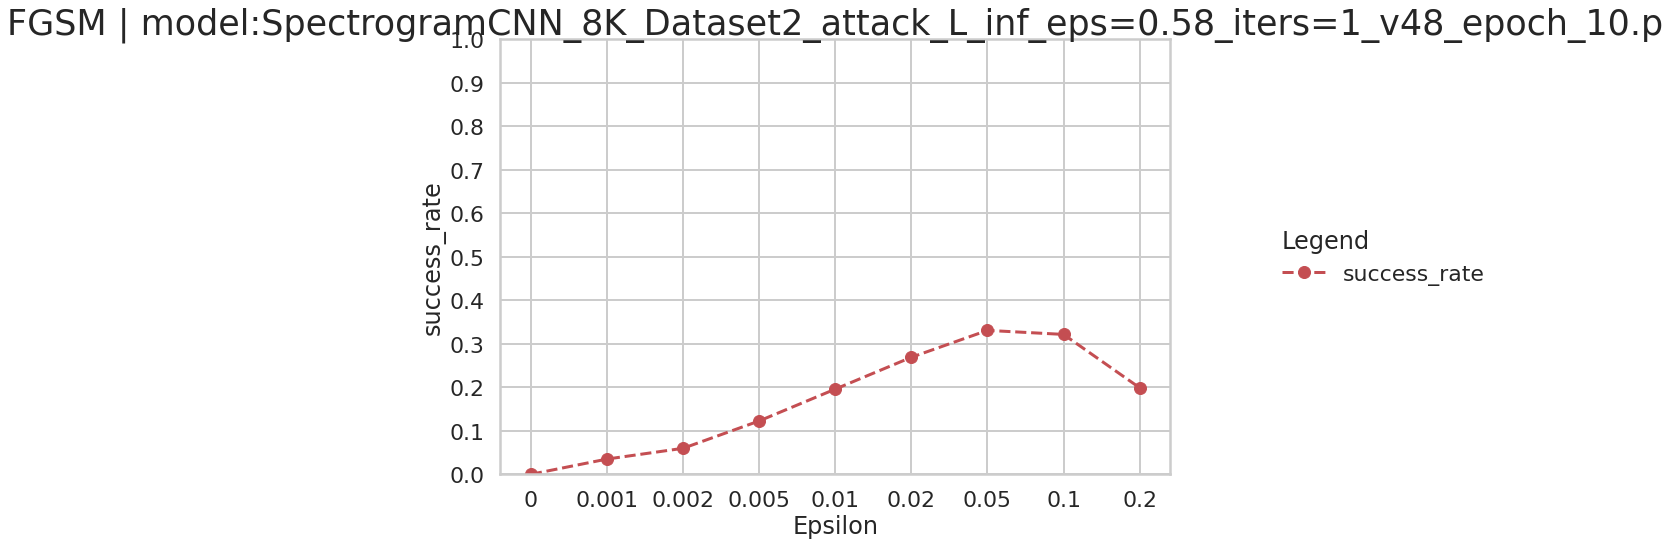

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.17_iters=1_v7_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.69s/it]


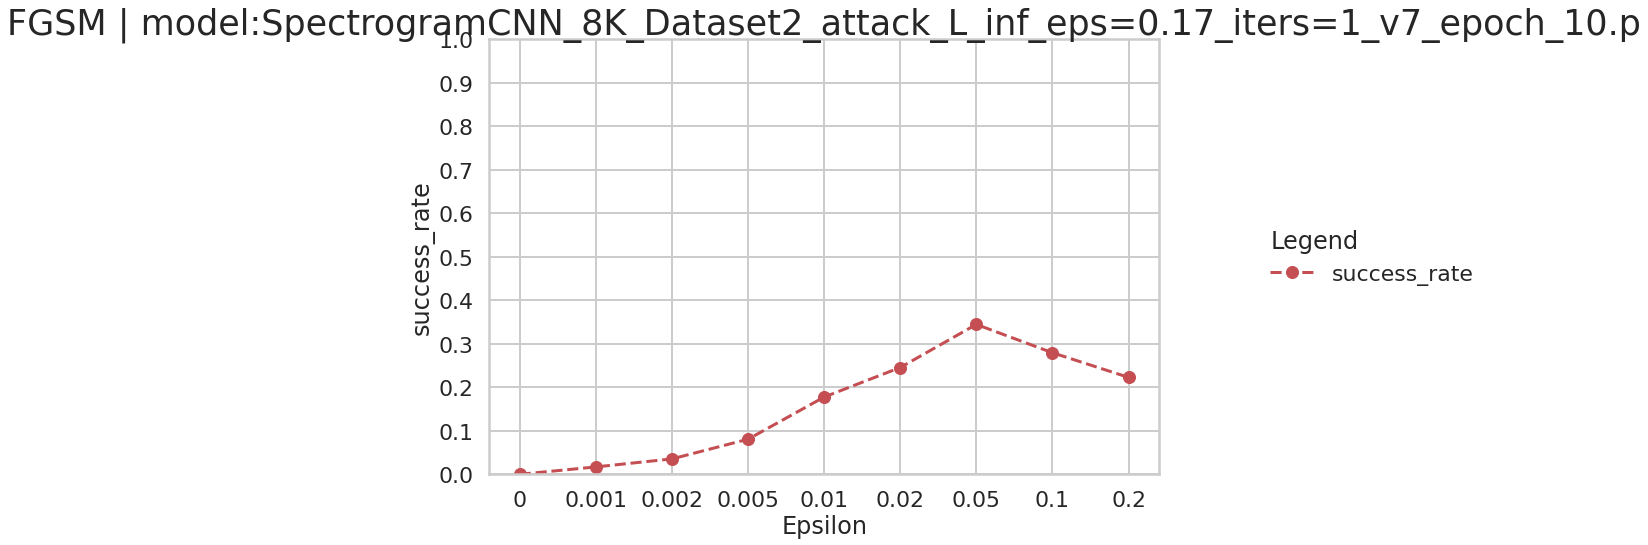

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.49_iters=1_v39_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.49_iters=1_v39_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.61s/it]


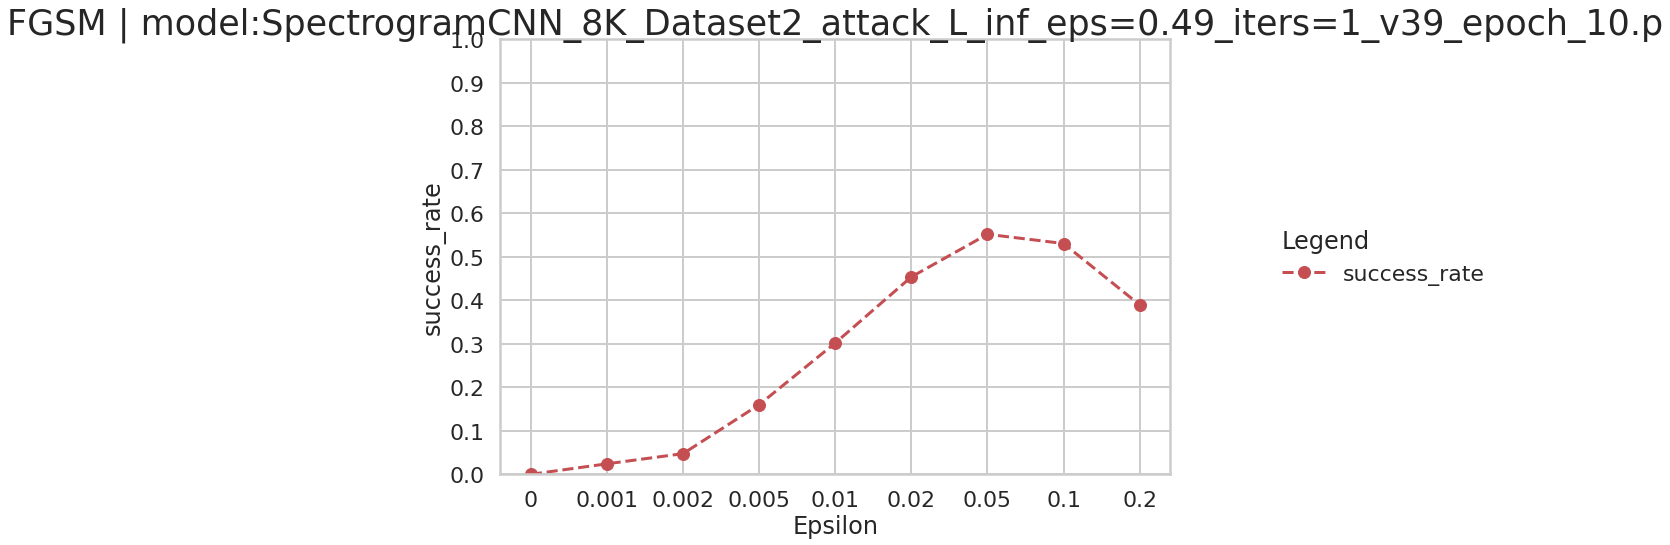

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.44000000000000006_iters=1_v34.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spectrog

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.44999999999999996_iters=1_v35_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.44999999999999996_iters=1_v35_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.73s/it]


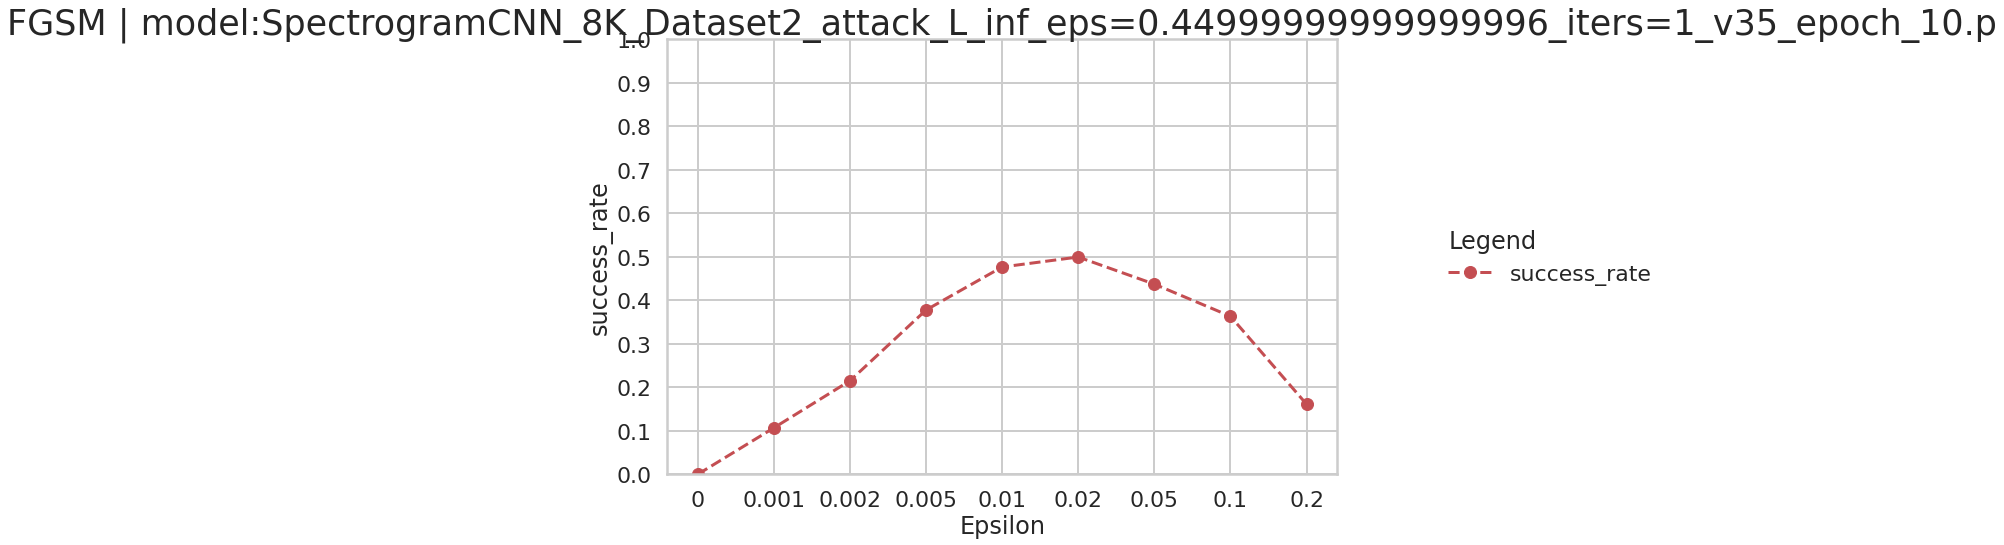

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.47_iters=1_v37_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.53s/it]


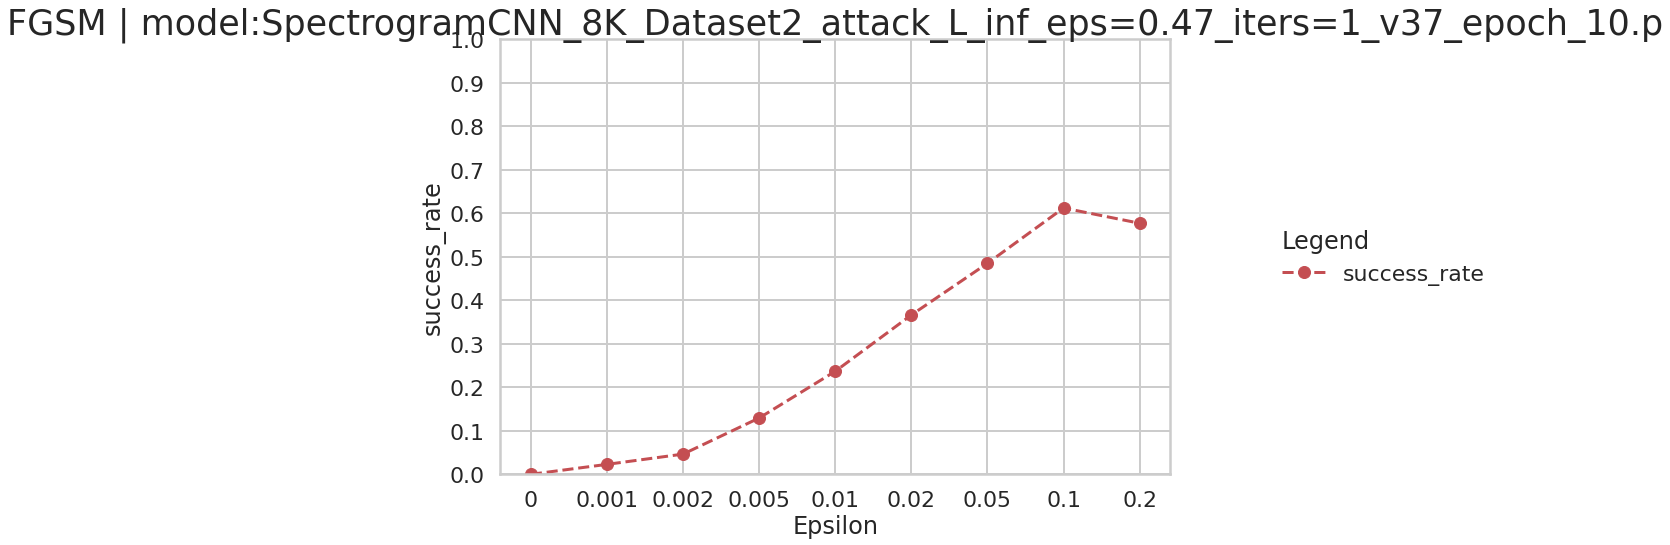

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Datas

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.18_iters=1_v8_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


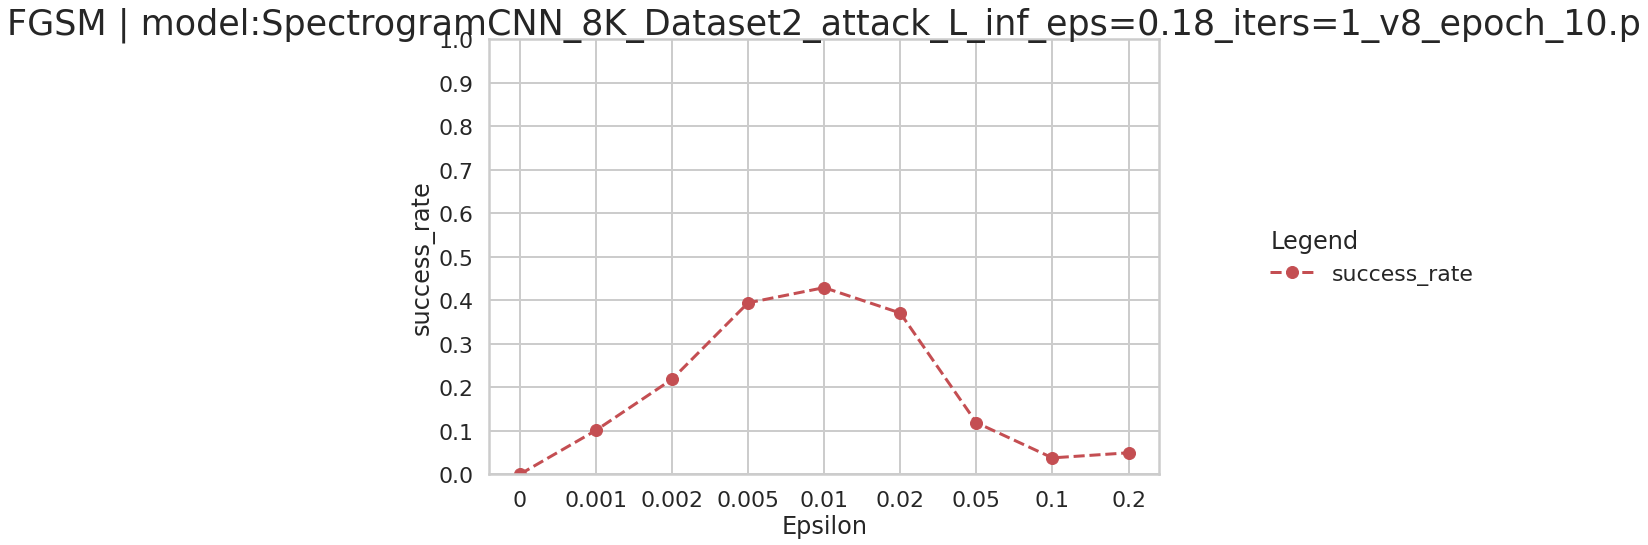

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.22_iters=1_v12_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


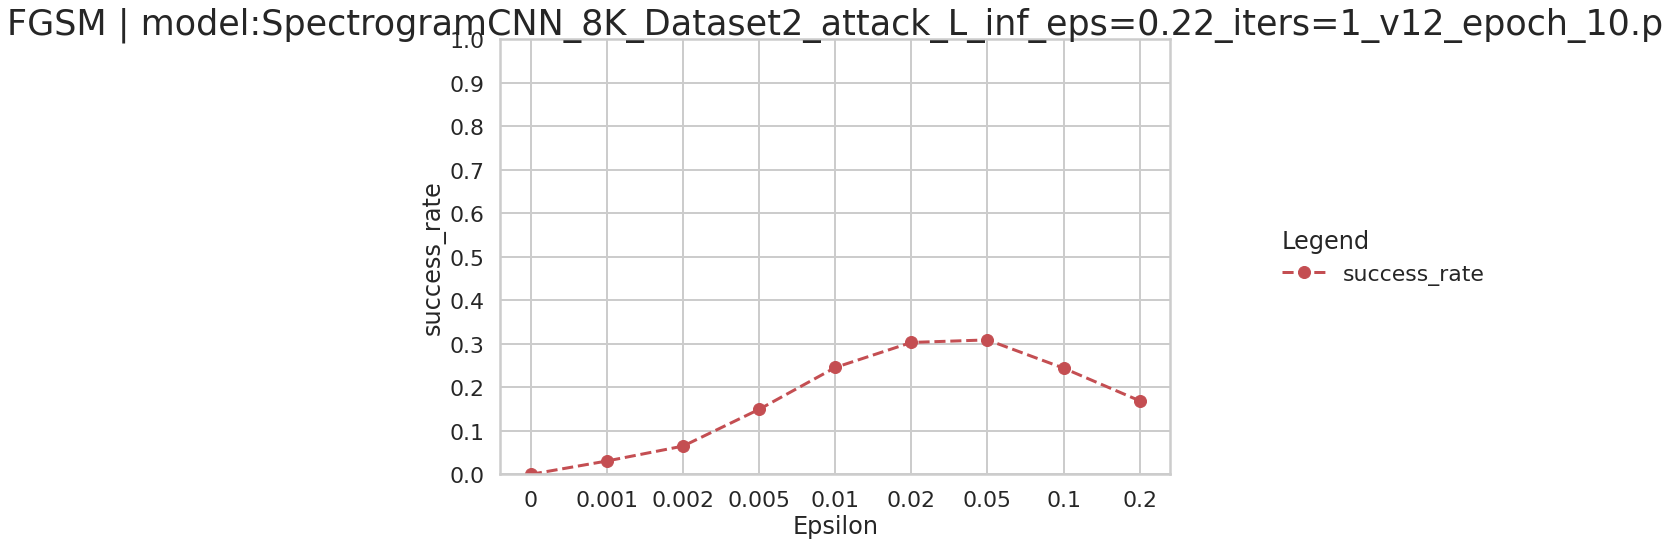

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.73s/it]


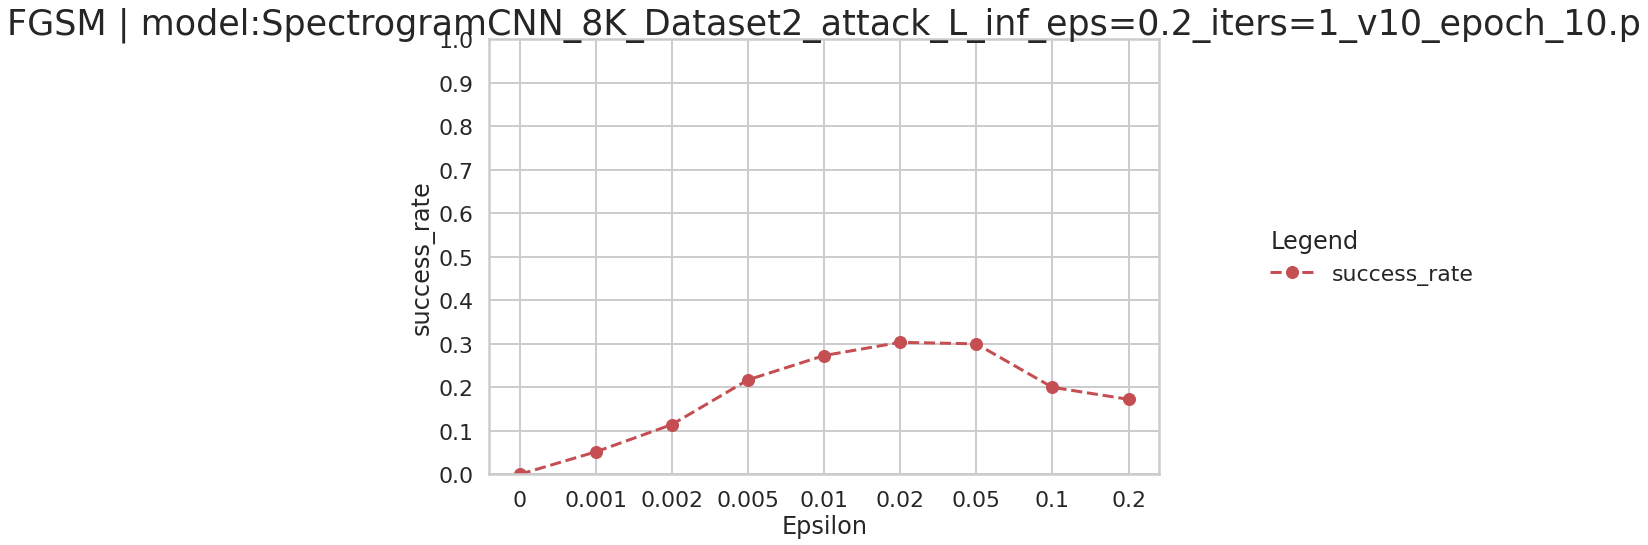

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.69s/it]


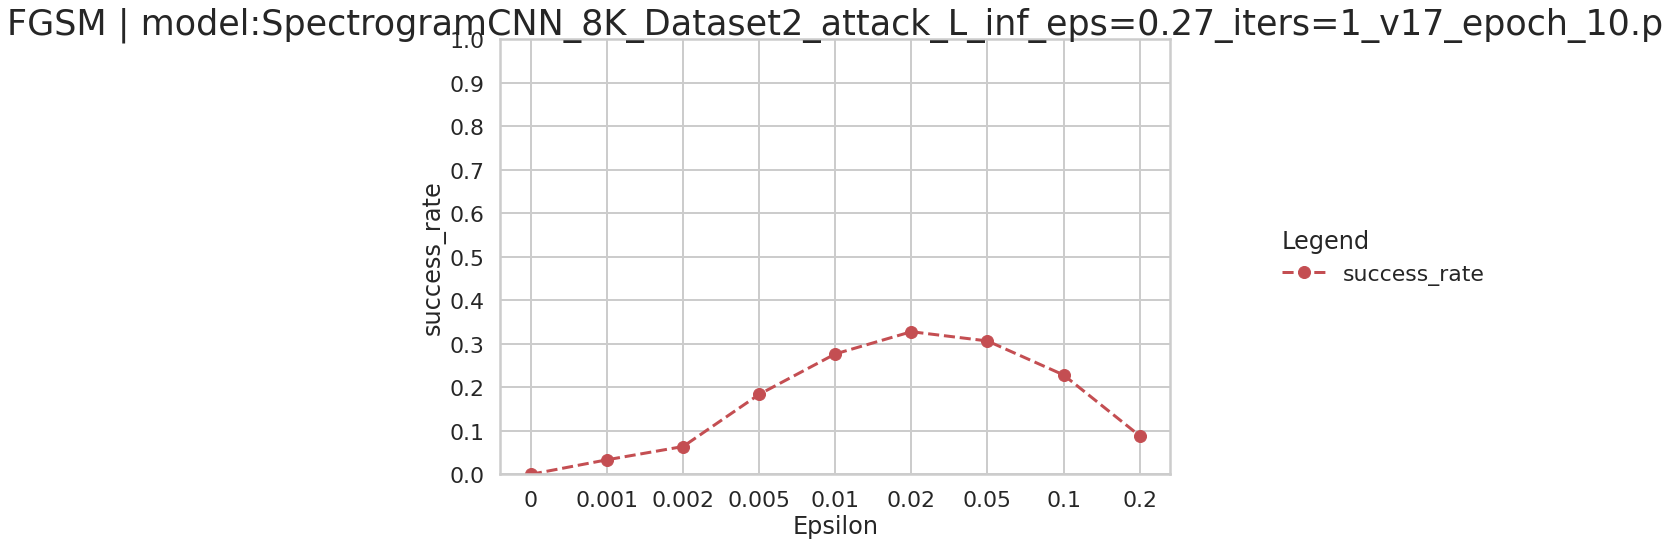

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.41000000000000003_iters=1_v31_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.75s/it]


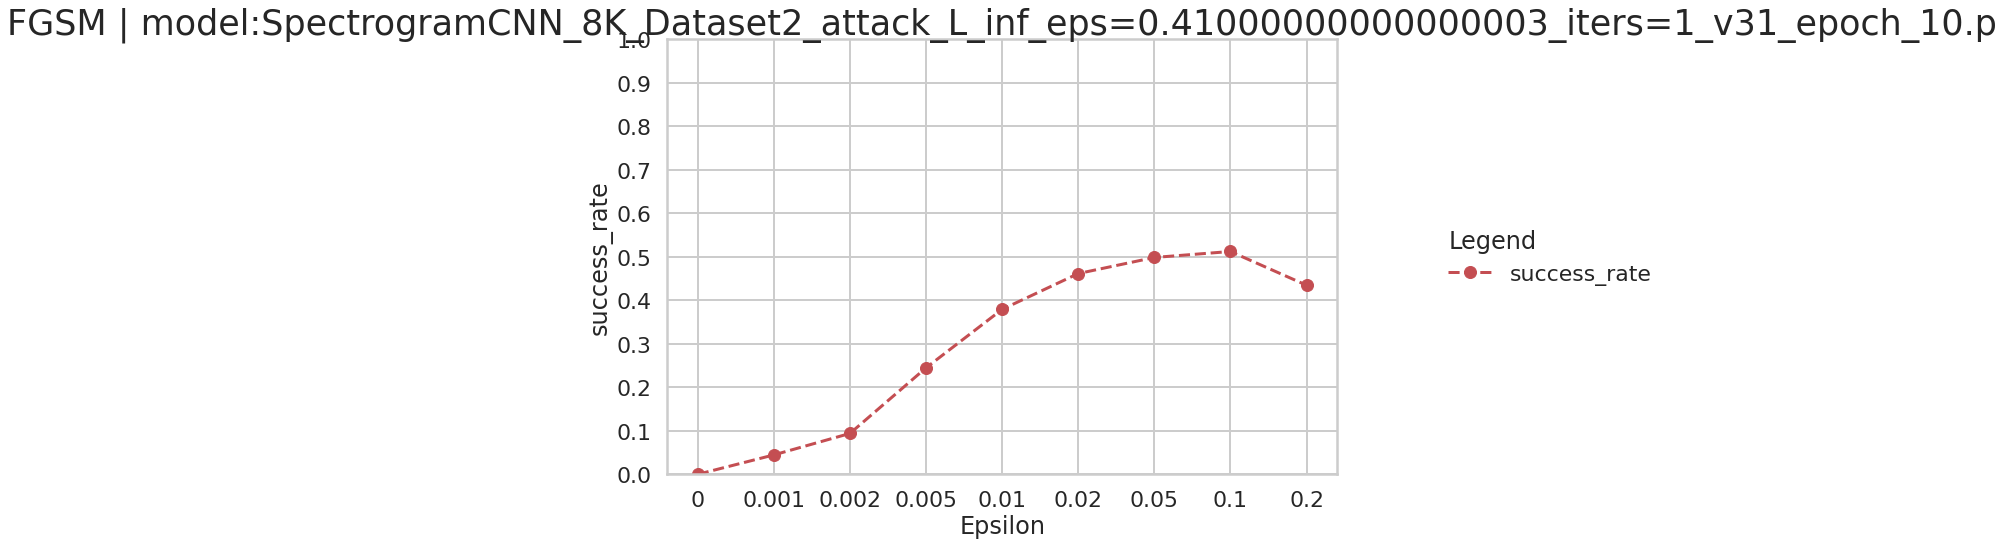

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.35_iters=1_v25_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.53s/it]


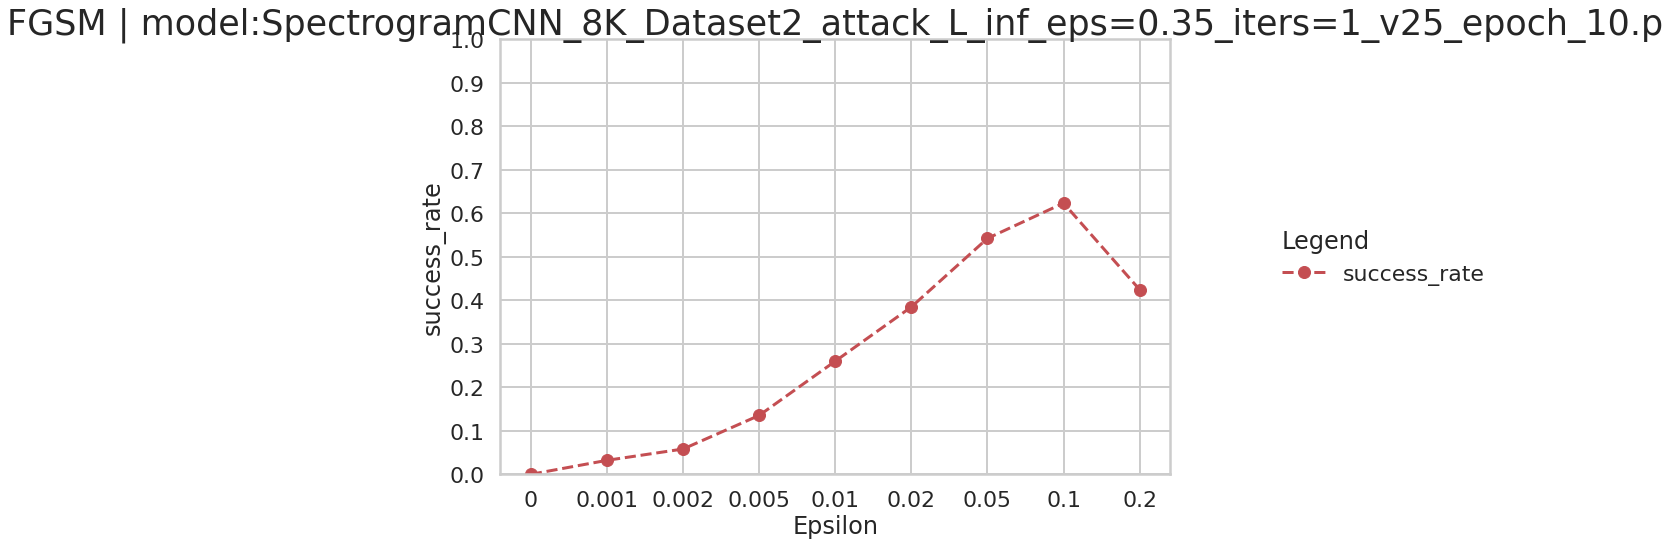

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.50s/it]


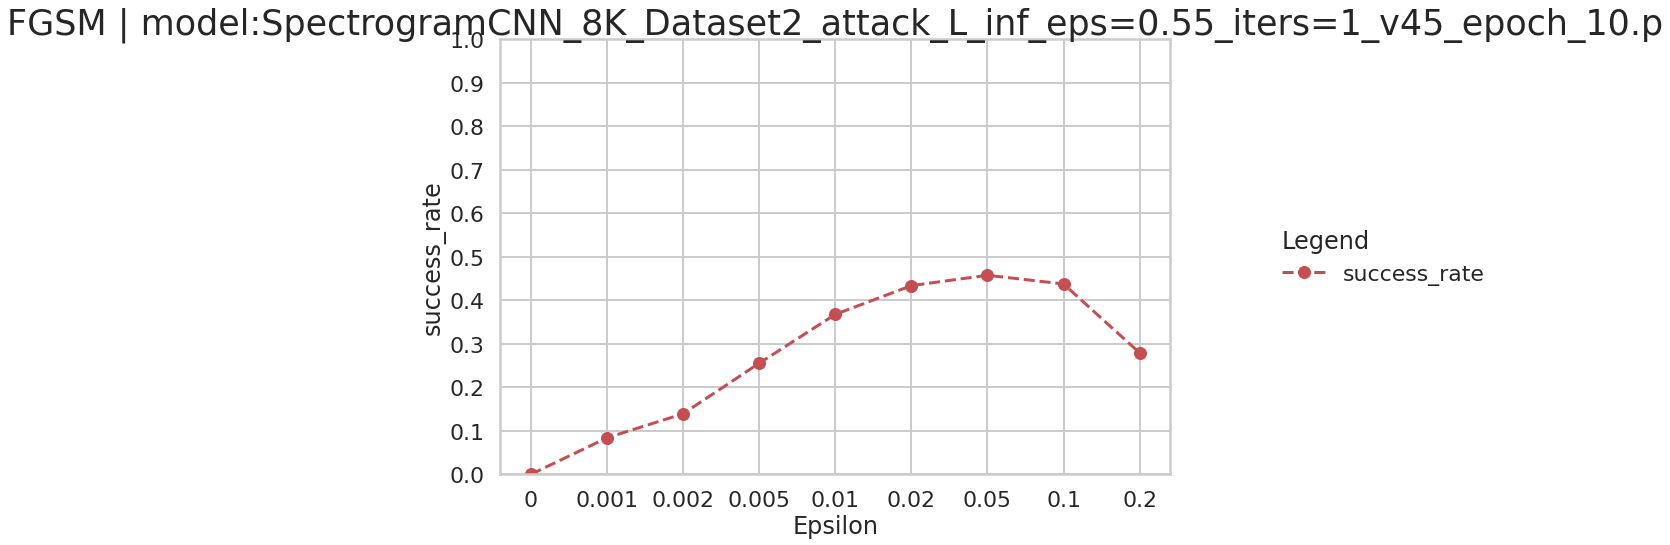

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.44000000000000006_iters=1_v34_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.44000000000000006_iters=1_v34_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:28<00:00,  3.22s/it]


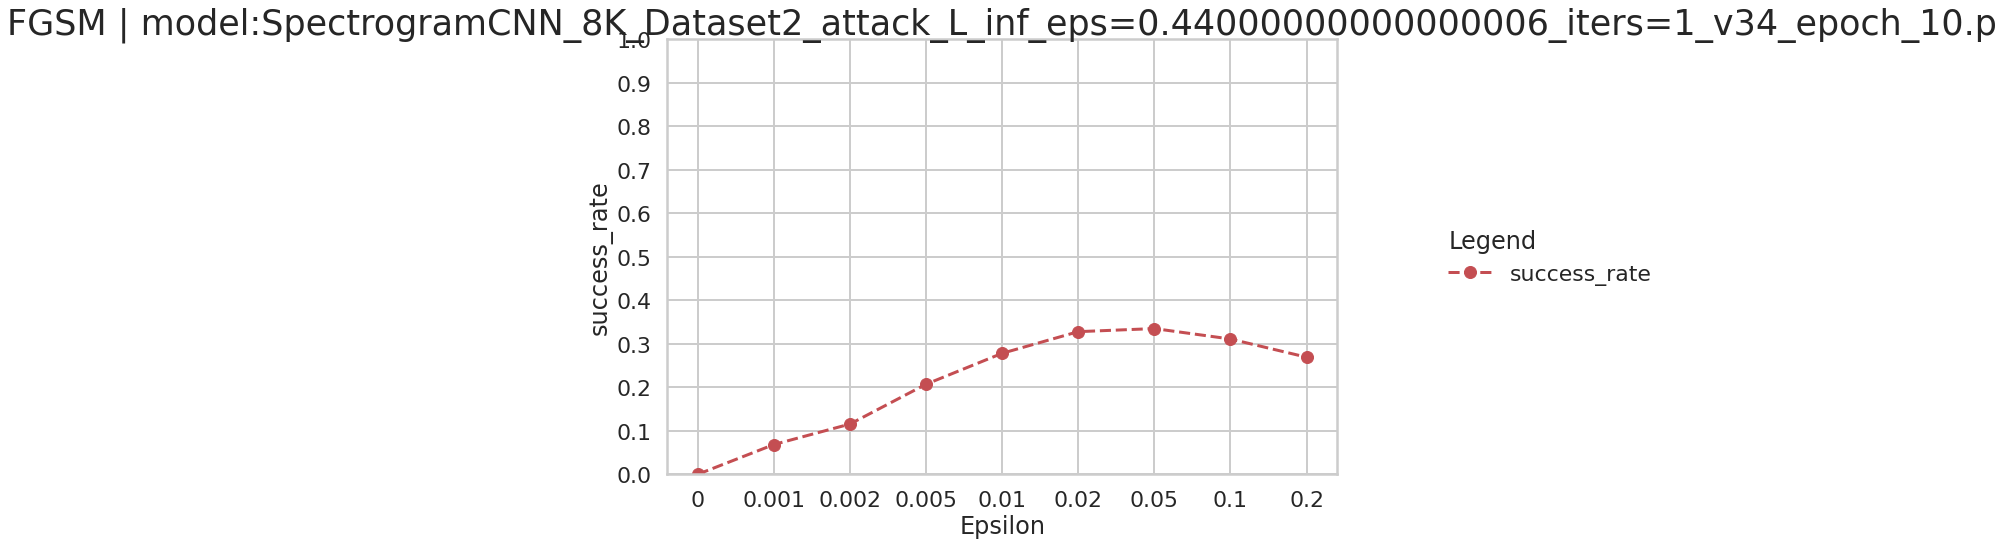

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.37_iters=1_v27.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.37_iters=1_v27.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.32_iters=1_v22_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:34<00:00,  3.79s/it]


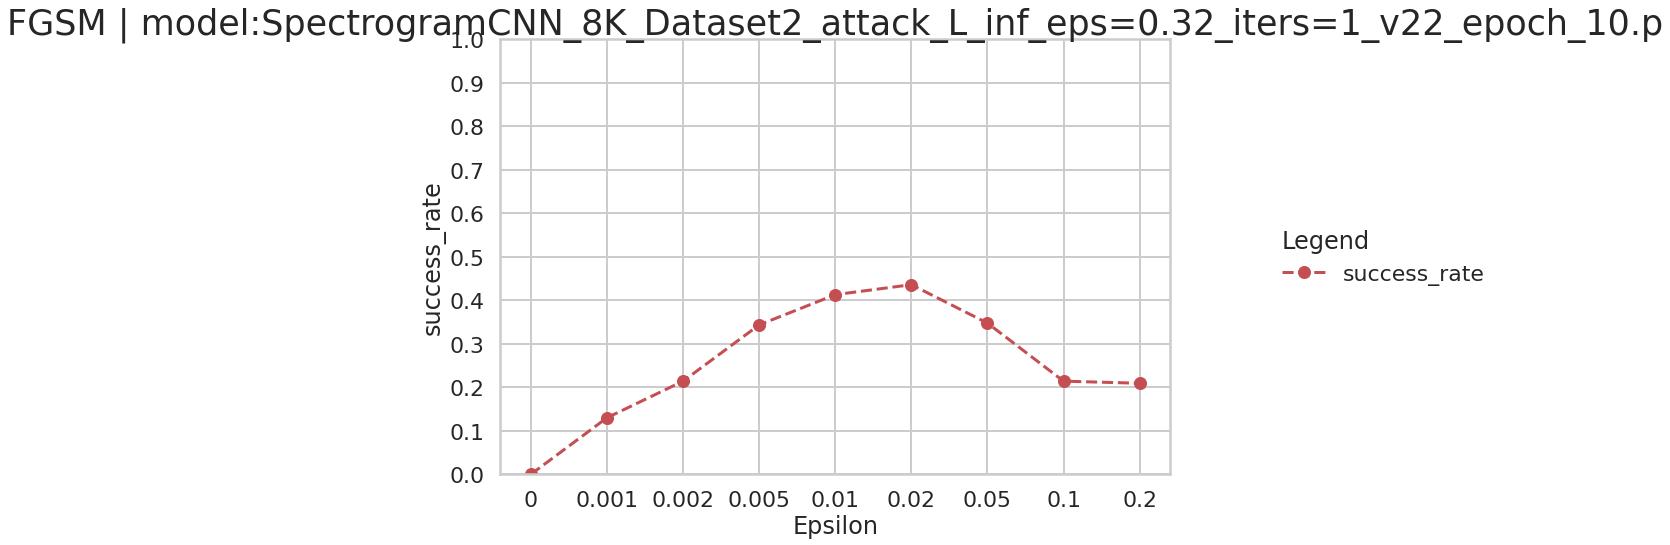

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.77s/it]


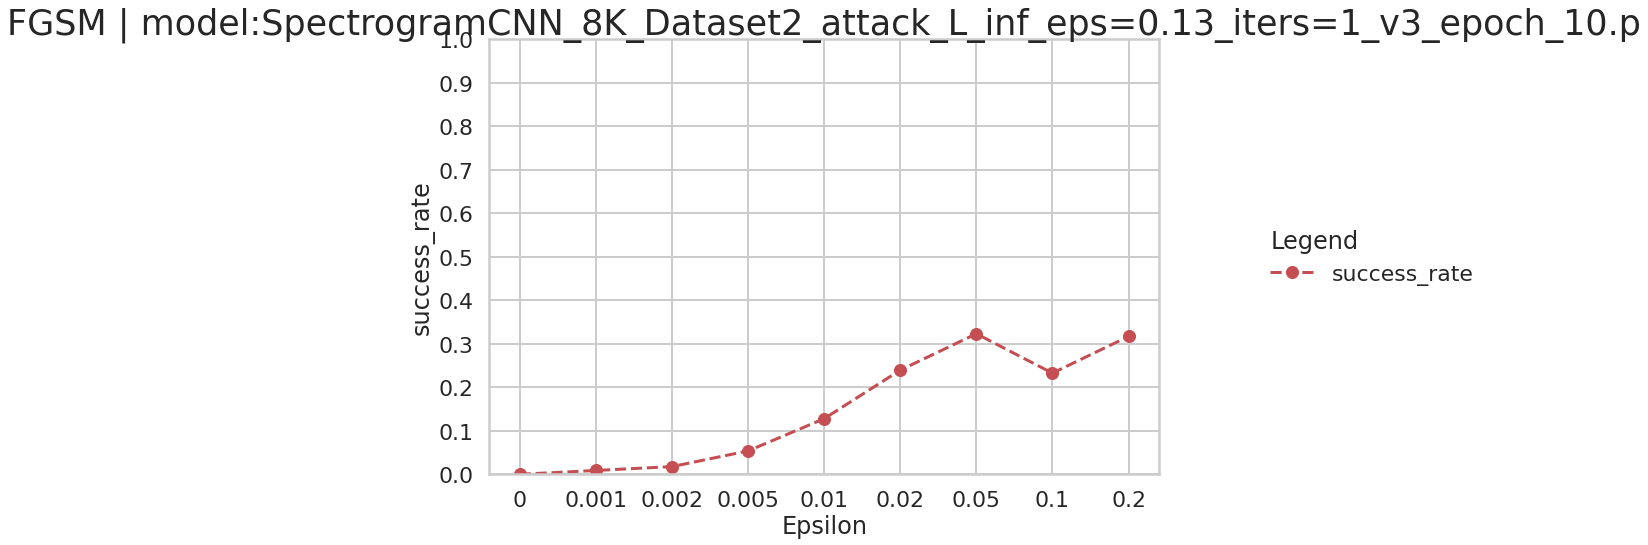

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.27_iters=1_v17.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.31_iters=1_v21.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dat

  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v5_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.15000000000000002_iters=1_v5_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.66s/it]


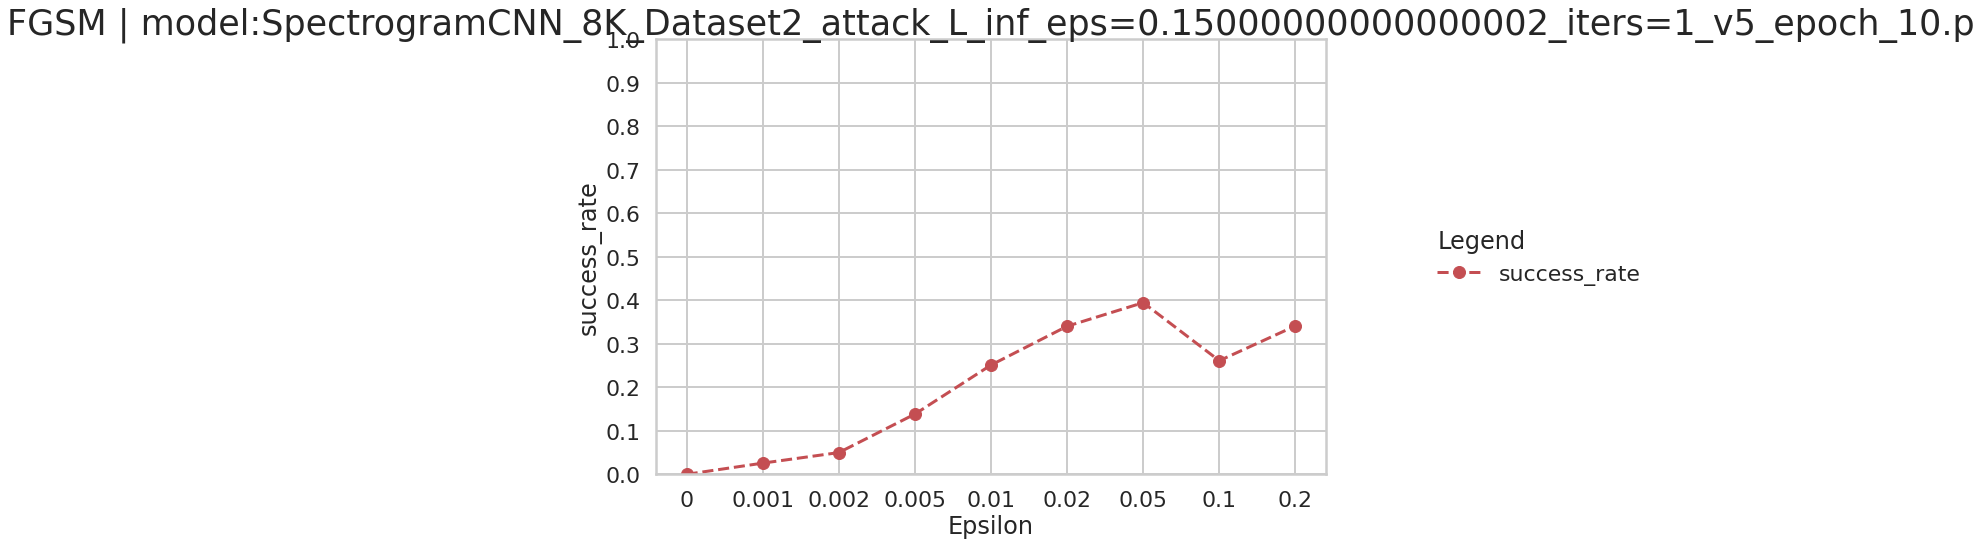

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.2_iters=1_v10.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.48_iters=1_v38_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.48_iters=1_v38_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.69s/it]


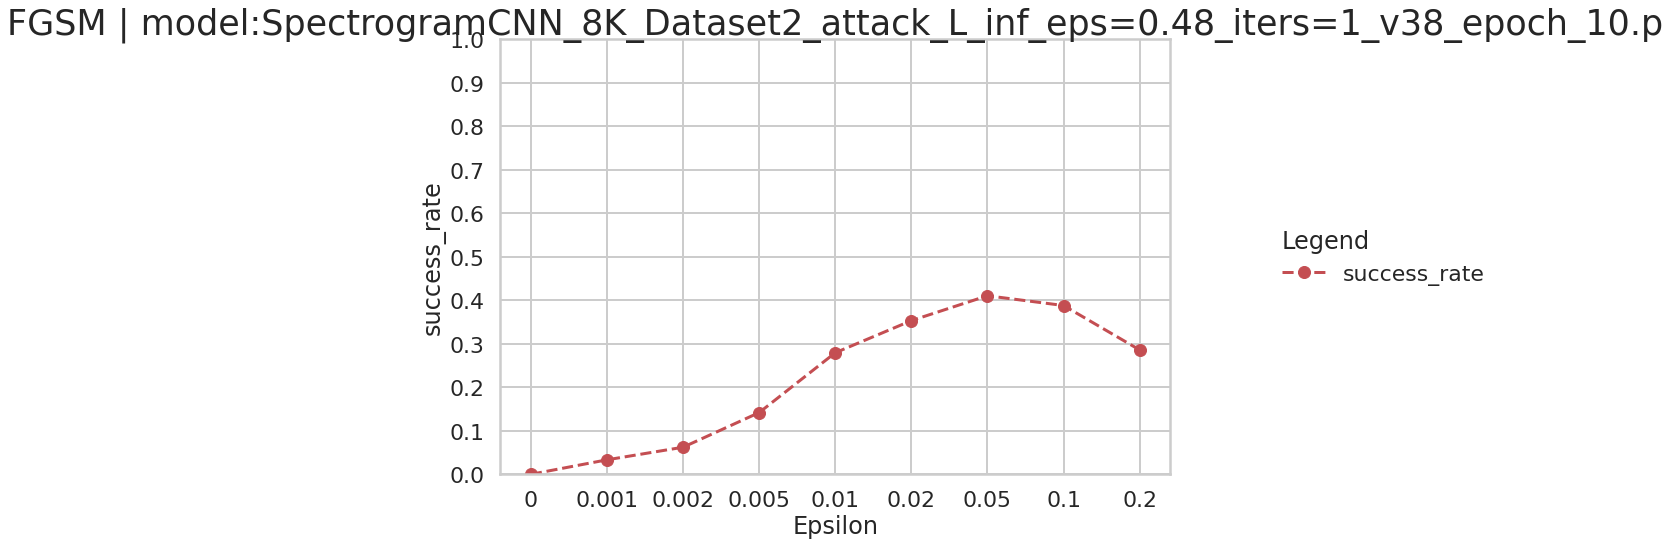

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.58_iters=1_v48.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.57s/it]


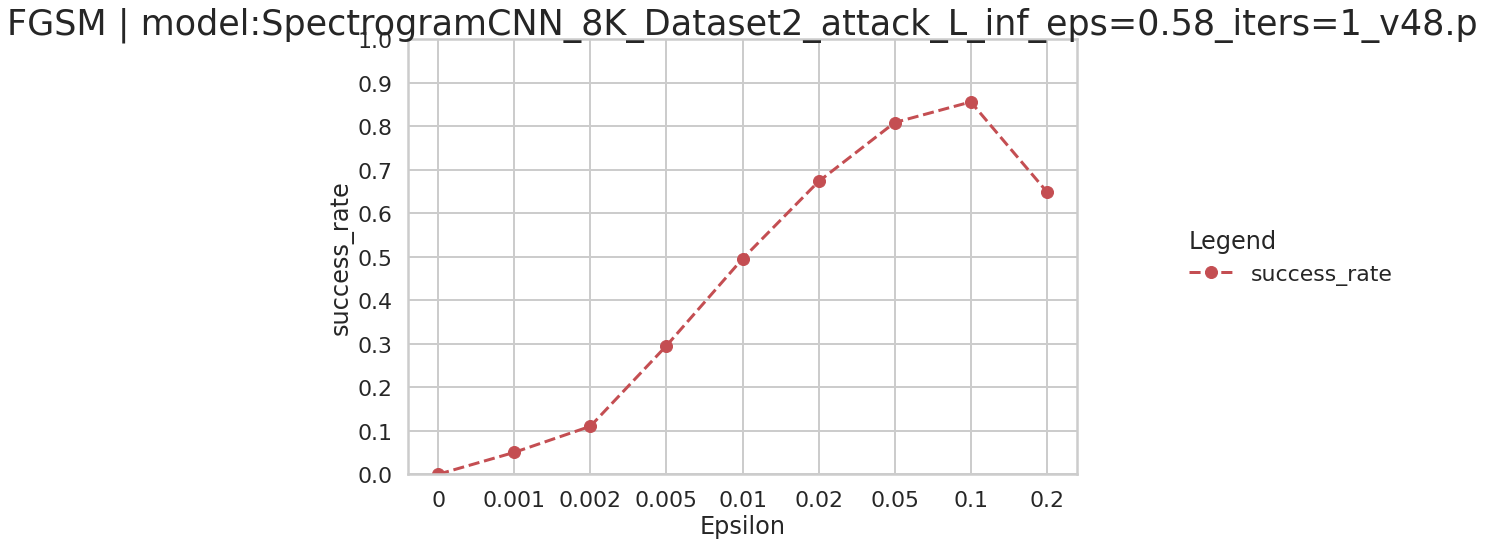

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:30<00:00,  3.39s/it]


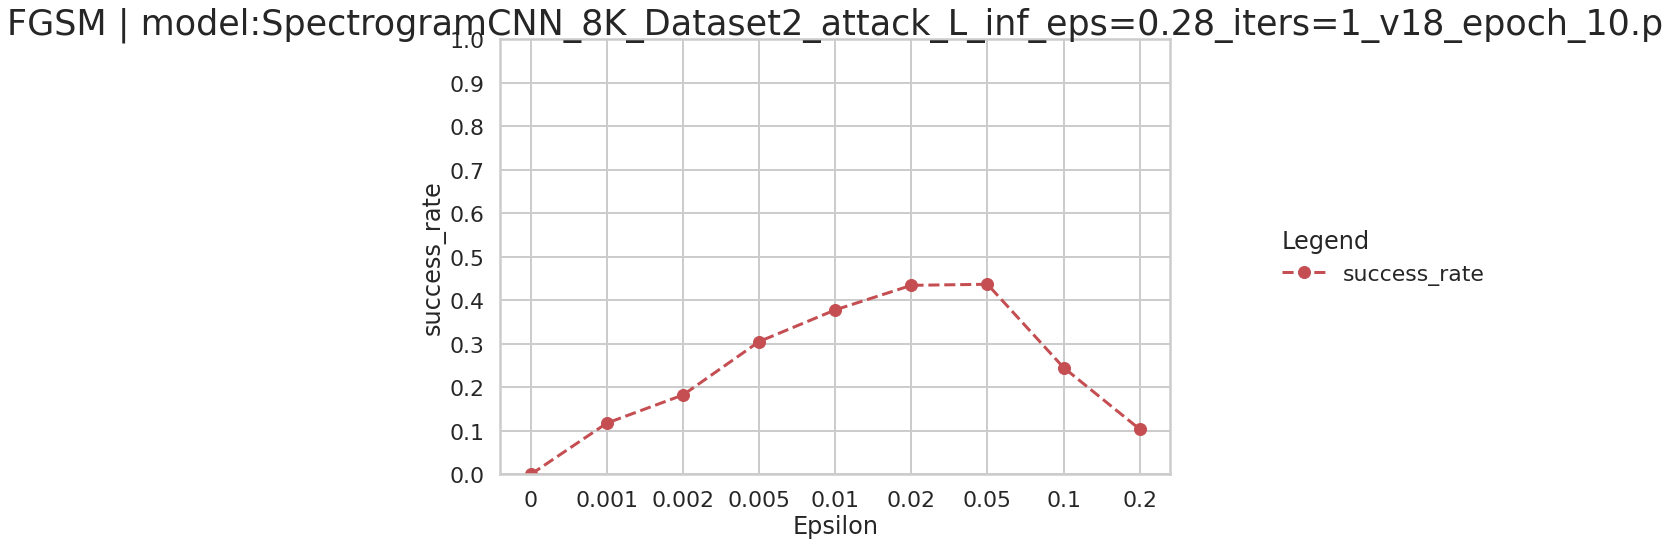

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.52_iters=1_v42_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.72s/it]


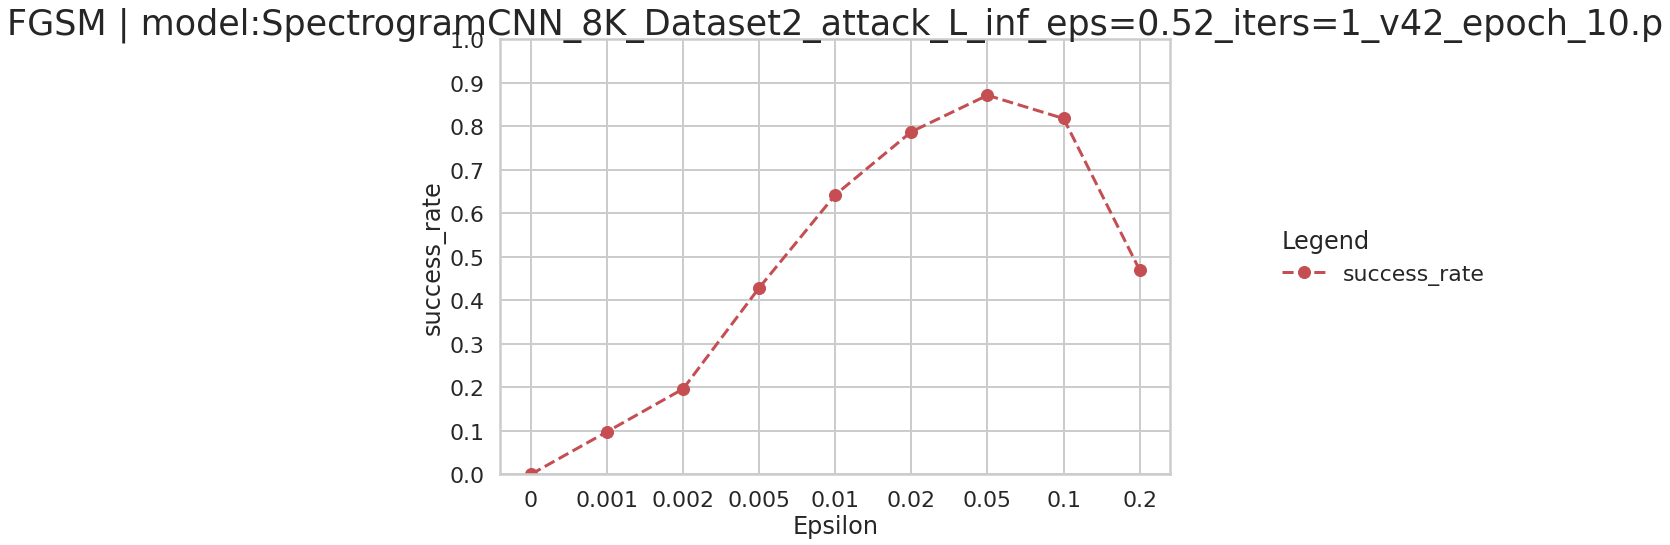

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:34<00:00,  3.80s/it]


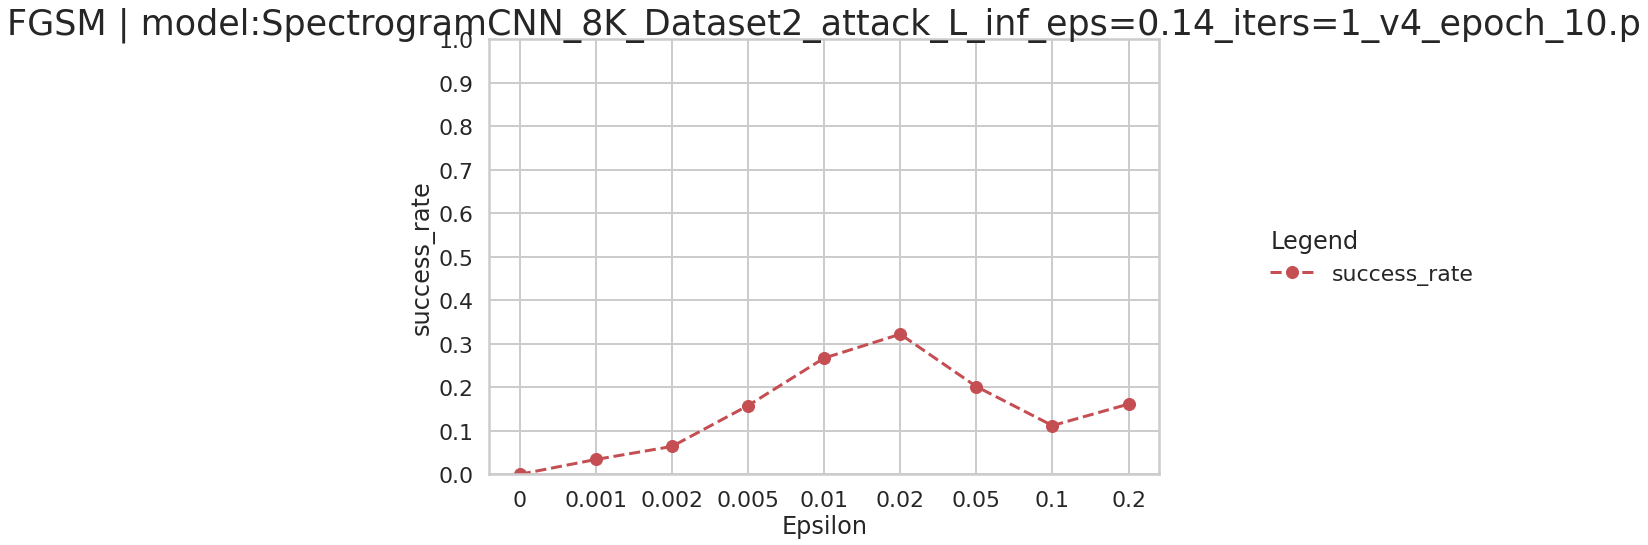

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.39_iters=1_v29.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.39_iters=1_v29.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.55_iters=1_v45.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.63s/it]


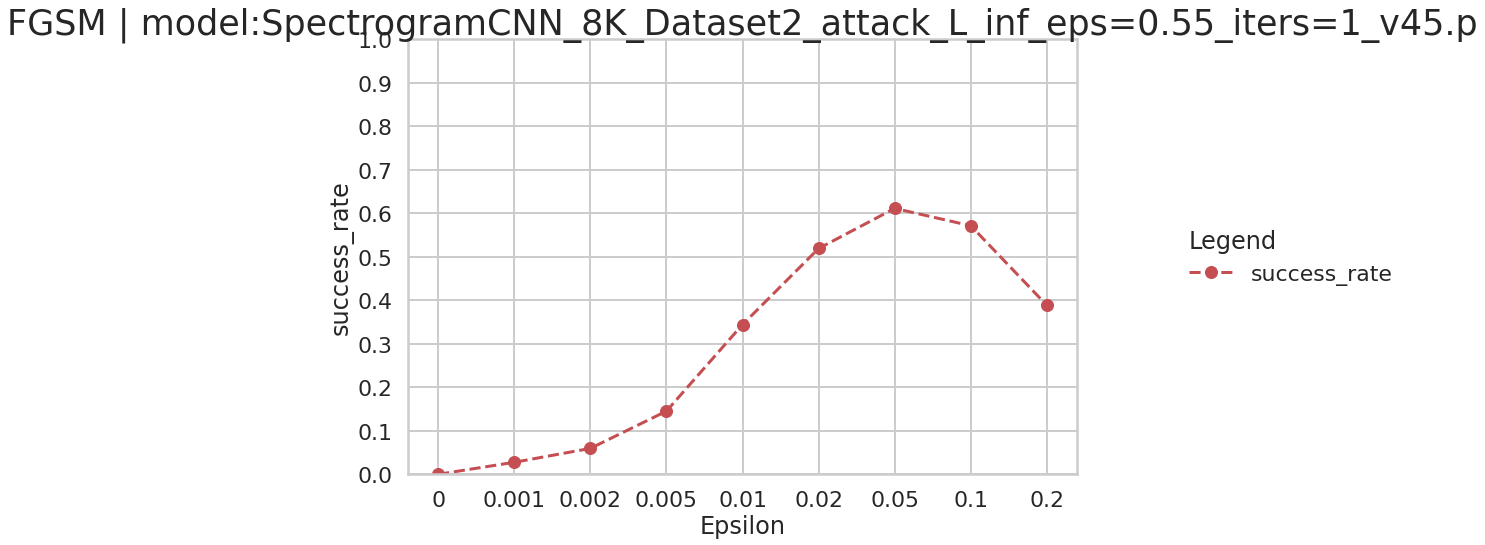

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:25<00:00,  2.87s/it]


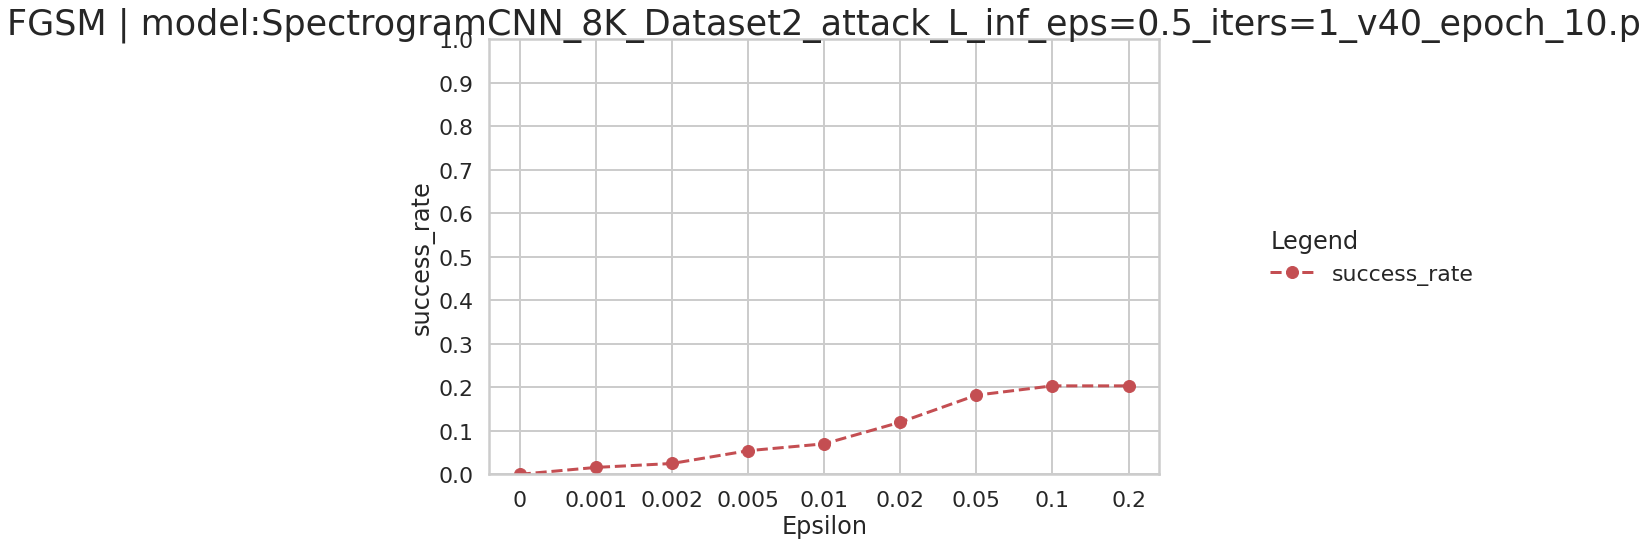

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v15.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v15.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.71s/it]


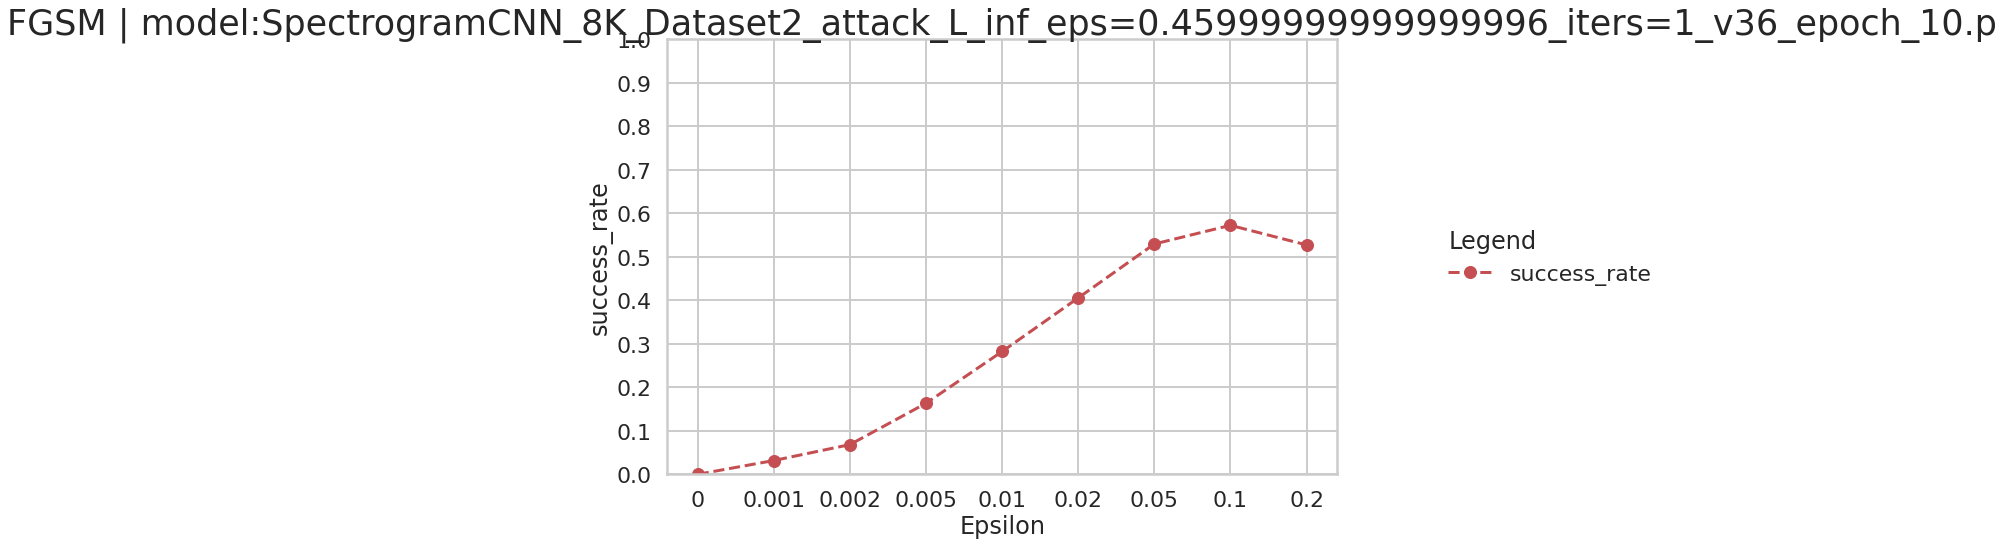

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.53_iters=1_v43_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


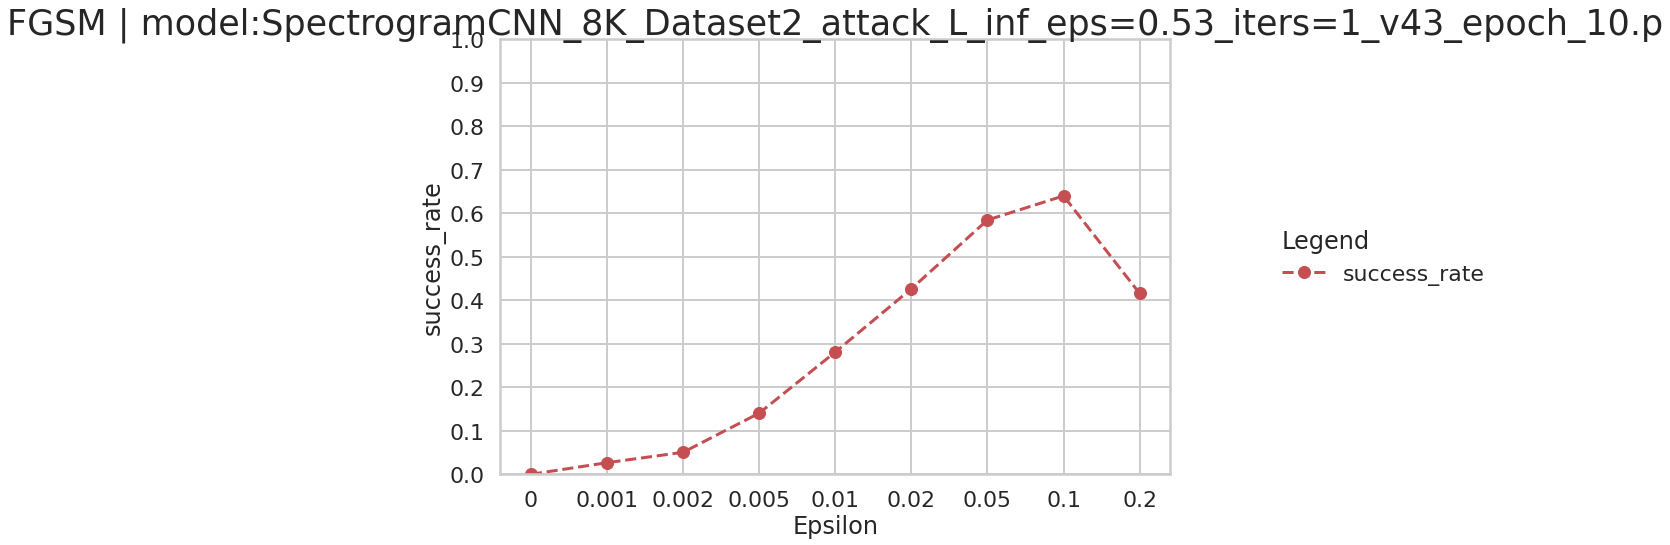

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v19_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.29000000000000004_iters=1_v19_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.71s/it]


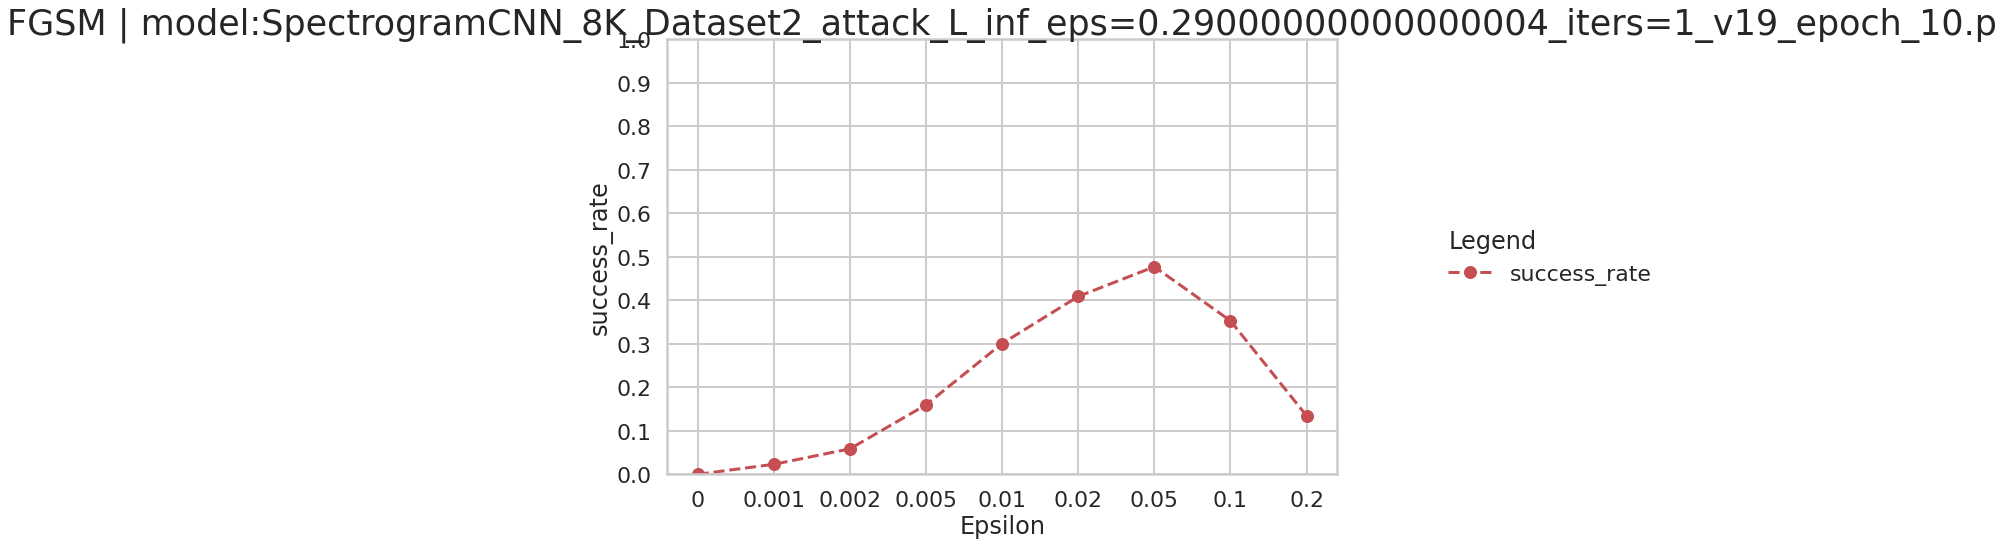

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.45999999999999996_iters=1_v36.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33999999999999997_iters=1_v24_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33999999999999997_iters=1_v24_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.64s/it]


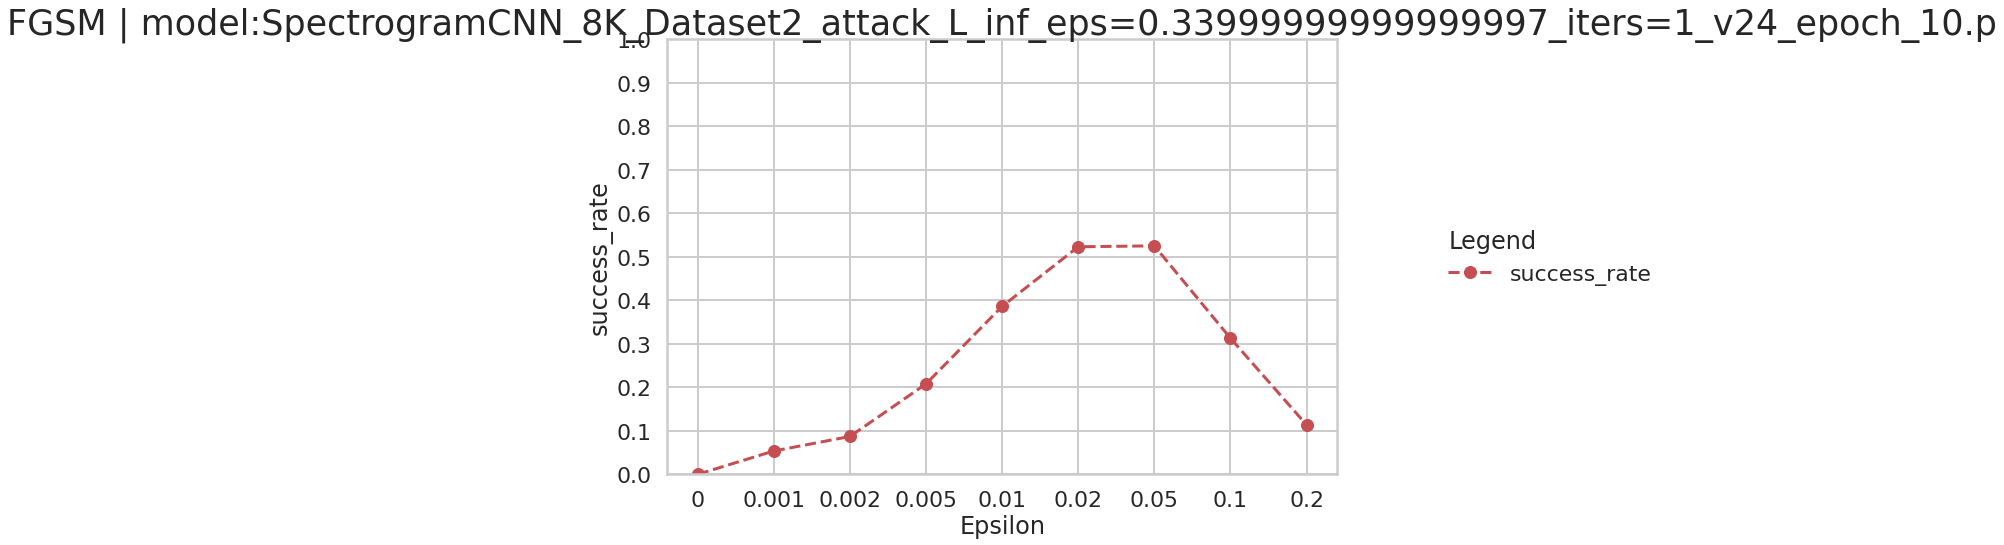

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.16_iters=1_v6_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:31<00:00,  3.47s/it]


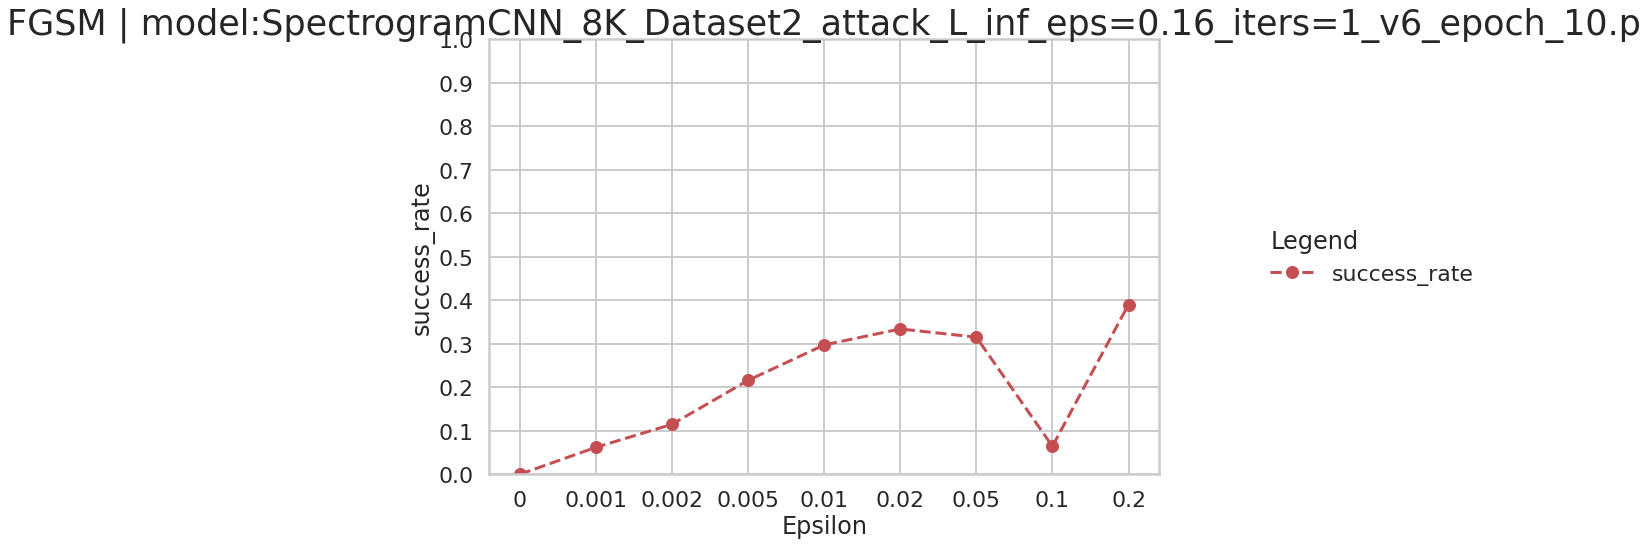

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v15_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.25_iters=1_v15_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.71s/it]


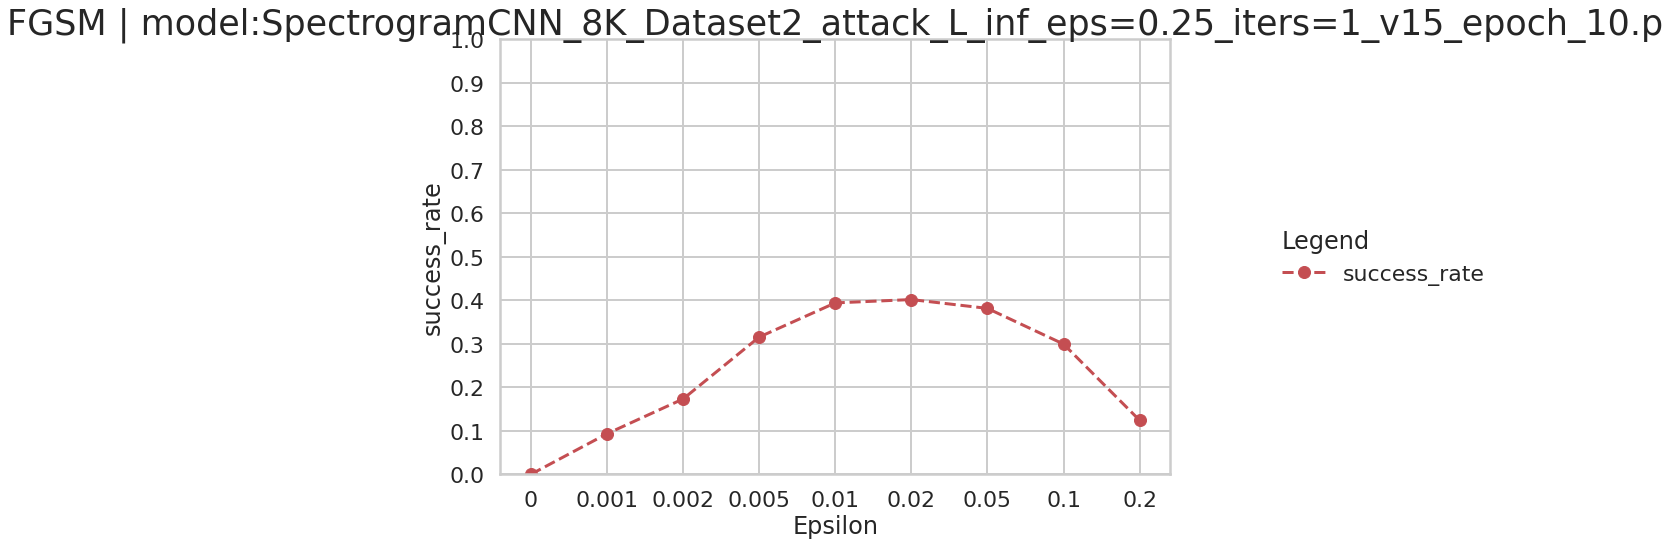

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33_iters=1_v23.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.33999999999999997_iters=1_v24.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model Spectr

  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.56_iters=1_v46.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.66s/it]


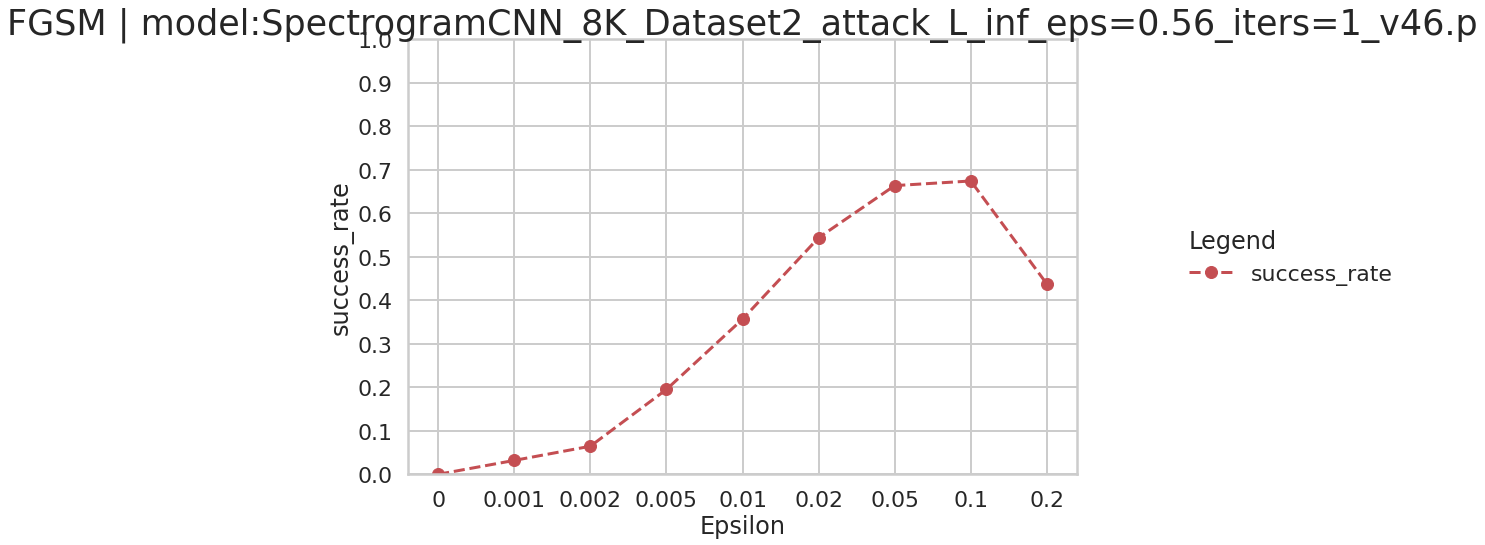

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.43000000000000005_iters=1_v33.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.43000000000000005_iters=1_v33.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]

Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.54_iters=1_v44_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.71s/it]


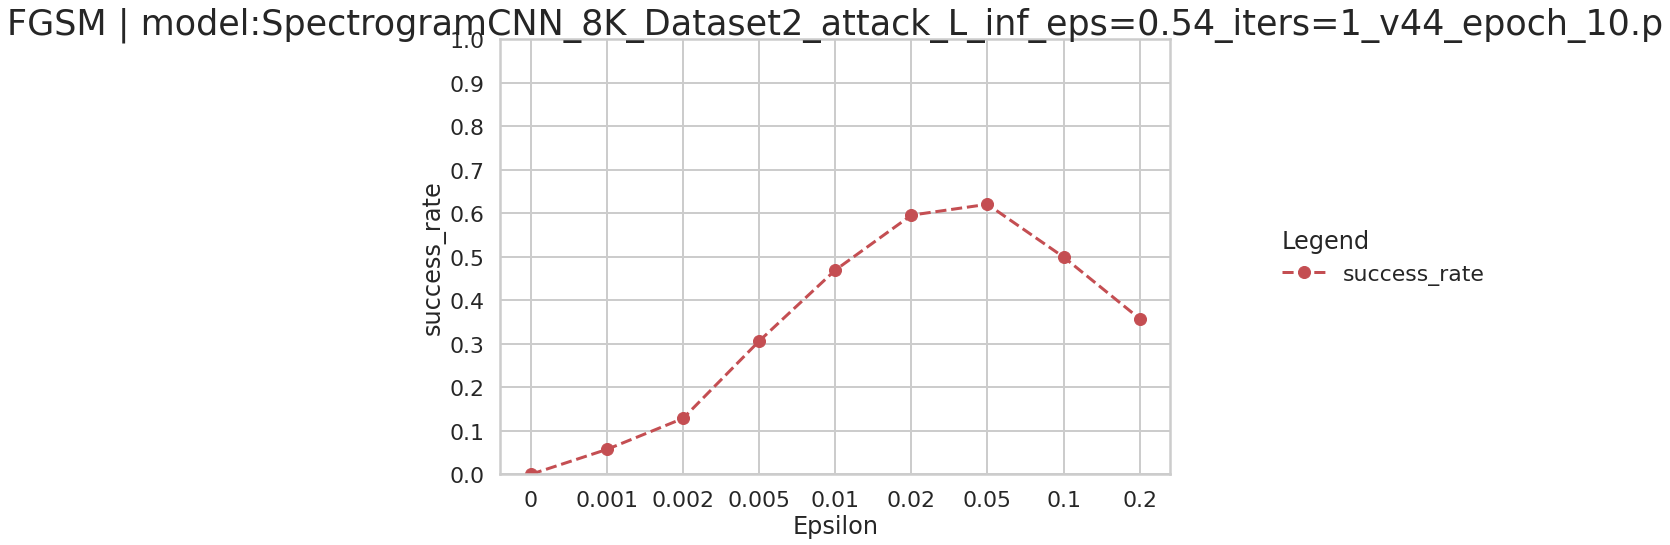

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v16_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.26_iters=1_v16_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.62s/it]


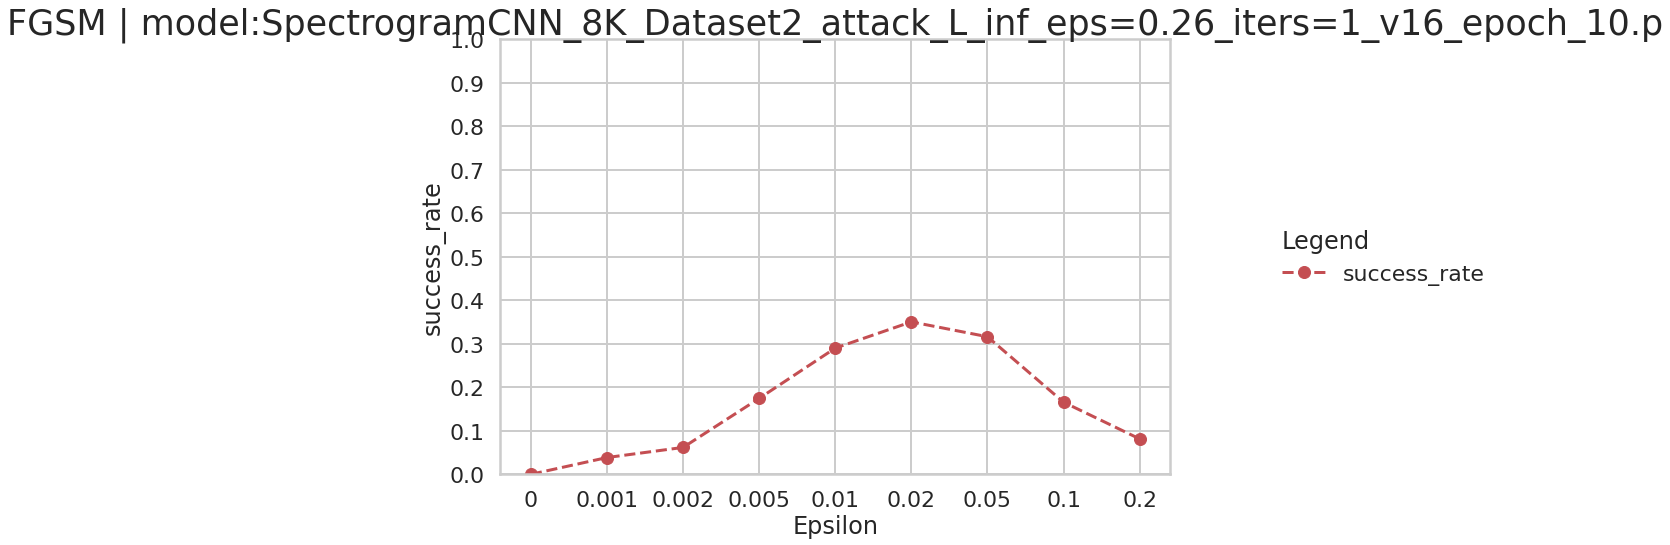

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.23_iters=1_v13_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


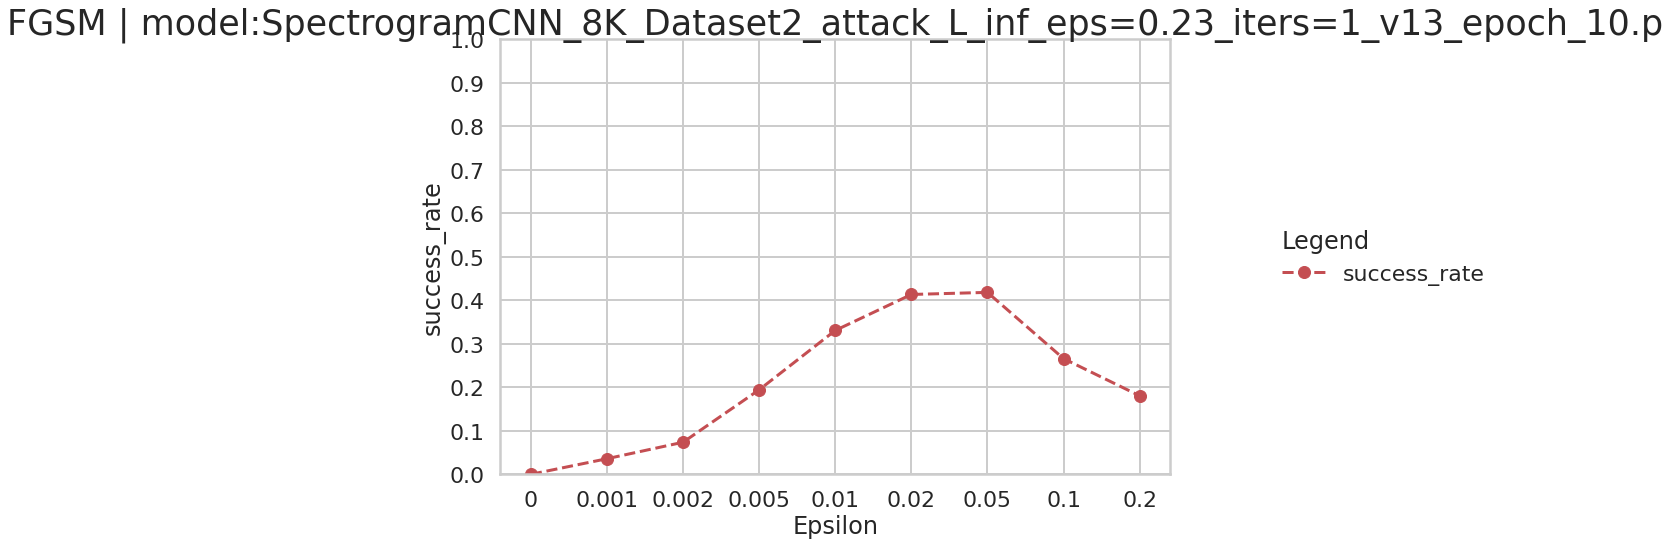

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.36_iters=1_v26_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:32<00:00,  3.66s/it]


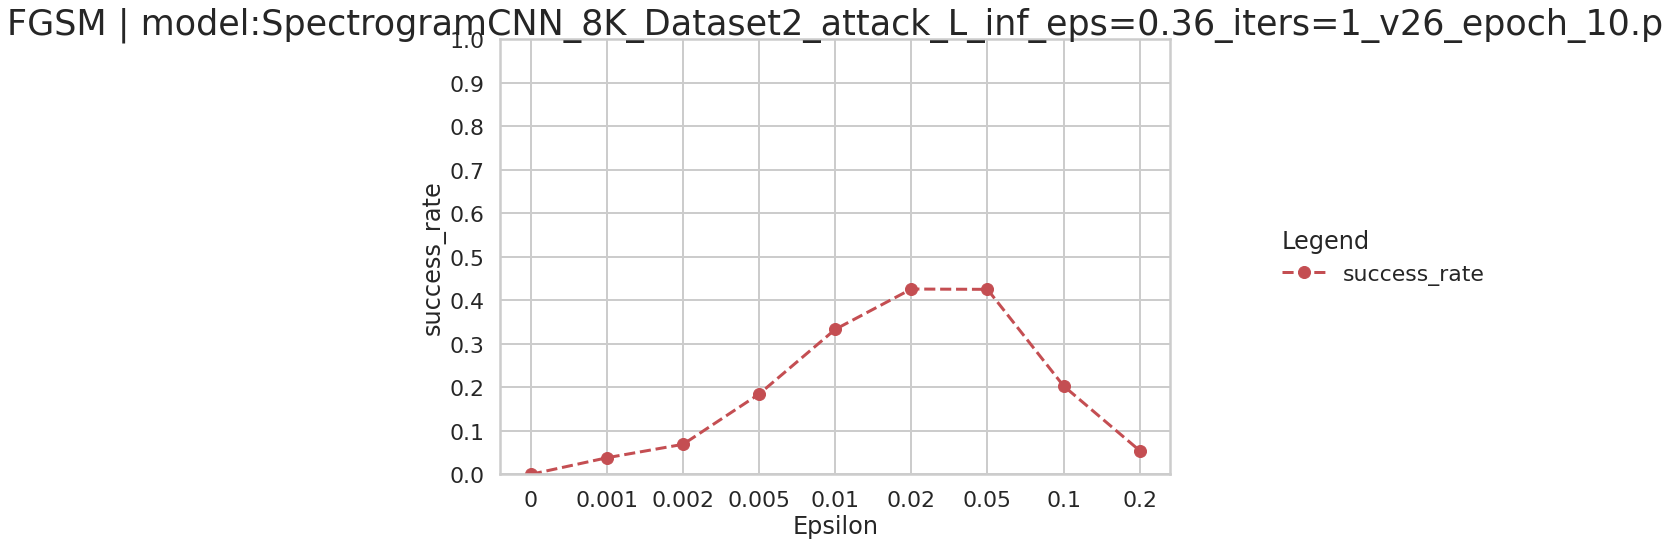

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.5_iters=1_v40.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.77s/it]


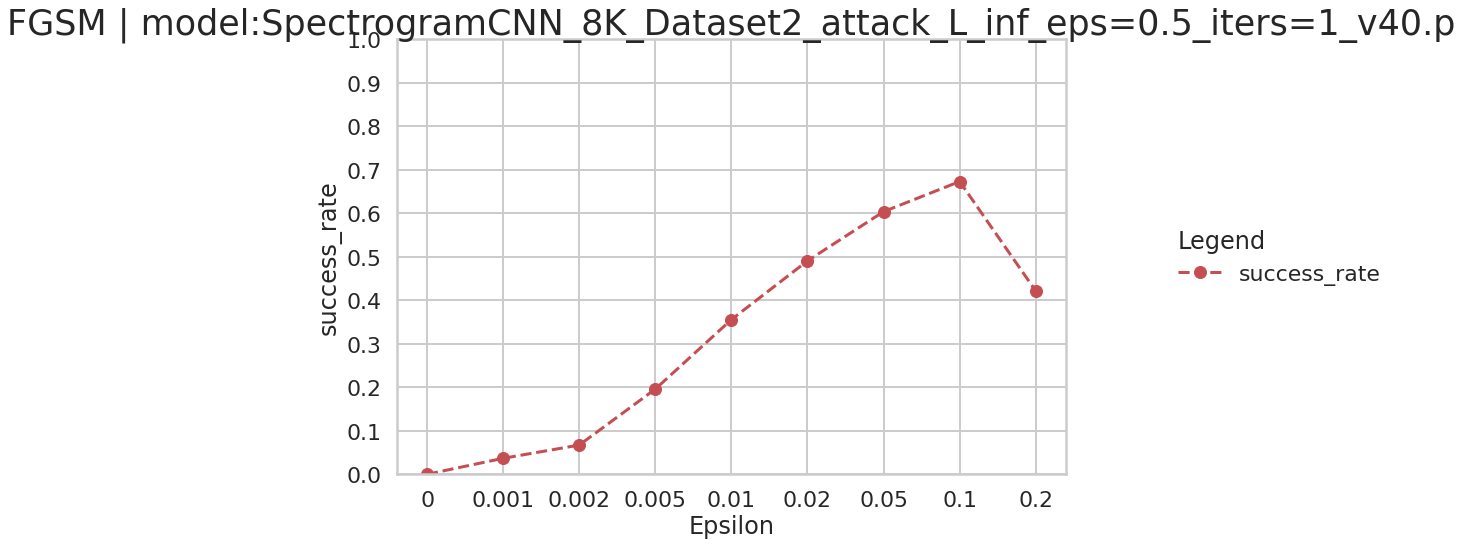

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.42000000000000004_iters=1_v32_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.42000000000000004_iters=1_v32_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


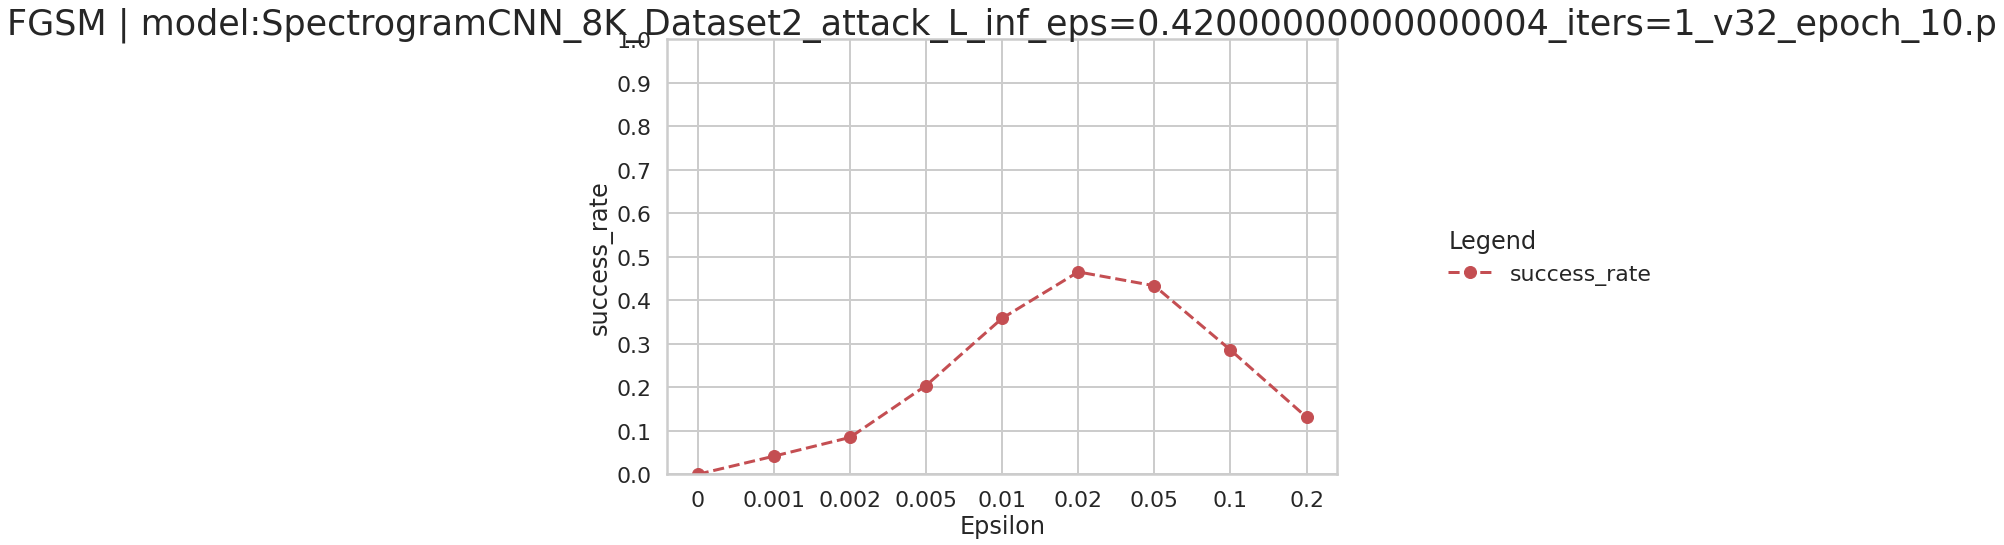

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.28_iters=1_v18.p - skipping.
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11_epoch_10.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11_epoch_10.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:33<00:00,  3.71s/it]


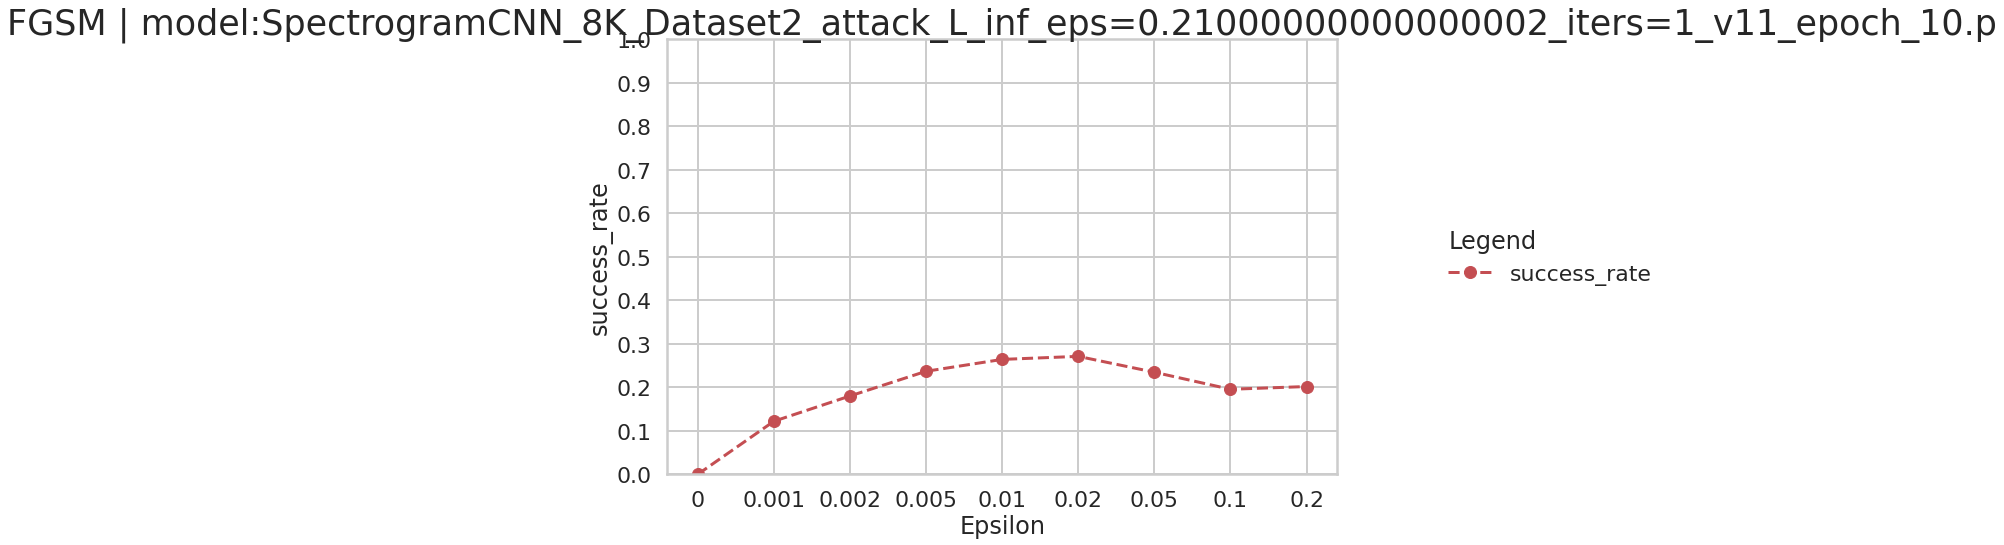

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


Running experiment on model optuna_spec8kd2_0.90.p

Perform Attack #1/1: FGSM
Attack FGSM has already been performed for model optuna_spec8kd2_0.90.p - skipping.


In [17]:
import os
directory = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/"
for filename in os.listdir(directory):
    experiment.run(directory + filename, SpectrogramCNN_8K_Dataset2_PLModule, dataset_id=config.DATASET_CONTROL)

Loaded model 0024_EVAL_DATASET2
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model optuna_spec8kd2_0.90.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/optuna_spec8kd2_0.90.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:35<00:00,  3.99s/it]


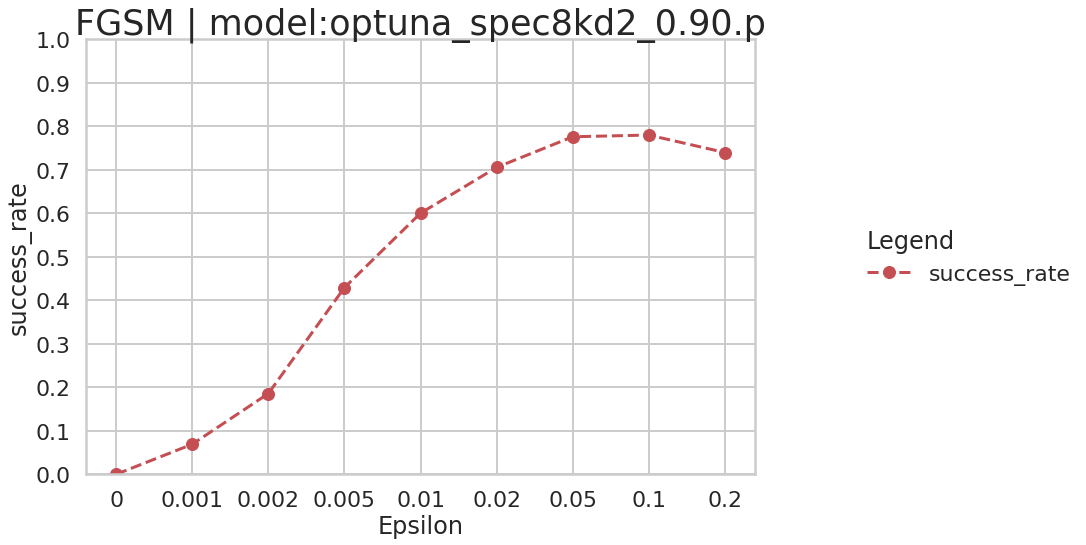

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"


In [10]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from classification.models.SpectrogramCNN_8K_Dataset2 import SpectrogramCNN_8K_Dataset2_PLModule
experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

state_dict_path = '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/optuna_spec8kd2_0.90.p'
experiment.run(state_dict_path, SpectrogramCNN_8K_Dataset2_PLModule, dataset_id=config.DATASET_CONTROL)

In [3]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

for m in models:
    


    experiment.run(m, SpectrogramCNN_8K_Dataset2_PLModule, dataset_id=config.DATASET_CONTROL)

Loaded model 0024_EVAL_DATASET2


NameError: name 'models' is not defined

In [18]:
experiment.show_best_models(best_n=1, metric="acc")


Attack = FGSM:
[(6.7178423236514515, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p')]


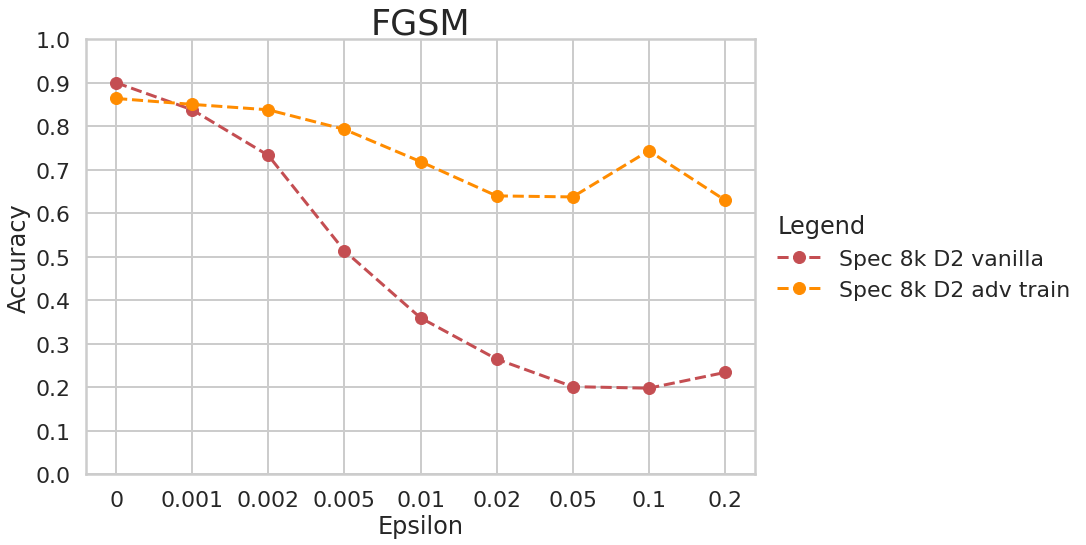

In [19]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                        ("optuna_spec8kd2_0.90.p", "Spec 8k D2 vanilla"),
                        ("SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p", "Spec 8k D2 adv train")
                         ])